In [1]:
# import necessary library
import pandas as pd
import math
import seaborn as sns
from matplotlib import pyplot as plt
import re
import numpy as np
import geopandas as gpd
from shapely.geometry import Point # Point class
from shapely.geometry import shape
import networkx as nx
import osmnx as ox
import os 
from geopandas import GeoDataFrame, read_file
from geopandas.tools import overlay
import shapely.geometry as geom
import shapely.wkt
import shap

C:\Users\Md Mintu Miah\anaconda3\envs\geo_env\lib\site-packages\geopandas\_compat.py:112: UserWarning: The Shapely GEOS version (3.11.0-CAPI-1.17.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
#!pip install shap
#!pip install numpy==1.24.3

In [3]:
import os, time, math
import math
from math import sqrt
import numpy as np
import pandas as pd
import seaborn as sn
#from keras.optimizers import Adam

from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
%matplotlib inline
from matplotlib import pyplot as plt
from pprint import pprint
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingClassifier
from sklearn import linear_model, tree, ensemble
import sklearn.metrics as metrics 
from matplotlib import pyplot
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import statsmodels.api as sm
#from sklearn.metrics import mean_absolute_percentage_error
import xgboost as xgb
from xgboost import XGBRegressor
import math
#from tune_sklearn import TuneGridSearchCV
from sklearn import tree

In [4]:
#!pip install hyperopt

In [5]:
# Helper Function
def rmse(predictions, targets):
    differences = predictions - targets                       #the DIFFERENCEs.
    differences_squared = differences ** 2                    #the SQUAREs of ^
    mean_of_differences_squared = differences_squared.mean()  #the MEAN of ^
    rmse_val = np.sqrt(mean_of_differences_squared)           #ROOT of ^
    return rmse_val

def rmspe(predictions, targets):
    differences = predictions - targets                       #the DIFFERENCEs.
    differences_squared = differences ** 2                    #the SQUAREs of ^
    mean_of_differences_squared = differences_squared.mean()  #the MEAN of ^
    rmse_val = np.sqrt(mean_of_differences_squared)          #ROOT of ^
    targets_aadb_mean=targets.mean()
    rmspe_val=rmse_val/targets_aadb_mean*100
    return rmspe_val

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f}.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    return accuracy

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

In [6]:
# show all file path here
file_path='C:/UC Berkeley Project Backup/Bike_ped Exposure Model Project/Modeling_Sep22,2023'

In [7]:
# read the data
data=pd.read_csv(f'{file_path}/Model_clean_data_july23_AADBT.csv')
data['bike_fac']=data['path']+data['bike_lane']+data['bike_route']+data['cycle_track']+data['trail']
data.head()

C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_16892\1783879904.py:2: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv(f'{file_path}/Model_clean_data_july23_AADBT.csv')


Unnamed: 0   county    X       ID location        Lat       Long  year  \
0           1  Alameda  122   8578.0    urban  37.849934 -122.28885  2018   
1           4  Alameda  128  14389.0    urban  37.533787 -122.07950  2017   
2           5  Alameda  129  14389.0    urban  37.533787 -122.07950  2018   
3           6  Alameda  130  14389.0    urban  37.533787 -122.07950  2019   
4           7  Alameda  127  14389.0    urban  37.533787 -122.07950  2016   

     ATT  no_of_months_data_collected  ... speed_less_than_30  \
0  11376                          1.0  ...                  1   
1  69539                         12.0  ...                  0   
2  77973                         12.0  ...                  0   
3  76522                         12.0  ...                  0   
4  55379                          9.0  ...                  0   

   Speed_30_or_Above  speed_less_than_25  Speed_25_or_Above  \
0                  0                   0                  1   
1                  1                   0                  1   
2                  1                   0                  1   
3                  1                   0                  1   
4                  1                   0                  1   

   speed_less_than_20 Speed_20_or_Above        Mean         std  outlier  \
0                   0                 1  148.898849  158.580163    False   
1                   0                 1  148.898849  158.580163    False   
2                   0                 1  148.898849  158.580163    False   
3                   0                 1  148.898849  158.580163    False   
4                   0                 1  148.898849  158.580163    False   

   bike_fac  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 199 columns]

In [8]:
list(data.columns)

['Unnamed: 0',
 'county',
 'X',
 'ID',
 'location',
 'Lat',
 'Long',
 'year',
 'ATT',
 'no_of_months_data_collected',
 'type',
 'AADB',
 'ATT.in.Million',
 'matched_seg_id',
 'segment_id',
 'street_name',
 'tdg_id',
 'lrs_cal_id',
 'bikes_proh',
 'int_tdg_id',
 'loc_id',
 'seg_counter',
 'fclass',
 'tasas_ids',
 'ataip_ids',
 'fc_draft',
 'speed',
 'slope',
 'empnum_density_t',
 'geom_length',
 'access_code',
 'adt_amt',
 'truck_adt_amt',
 'rt_lanes_amt',
 'lt_lanes_amt',
 'rt_trav_way_width',
 'rt_i_shd_tot_width',
 'rt_o_shd_tot_width',
 'lt_trav_way_width',
 'lt_i_shd_tot_width',
 'lt_o_shd_tot_width',
 'near_strava_id',
 'empnum_density_q',
 'empnum_density_h',
 'near_univ_miles',
 'near_large_univ_miles',
 'eco_type',
 'geometry',
 'forward_trip_count',
 'reverse_trip_count',
 'forward_commute_trip_count',
 'reverse_commute_trip_count',
 'forward_leisure_trip_count',
 'reverse_leisure_trip_count',
 'forward_average_speed',
 'reverse_average_speed',
 'index',
 'Leg',
 'ATT.in.Thous

In [9]:
data['overall_mean']=data['AADB'].mean()
data['overall_std']=data['AADB'].std()
data['outlier_threshold']=5*data['overall_mean']+5*data['overall_std']
#Count > 5 × mean count + 5 × standard deviation


In [10]:
# define function to consolidate bike facilities
def bike_facilities(data):
    if data['path'] == 1:
        return 'Path'
    elif data['bike_lane'] == 1:
        return 'Bike Lane'
    elif data['bike_route'] == 1:
        return 'Bike Route'
    elif data['cycle_track'] == 1:
        return 'Cycle Track'
    elif data['trail'] == 1:
        return 'Trail'
    else:
        return 'Others/Unknown'
data['bike_facility_type'] = data.apply(bike_facilities, axis=1)
data.head()

Unnamed: 0   county    X       ID location        Lat       Long  year  \
0           1  Alameda  122   8578.0    urban  37.849934 -122.28885  2018   
1           4  Alameda  128  14389.0    urban  37.533787 -122.07950  2017   
2           5  Alameda  129  14389.0    urban  37.533787 -122.07950  2018   
3           6  Alameda  130  14389.0    urban  37.533787 -122.07950  2019   
4           7  Alameda  127  14389.0    urban  37.533787 -122.07950  2016   

     ATT  no_of_months_data_collected  ... speed_less_than_20  \
0  11376                          1.0  ...                  0   
1  69539                         12.0  ...                  0   
2  77973                         12.0  ...                  0   
3  76522                         12.0  ...                  0   
4  55379                          9.0  ...                  0   

   Speed_20_or_Above        Mean         std  outlier bike_fac  overall_mean  \
0                  1  148.898849  158.580163    False        0    168.383345   
1                  1  148.898849  158.580163    False        0    168.383345   
2                  1  148.898849  158.580163    False        0    168.383345   
3                  1  148.898849  158.580163    False        0    168.383345   
4                  1  148.898849  158.580163    False        0    168.383345   

   overall_std  outlier_threshold  bike_facility_type  
0   277.273115        2228.282299      Others/Unknown  
1   277.273115        2228.282299      Others/Unknown  
2   277.273115        2228.282299      Others/Unknown  
3   277.273115        2228.282299      Others/Unknown  
4   277.273115        2228.282299      Others/Unknown  

[5 rows x 203 columns]

In [11]:
data.shape

(4179, 203)

In [12]:
data.bike_fac.unique()

array([0, 1], dtype=int64)

In [13]:
# drop the extreme high volume sites based on above criteria
data=data.loc[data['AADB']<=data['outlier_threshold']]
data.shape

(4167, 203)

In [14]:
data.groupby(['bike_facility_type'])['tdg_id'].count()

bike_facility_type
Bike Lane          740
Bike Route         477
Cycle Track          5
Others/Unknown    2716
Path               225
Trail                4
Name: tdg_id, dtype: int64

In [15]:
data['county'].unique()

array(['Alameda', 'Butte', 'Contra Costa', 'Del Norte', 'Douglas',
       'El Dorado', 'Fresno', 'Humboldt', 'Inyo', 'Kern', 'Lassen',
       'Los Angeles', 'Madera', 'Marin', 'Mendocino', 'Nevada', 'Orange',
       'Placer', 'Sacramento', 'San Diego', 'San Francisco',
       'San Luis Obispo', 'San Mateo', 'Santa Clara', 'Santa Cruz',
       'Sutter', 'Washoe', 'Yolo', 'Yuba'], dtype=object)

# Run the Descriptive Stat

In [16]:
data['AADB'].describe()

count    4167.000000
mean      160.095032
std       229.497809
min         1.000000
25%        38.000000
50%        81.000000
75%       180.000000
max      2220.000000
Name: AADB, dtype: float64

In [17]:
per=data.loc[data['type']=='eco_permanent']
per_uni=per.drop_duplicates(subset=['ID'], keep='first')
short=data.loc[data['type']=='short_term']
short_uni=short.drop_duplicates(subset=['tdg_id'], keep='first')

In [18]:
per.shape, short.shape,short_uni.shape,per_uni.shape

((608, 203), (3559, 203), (2589, 203), (187, 203))

In [19]:
per['AADB'].describe()

count     608.000000
mean      312.356908
std       405.919997
min         1.000000
25%        54.000000
50%       140.500000
75%       397.500000
max      2220.000000
Name: AADB, dtype: float64

In [20]:
per['year'].unique()

array([2018, 2017, 2019, 2016], dtype=int64)

<Figure size 3600x3600 with 0 Axes>

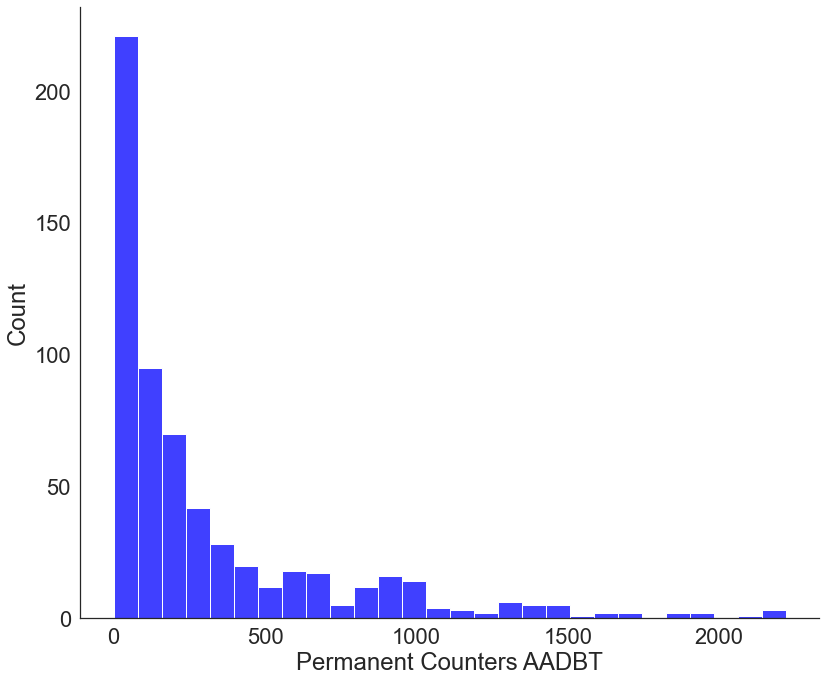

In [21]:
# Bar density plot for permanent counters AADBT
#import seaborn as sns
plt.figure(figsize=(50,50))
sns.set_theme(style='white',font_scale=2, palette='deep')
#sns.set(font_scale=3) 
#sns.set(rc={'figure.figsize':(40,40)})
g=sns.displot(per, x="AADB", color='blue',height=10, aspect=1.2,)
#g=sns.scatterplot(data=data, x="Stv_adb", y="AADB", hue="county", palette="bright",s=80)
g.set(xlabel='Permanent Counters AADBT')
#g.legend(fontsize=20)
#abline(1, (0,0))
# plt.xlim(0,3300)
# plt.ylim(0,3300)
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)
plt.show()

In [22]:
short['AADB'].describe()

count    3559.000000
mean      134.083450
std       170.061279
min         3.000000
25%        37.000000
50%        75.000000
75%       160.000000
max      1967.000000
Name: AADB, dtype: float64

In [23]:
# sns.set_theme(style='white',font_scale=2, palette='deep')
# g=sns.displot(short, x="AADB", color='blue',height=8, aspect=1.2)
# g.set(xlabel='Short-term Counters AADBT')
# plt.show()

C:\Users\Md Mintu Miah\anaconda3\envs\geo_env\lib\site-packages\seaborn\distributions.py:495: RuntimeWarning: invalid value encountered in multiply
  edges = edges[:-1] + (1 - shrink) / 2 * orig_widths


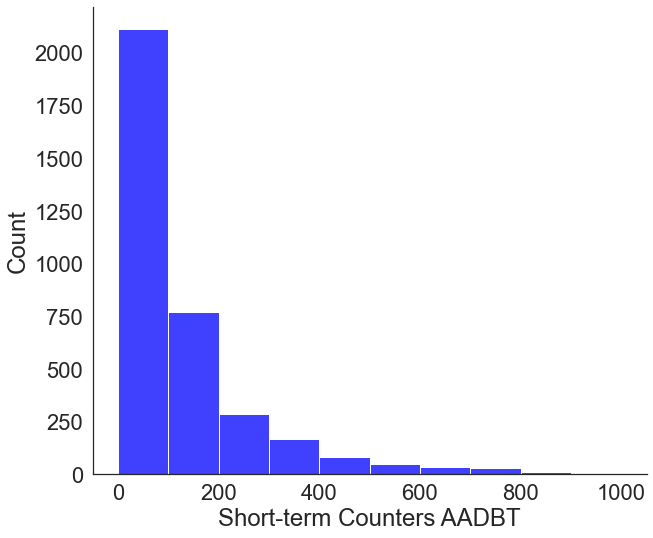

In [24]:
# Set the theme and font size for the plot
sns.set_theme(style='white', font_scale=2, palette='deep')
# Define the bin edges manually
bin_edges = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, float('inf')]
# Create the plot with custom bins
g = sns.displot(short, x="AADB", color='blue', height=8, aspect=1.2, bins=bin_edges)
# Set labels and title
g.set(xlabel='Short-term Counters AADBT', ylabel='Count')
# Show the plot
plt.show()

In [25]:
# Descriptive statistics by facilities
print('unique_permanent counter:',per_uni.groupby(['path'])['AADB'].count())
print('unique_permanent counter:',per_uni.groupby(['bike_lane'])['AADB'].count())
print('unique_permanent counter:',per_uni.groupby(['bike_route'])['AADB'].count())
print('unique_permanent counter:',per_uni.groupby(['cycle_track'])['AADB'].count())
print('unique_permanent counter:',per_uni.groupby(['trail'])['AADB'].count())
both=per_uni.loc[per_uni['bike_fac']==0]
print('unique_permanent counter on other facilitie:',both.shape)

# total gross counter
print('total_permanent counter:',per.groupby(['path'])['AADB'].count())
print('total_permanent counter:',per.groupby(['bike_lane'])['AADB'].count())
print('total_permanent counter:',per.groupby(['bike_route'])['AADB'].count())
print('total_permanent counter:',per.groupby(['cycle_track'])['AADB'].count())
print('total_permanent counter:',per.groupby(['trail'])['AADB'].count())
tboth=per.loc[per['bike_fac']==0]
print('total_permanent counter on other facilities:',tboth.shape)


# total gross counter
print('total_permanent counter:',per.groupby(['path'])['AADB'].describe())
print('total_permanent counter:',per.groupby(['bike_lane'])['AADB'].describe())
print('total_permanent counter:',per.groupby(['bike_route'])['AADB'].describe())
print('total_permanent counter:',per.groupby(['cycle_track'])['AADB'].describe())
print('total_permanent counter:',per.groupby(['trail'])['AADB'].describe())
#print('total_permanent counter:',per.groupby(['trail'])['AADB'].describe())
print('total_permanent counter:',tboth['AADB'].describe())

unique_permanent counter: path
0    135
1     52
Name: AADB, dtype: int64
unique_permanent counter: bike_lane
0    125
1     62
Name: AADB, dtype: int64
unique_permanent counter: bike_route
0    150
1     37
Name: AADB, dtype: int64
unique_permanent counter: cycle_track
0    187
Name: AADB, dtype: int64
unique_permanent counter: trail
0    186
1      1
Name: AADB, dtype: int64
unique_permanent counter on other facilitie: (35, 203)
total_permanent counter: path
0    447
1    161
Name: AADB, dtype: int64
total_permanent counter: bike_lane
0    402
1    206
Name: AADB, dtype: int64
total_permanent counter: bike_route
0    476
1    132
Name: AADB, dtype: int64
total_permanent counter: cycle_track
0    608
Name: AADB, dtype: int64
total_permanent counter: trail
0    606
1      2
Name: AADB, dtype: int64
total_permanent counter on other facilities: (107, 203)
total_permanent counter:       count        mean         std  min   25%    50%    75%     max
path                                    

In [26]:
# Descriptive statistics by facilities
print('unique_short counter:',short_uni.groupby(['path'])['AADB'].count())
print('unique_short counter:',short_uni.groupby(['bike_lane'])['AADB'].count())
print('unique_short counter:',short_uni.groupby(['bike_route'])['AADB'].count())
print('unique_short counter:',short_uni.groupby(['cycle_track'])['AADB'].count())
print('unique_short counter:',short_uni.groupby(['trail'])['AADB'].count())
both=short_uni.loc[short_uni['bike_fac']==0]
print('unique_pshort counter on other facilitie:',both.shape)

# total gross counter
print('total_short counter:',short.groupby(['path'])['AADB'].count())
print('total_short counter:',short.groupby(['bike_lane'])['AADB'].count())
print('total_short counter:',short.groupby(['bike_route'])['AADB'].count())
print('total_short counter:',short.groupby(['cycle_track'])['AADB'].count())
print('total_short counter:',short.groupby(['trail'])['AADB'].count())
tboth=short.loc[short['bike_fac']==0]
print('total_short counter on other facilities:',tboth.shape)


# total gross counter
print('total_short counter:',short.groupby(['path'])['AADB'].describe())
print('total_short counter:',short.groupby(['bike_lane'])['AADB'].describe())
print('total_short counter:',short.groupby(['bike_route'])['AADB'].describe())
print('total_short counter:',short.groupby(['cycle_track'])['AADB'].describe())
print('total_short counter:',short.groupby(['trail'])['AADB'].describe())
print('total_short counter:',tboth['AADB'].describe())

unique_short counter: path
0    2545
1      44
Name: AADB, dtype: int64
unique_short counter: bike_lane
0    2226
1     363
Name: AADB, dtype: int64
unique_short counter: bike_route
0    2395
1     194
Name: AADB, dtype: int64
unique_short counter: cycle_track
0    2584
1       5
Name: AADB, dtype: int64
unique_short counter: trail
0    2587
1       2
Name: AADB, dtype: int64
unique_pshort counter on other facilitie: (1981, 203)
total_short counter: path
0    3495
1      64
Name: AADB, dtype: int64
total_short counter: bike_lane
0    3025
1     534
Name: AADB, dtype: int64
total_short counter: bike_route
0    3214
1     345
Name: AADB, dtype: int64
total_short counter: cycle_track
0    3554
1       5
Name: AADB, dtype: int64
total_short counter: trail
0    3557
1       2
Name: AADB, dtype: int64
total_short counter on other facilities: (2609, 203)
total_short counter:        count        mean         std   min   25%   50%    75%     max
path                                             

In [27]:
# Creat some urban Vs rural and Geolocation Binary variable
# urban
data['urban']=np.where(data['location']=='urban',1,0)
data['rural']=np.where(data['location']=='rural',1,0)
data['Alameda']=np.where(data['county']=='Alameda',1,0)
data['San_Francisco']=np.where(data['county']=='San Francisco',1,0)
data['Los_Angeles']=np.where(data['county']=='Los Angeles',1,0)
data['San_Diego']=np.where(data['county']=='San Diego',1,0)
data['Yolo']=np.where(data['county']=='Yolo',1,0)
data['Orange']=np.where(data['county']=='Orange',1,0)

In [28]:
data.head()

Unnamed: 0   county    X       ID location        Lat       Long  year  \
0           1  Alameda  122   8578.0    urban  37.849934 -122.28885  2018   
1           4  Alameda  128  14389.0    urban  37.533787 -122.07950  2017   
2           5  Alameda  129  14389.0    urban  37.533787 -122.07950  2018   
3           6  Alameda  130  14389.0    urban  37.533787 -122.07950  2019   
4           7  Alameda  127  14389.0    urban  37.533787 -122.07950  2016   

     ATT  no_of_months_data_collected  ... outlier_threshold  \
0  11376                          1.0  ...       2228.282299   
1  69539                         12.0  ...       2228.282299   
2  77973                         12.0  ...       2228.282299   
3  76522                         12.0  ...       2228.282299   
4  55379                          9.0  ...       2228.282299   

   bike_facility_type  urban  rural  Alameda San_Francisco  Los_Angeles  \
0      Others/Unknown      1      0        1             0            0   
1      Others/Unknown      1      0        1             0            0   
2      Others/Unknown      1      0        1             0            0   
3      Others/Unknown      1      0        1             0            0   
4      Others/Unknown      1      0        1             0            0   

   San_Diego  Yolo  Orange  
0          0     0       0  
1          0     0       0  
2          0     0       0  
3          0     0       0  
4          0     0       0  

[5 rows x 211 columns]

In [29]:
data.groupby(['location'])['ID'].count()

location
rural     27
urban    581
Name: ID, dtype: int64

In [30]:
data['county'].unique()

array(['Alameda', 'Butte', 'Contra Costa', 'Del Norte', 'Douglas',
       'El Dorado', 'Fresno', 'Humboldt', 'Inyo', 'Kern', 'Lassen',
       'Los Angeles', 'Madera', 'Marin', 'Mendocino', 'Nevada', 'Orange',
       'Placer', 'Sacramento', 'San Diego', 'San Francisco',
       'San Luis Obispo', 'San Mateo', 'Santa Clara', 'Santa Cruz',
       'Sutter', 'Washoe', 'Yolo', 'Yuba'], dtype=object)

In [31]:
data['AADB'].describe()

count    4167.000000
mean      160.095032
std       229.497809
min         1.000000
25%        38.000000
50%        81.000000
75%       180.000000
max      2220.000000
Name: AADB, dtype: float64

In [32]:
data['slope'].describe()

count    4167.000000
mean        0.012872
std         0.018814
min         0.000000
25%         0.002773
50%         0.006509
75%         0.015003
max         0.261190
Name: slope, dtype: float64

In [33]:
data['log_Stv_commute_adb']=np.log(data['Stv_commute_adb']+0.01)
data['log_Stv_leisure_adb']=np.log(data['Stv_leisure_adb']+0.01)
data['Stv_adb']=data['Stv_leisure_adb']+data['Stv_commute_adb']
data['log_Stv_adb']=np.log(data['Stv_adb']+0.01)
data['log_slope']=np.log(data['slope']+0.01)
data1=data.fillna(0)
data1=data1.drop(['geometry'],axis=1)
data1.head()

Unnamed: 0   county    X       ID location        Lat       Long  year  \
0           1  Alameda  122   8578.0    urban  37.849934 -122.28885  2018   
1           4  Alameda  128  14389.0    urban  37.533787 -122.07950  2017   
2           5  Alameda  129  14389.0    urban  37.533787 -122.07950  2018   
3           6  Alameda  130  14389.0    urban  37.533787 -122.07950  2019   
4           7  Alameda  127  14389.0    urban  37.533787 -122.07950  2016   

     ATT  no_of_months_data_collected  ... San_Francisco  Los_Angeles  \
0  11376                          1.0  ...             0            0   
1  69539                         12.0  ...             0            0   
2  77973                         12.0  ...             0            0   
3  76522                         12.0  ...             0            0   
4  55379                          9.0  ...             0            0   

   San_Diego  Yolo  Orange log_Stv_commute_adb  log_Stv_leisure_adb  \
0          0     0       0            2.268773             1.820409   
1          0     0       0           -2.974051            -2.848257   
2          0     0       0           -3.286158            -2.736534   
3          0     0       0           -2.736534            -2.974051   
4          0     0       0           -2.974051            -2.848257   

     Stv_adb  log_Stv_adb  log_slope  
0  15.821918     2.762028  -3.822693  
1   0.089041    -2.312220  -4.588440  
2   0.082192    -2.383884  -4.588440  
3   0.095890    -2.245351  -4.588440  
4   0.089041    -2.312220  -4.588440  

[5 rows x 215 columns]

In [34]:
data1['Stv_adb'].describe()

count    4167.000000
mean       10.342398
std        29.664794
min         0.000000
25%         0.400685
50%         2.273973
75%         8.027397
max       408.027397
Name: Stv_adb, dtype: float64

In [35]:
data['Strava_pentration']=data['Stv_adb']/data['AADB']
data['Strava_rec_pentration']=data['Stv_leisure_adb']/data['AADB']
data['Strava_com_pentration']=data['Stv_commute_adb']/data['AADB']
data['Strava_pentration'].describe()

count    4167.000000
mean        0.109921
std         0.540478
min         0.000000
25%         0.005907
50%         0.026438
75%         0.077320
max        24.403583
Name: Strava_pentration, dtype: float64

In [36]:
strav=data.loc[data['Stv_adb']<data['AADB']]
strav['Strava_pentration'].describe()

count    4107.000000
mean        0.074684
std         0.130762
min         0.000000
25%         0.005665
50%         0.025673
75%         0.072802
max         0.984932
Name: Strava_pentration, dtype: float64

In [37]:
strav.groupby(['bike_facility_type'])['Strava_pentration'].describe()

count      mean       std       min       25%       50%  \
bike_facility_type                                                             
Bike Lane            714.0  0.138200  0.177299  0.000000  0.029894  0.067772   
Bike Route           464.0  0.111794  0.152004  0.000000  0.020219  0.048137   
Cycle Track            5.0  0.030752  0.027752  0.008219  0.009548  0.026528   
Others/Unknown      2708.0  0.044427  0.093368  0.000000  0.002533  0.014999   
Path                 212.0  0.166616  0.164144  0.000358  0.025424  0.117444   
Trail                  4.0  0.098819  0.051037  0.061870  0.073171  0.079565   

                         75%       max  
bike_facility_type                      
Bike Lane           0.176122  0.958904  
Bike Route          0.144078  0.905355  
Cycle Track         0.032877  0.076588  
Others/Unknown      0.042107  0.984932  
Path                0.273283  0.780822  
Trail               0.105213  0.174277

In [38]:
strav.groupby(['location'])['Strava_pentration'].describe()

count      mean       std  min       25%       50%       75%  \
location                                                                 
rural      23.0  0.218328  0.264739  0.0  0.021160  0.058208  0.387189   
urban     540.0  0.201710  0.201571  0.0  0.051333  0.127465  0.284890   

               max  
location            
rural     0.780822  
urban     0.984932

In [39]:
strav.groupby(['location'])['Strava_rec_pentration'].describe()

count      mean       std  min       25%       50%       75%  \
location                                                                 
rural      23.0  0.200465  0.241917  0.0  0.019111  0.051558  0.381558   
urban     540.0  0.159055  0.176031  0.0  0.026209  0.093840  0.246575   

               max  
location            
rural     0.702055  
urban     0.888356

In [40]:
strav.groupby(['location'])['Strava_com_pentration'].describe()

count      mean       std  min       25%       50%       75%  \
location                                                                 
rural      23.0  0.017863  0.029245  0.0  0.001747  0.005432  0.022679   
urban     540.0  0.042656  0.049068  0.0  0.010473  0.029003  0.059827   

               max  
location            
rural     0.092466  
urban     0.551370

In [41]:
strav.groupby(['location'])['Stv_commute_adb'].describe()

count       mean        std  min       25%       50%        75%  \
location                                                                    
rural      23.0   0.623883   0.643902  0.0  0.126712  0.315068   1.109589   
urban     540.0  10.010388  15.490669  0.0  0.907534  4.239726  10.534247   

                 max  
location              
rural       2.054795  
urban     126.719178

In [42]:
data1['tdg_id']

0       208578
1       214389
2       214389
3       214389
4       214389
         ...  
4174    136444
4175    136269
4176    135992
4177    136408
4178    136500
Name: tdg_id, Length: 4167, dtype: int64

In [43]:
check=data.loc[data['tdg_id']==208578]
check

Unnamed: 0   county    X      ID location        Lat       Long  year  \
0           1  Alameda  122  8578.0    urban  37.849934 -122.28885  2018   
6           9  Alameda  120  8578.0    urban  37.849934 -122.28885  2016   
7          10  Alameda  121  8578.0    urban  37.849934 -122.28885  2017   

      ATT  no_of_months_data_collected  ... Yolo  Orange  log_Stv_commute_adb  \
0   11376                          1.0  ...    0       0             2.268773   
6  132990                         12.0  ...    0       0             2.371689   
7  117569                         10.0  ...    0       0             2.371689   

   log_Stv_leisure_adb    Stv_adb log_Stv_adb  log_slope  Strava_pentration  \
0             1.820409  15.821918    2.762028  -3.822693           0.510384   
6             1.886924  17.294521    2.850968  -3.822693           0.047512   
7             1.886924  17.294521    2.850968  -3.822693           0.053710   

   Strava_rec_pentration  Strava_com_pentration  
0               0.198851               0.311533  
6               0.018102               0.029411  
7               0.020463               0.033247  

[3 rows x 219 columns]

In [44]:
# # Plot AADBT Vs Strava AADBT
# sns.set(font_scale=2.0) 
# plt.figure(figsize=(20,20))
# g=sns.regplot(x="Stv_adb", y="AADB", data=data,scatter_kws={"s": 80},color='purple') #
# #g=sns.scatterplot(data=data, x="Stv_adb", y="AADB", hue="county", palette="bright",s=80)
# g.set(xlabel='Strava AADBT', ylabel='Observed AADBT')
# #g.legend(fontsize=20)
# #abline(1, (0,0))
# # plt.xlim(0,3300)
# # plt.ylim(0,3300)
# plt.xticks(fontsize=30)
# plt.yticks(fontsize=30)
# plt.show()

In [45]:
# # Plot AADBT Vs Strava AADBT
# sns.set(font_scale=2) 
# plt.figure(figsize=(20,20))
# g=sns.regplot(x="Stv_commute_adb", y="AADB", data=data,scatter_kws={"s": 80},color='purple') #
# #g=sns.scatterplot(data=data, x="Stv_commute_adb", y="AADB", hue="county", palette="bright",s=80)
# g.set(xlabel='Strava Commute AADBT', ylabel='Observed AADBT')
# #g.legend(fontsize=20)
# #abline(1, (0,0))
# # plt.xlim(0,3300)
# # plt.ylim(0,3300)
# plt.xticks(fontsize=30)
# plt.yticks(fontsize=30)
# plt.show()

In [46]:
# # Plot AADBT Vs Strava AADBT
# sns.set(font_scale=2) 
# plt.figure(figsize=(20,20))
# g=sns.regplot(x="Stv_leisure_adb", y="AADB", data=data,scatter_kws={"s": 80},color='purple', order=1) #
# #g=sns.scatterplot(data=data, x="Stv_leisure_adb", y="AADB", hue="county", palette="bright",s=80)
# g.set(xlabel='Strava Leisure AADBT', ylabel='Observed AADBT')
# #g.legend(fontsize=20)
# #abline(1, (0,0))
# # plt.xlim(0,3300)
# # plt.ylim(0,3300)
# plt.xticks(fontsize=30)
# plt.yticks(fontsize=30)
# plt.show()

In [47]:
gdf = gpd.GeoDataFrame(
    data1, geometry=gpd.points_from_xy(data1.Long, data1.Lat), crs="EPSG:4326"
)
gdf.head()

Unnamed: 0   county    X       ID location        Lat       Long  year  \
0           1  Alameda  122   8578.0    urban  37.849934 -122.28885  2018   
1           4  Alameda  128  14389.0    urban  37.533787 -122.07950  2017   
2           5  Alameda  129  14389.0    urban  37.533787 -122.07950  2018   
3           6  Alameda  130  14389.0    urban  37.533787 -122.07950  2019   
4           7  Alameda  127  14389.0    urban  37.533787 -122.07950  2016   

     ATT  no_of_months_data_collected  ... Los_Angeles  San_Diego  Yolo  \
0  11376                          1.0  ...           0          0     0   
1  69539                         12.0  ...           0          0     0   
2  77973                         12.0  ...           0          0     0   
3  76522                         12.0  ...           0          0     0   
4  55379                          9.0  ...           0          0     0   

   Orange  log_Stv_commute_adb log_Stv_leisure_adb    Stv_adb  log_Stv_adb  \
0       0             2.268773            1.820409  15.821918     2.762028   
1       0            -2.974051           -2.848257   0.089041    -2.312220   
2       0            -3.286158           -2.736534   0.082192    -2.383884   
3       0            -2.736534           -2.974051   0.095890    -2.245351   
4       0            -2.974051           -2.848257   0.089041    -2.312220   

   log_slope                     geometry  
0  -3.822693  POINT (-122.28885 37.84993)  
1  -4.588440  POINT (-122.07950 37.53379)  
2  -4.588440  POINT (-122.07950 37.53379)  
3  -4.588440  POINT (-122.07950 37.53379)  
4  -4.588440  POINT (-122.07950 37.53379)  

[5 rows x 216 columns]

In [48]:
#gdf.to_file('D:/Bike Exposure/Modeling/GWR_data/GWPR_Python_input.shp', driver='ESRI Shapefile')
#gdf.to_file("D:/Bike Exposure/Modeling/GWR_data/GWPR_Python_input_oct10.json", driver="GeoJSON")

In [49]:
# import GWPR IN Python file
#data1.to_csv('GWPR_Python_input_oct10.csv')

In [50]:
# export the data Geographically weighted Regression
gwr_df=data1[['AADB',
 'exist_bike_parking_q',
 'exist_subway_h',
 'Intersection_density5',
 'totnovehpersqmi_h',
 'pctbiketowork_h',
'Lat','Long',
 'log_Stv_adb','county']]

In [51]:
from sklearn.model_selection import train_test_split
gwr_train, gwr_test = train_test_split(gwr_df, test_size=0.2, random_state=94706)
# gwr_train.to_csv('gwr_train_oct10.csv')
# gwr_test.to_csv('gwr_test_oct10.csv')


In [52]:
# from sklearn.metrics import r2_score
# r2_score(gwr_train['AADB'], test_pred1['PREDICTED'])

In [53]:
data1['AADB'].isnull().values.any()

False

In [54]:
# Check the correlation matrix
cor_df=data1[['AADB','log_Stv_adb','pctbiketowork_q','pctnoveh_h','log_slope','near_univ_miles','exist_bike_parking_q','pct_low_wage','Network_density3','pctlowintensity_h','Speed_25_or_Above','pctwhite_q','urban','Yolo','San_Diego']]
cor_df.head()           

AADB  log_Stv_adb  pctbiketowork_q  pctnoveh_h  log_slope  near_univ_miles  \
0    31     2.762028         0.041426    0.129288  -3.822693         0.387411   
1   191    -2.312220         0.000000    0.013903  -4.588440         6.490427   
2   214    -2.383884         0.000000    0.013903  -4.588440         6.490427   
3   210    -2.245351         0.000000    0.013903  -4.588440         6.490427   
4   152    -2.312220         0.000000    0.013903  -4.588440         6.490427   

   exist_bike_parking_q  pct_low_wage  Network_density3  pctlowintensity_h  \
0                     1      0.152878         26.050173           0.076269   
1                     0      0.090106          2.505146           0.027365   
2                     0      0.090106          2.505146           0.027365   
3                     0      0.090106          2.505146           0.027365   
4                     0      0.090106          2.505146           0.027365   

   Speed_25_or_Above  pctwhite_q  urban  Yolo  San_Diego  
0                  1    0.398582      1     0          0  
1                  1    0.059064      1     0          0  
2                  1    0.059064      1     0          0  
3                  1    0.059064      1     0          0  
4                  1    0.059064      1     0          0

### cor_df.columns

In [55]:
# VIF dataframe
from statsmodels.stats.outliers_influence import variance_inflation_factor
X=data1[[ 'log_Stv_adb', 'pctbiketowork_q', 'pctnoveh_h', 'slope',
       'near_univ_miles', 'exist_bike_parking_q',
       'Network_density3',  'pctlowintensity_h',
       'Speed_25_or_Above', 'pctwhite_q','urban','Yolo','San_Diego' ]]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                 feature        VIF
0            log_Stv_adb   1.503236
1        pctbiketowork_q   2.389921
2             pctnoveh_h   3.235067
3                  slope   1.588353
4        near_univ_miles   1.495715
5   exist_bike_parking_q   2.099025
6       Network_density3   6.518761
7      pctlowintensity_h   4.504832
8      Speed_25_or_Above  15.002877
9             pctwhite_q   9.493992
10                 urban   1.750705
11                  Yolo   1.303700
12             San_Diego   1.408391


In [56]:
corr = cor_df.corr()
corr.style.background_gradient(cmap='coolwarm',vmin=-1, vmax=1).set_precision(2)

C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_16892\3696198574.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm',vmin=-1, vmax=1).set_precision(2)


<AxesSubplot:>

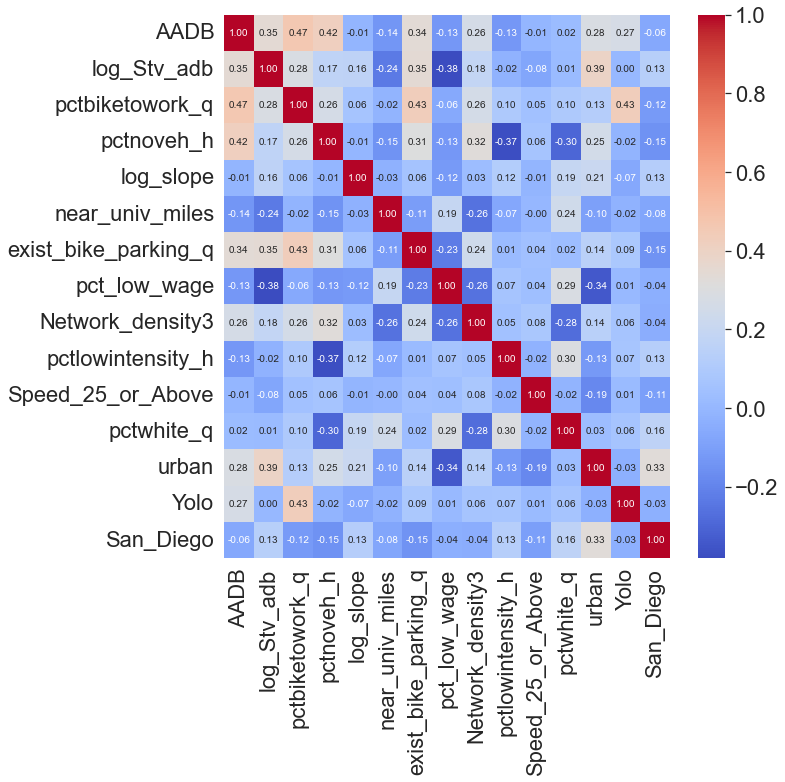

In [57]:
import seaborn as sb
plt.figure(figsize=(10,10))
corr = cor_df.corr()
sb.heatmap(corr, cmap="coolwarm", annot=True,fmt=".2f",annot_kws={"fontsize":10})

# Make some sns pair plot

In [45]:
df1=cor_df[['AADB','log_Stv_adb','pctbiketowork_q','pctnoveh_h']]

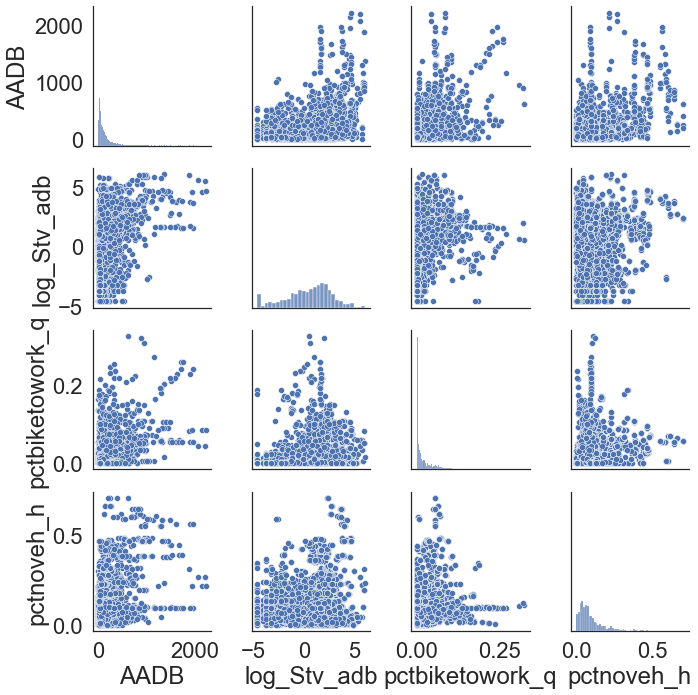

In [46]:
sns.pairplot(df1)

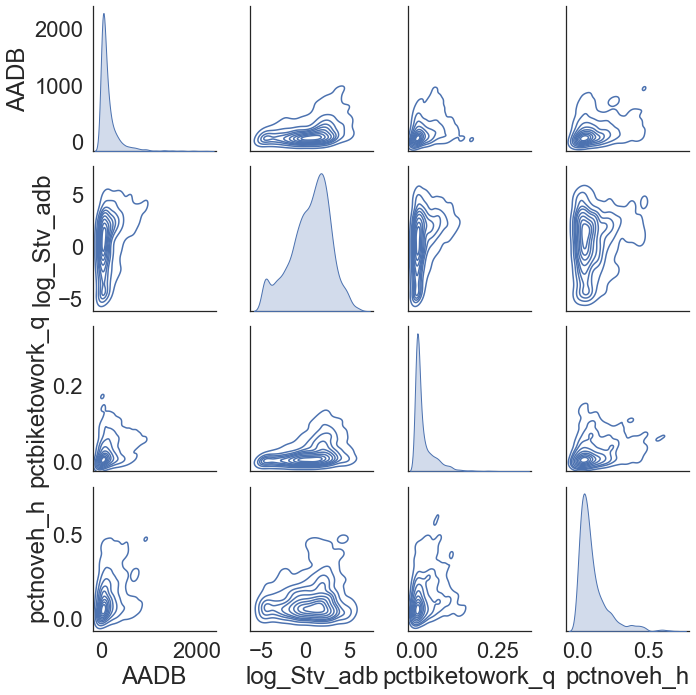

In [47]:
sns.pairplot(df1, kind="kde")

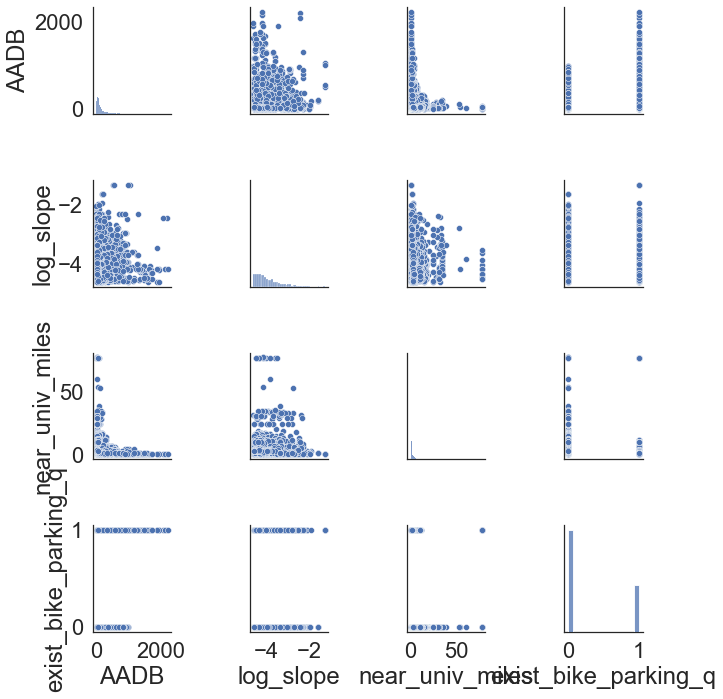

In [48]:
df2=cor_df[['AADB','log_slope','near_univ_miles','exist_bike_parking_q']]
sns.pairplot(df2)

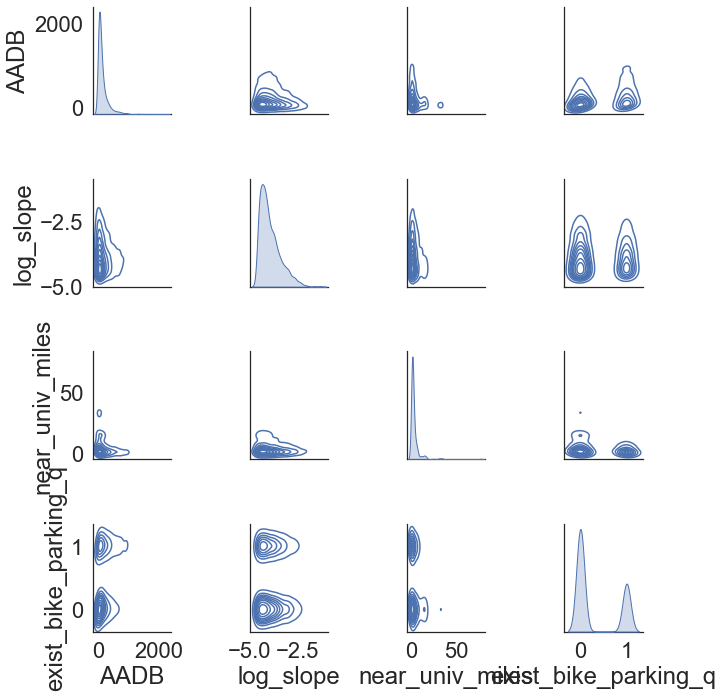

In [49]:
df2=cor_df[['AADB','log_slope','near_univ_miles','exist_bike_parking_q']]
sns.pairplot(df2, kind="kde")

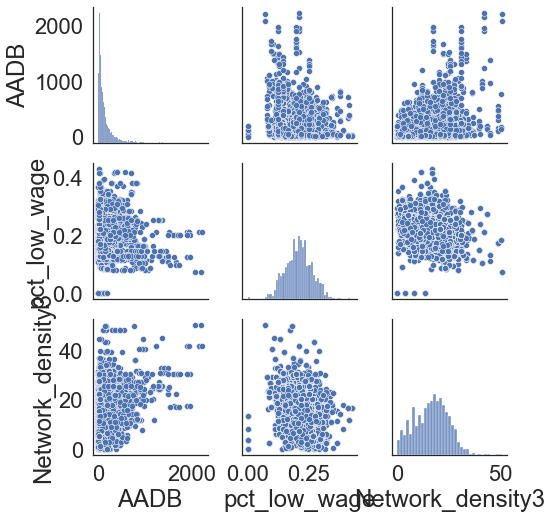

In [50]:
df3=cor_df[['AADB','pct_low_wage','Network_density3']]
sns.pairplot(df3)

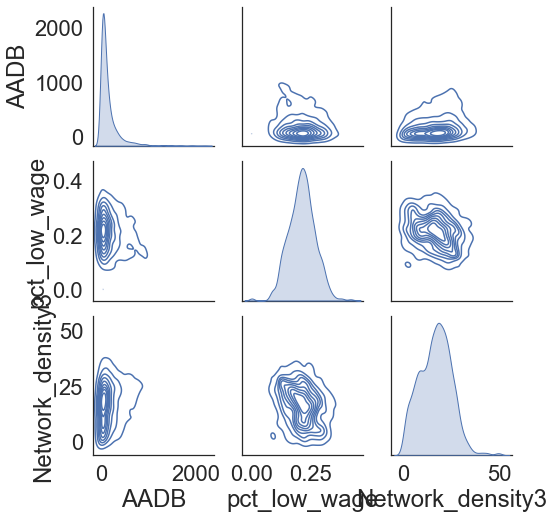

In [51]:
df3=cor_df[['AADB','pct_low_wage','Network_density3']]
sns.pairplot(df3, kind="kde")

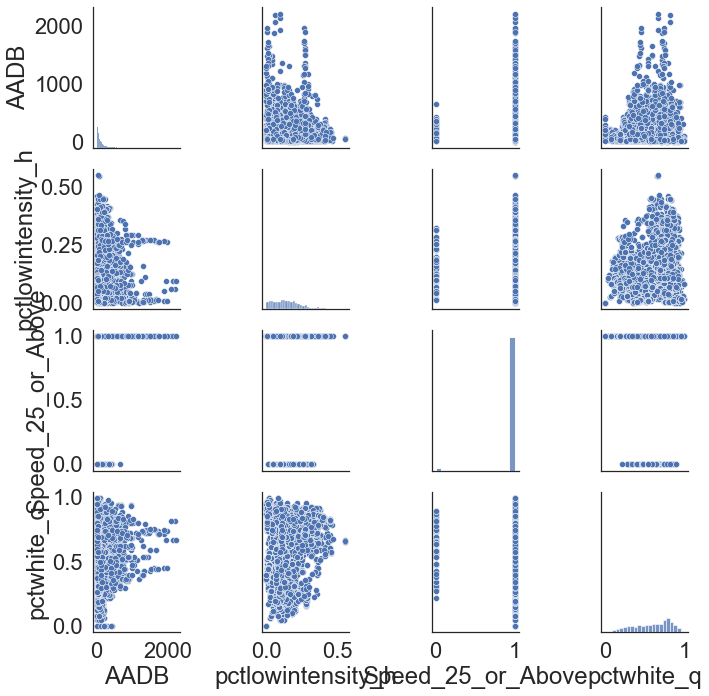

In [52]:
df4=cor_df[['AADB','pctlowintensity_h','Speed_25_or_Above','pctwhite_q']]
sns.pairplot(df4)

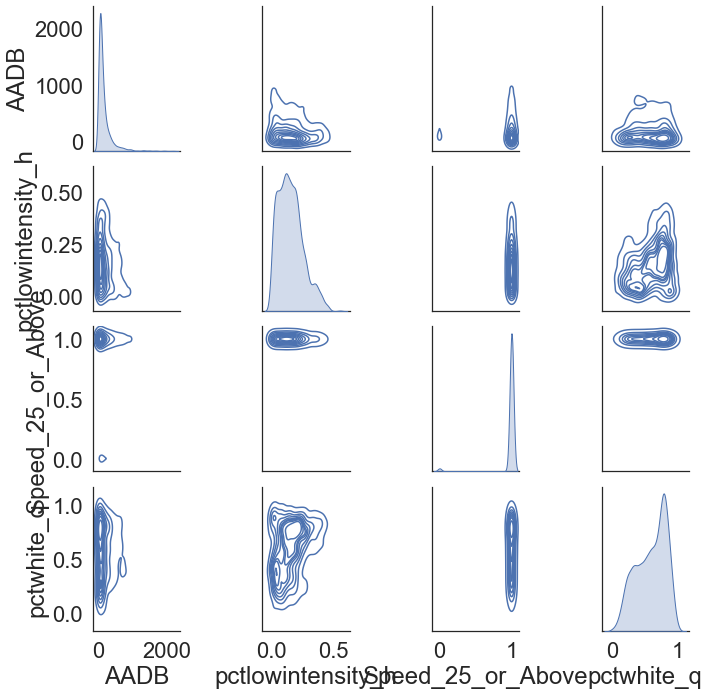

In [53]:
df4=cor_df[['AADB','pctlowintensity_h','Speed_25_or_Above','pctwhite_q']]
sns.pairplot(df4, kind="kde")

# select the Variables based on having correlation>0.20 and  VIF<=5

In [58]:
# keep only nymeric data
data2=data1._get_numeric_data()
data2.shape, data1.shape

((4167, 203), (4167, 216))

In [59]:
list(data2.columns)

['Unnamed: 0',
 'X',
 'ID',
 'Lat',
 'Long',
 'year',
 'ATT',
 'no_of_months_data_collected',
 'AADB',
 'ATT.in.Million',
 'matched_seg_id',
 'segment_id',
 'tdg_id',
 'lrs_cal_id',
 'bikes_proh',
 'int_tdg_id',
 'loc_id',
 'seg_counter',
 'fc_draft',
 'speed',
 'slope',
 'empnum_density_t',
 'geom_length',
 'adt_amt',
 'truck_adt_amt',
 'rt_lanes_amt',
 'lt_lanes_amt',
 'rt_trav_way_width',
 'rt_i_shd_tot_width',
 'rt_o_shd_tot_width',
 'lt_trav_way_width',
 'lt_i_shd_tot_width',
 'lt_o_shd_tot_width',
 'near_strava_id',
 'empnum_density_q',
 'empnum_density_h',
 'near_univ_miles',
 'near_large_univ_miles',
 'forward_trip_count',
 'reverse_trip_count',
 'forward_commute_trip_count',
 'reverse_commute_trip_count',
 'forward_leisure_trip_count',
 'reverse_leisure_trip_count',
 'forward_average_speed',
 'reverse_average_speed',
 'index',
 'ATT.in.Thousands',
 'rowIndex',
 'primary',
 'secondary',
 'tertiary',
 'residential',
 'trunk',
 'secondary_link',
 'unclassified',
 'speed_0_25',
 '

In [60]:
data3=data2.drop(['X',
 'ID',
 'Lat',
 'Long',
 'year',
 'ATT',
 'no_of_months_data_collected','ATT.in.Million',
 'matched_seg_id',
 'segment_id',
 'tdg_id',
 'lrs_cal_id',
 'bikes_proh',
 'int_tdg_id',
 'loc_id',
 'seg_counter',
 'fc_draft','geom_length','near_strava_id','index',
 'ATT.in.Thousands',
 'rowIndex', 'speed_0_25',
 'speed_21_35','Mean',
 'std',
 'outlier','primary',
 'secondary',
 'tertiary',
 'residential',
 'trunk',
 'secondary_link',
 'unclassified','Unnamed: 0','path','adt_amt',
 'truck_adt_amt',
 'rt_i_shd_tot_width',
 'rt_o_shd_tot_width',
 'lt_i_shd_tot_width', 'forward_trip_count',
 'reverse_commute_trip_count',
 'reverse_leisure_trip_count',
 'reverse_average_speed','Freeway','dist_ferry','exist_ferry_t','exist_ferry_q','exist_ferry_h', 'bgarea_t',
 'bgcliparea_t',
 'pctofbgarea_t', 'bgarea_q',
 'bgcliparea_q',
 'pctofbgarea_q', 'bgarea_h',
 'bgcliparea_h',
 'pctofbgarea_h', 'rt_lanes_amt',
 'lt_o_shd_tot_width','rt_lanes_amt',
 'lt_o_shd_tot_width','reverse_trip_count',
 'forward_leisure_trip_count',
 'forward_average_speed','lt_lanes_amt','rt_trav_way_width','lt_trav_way_width','forward_commute_trip_count','forward_commute_trip_count', 'Stv_commute_adb',
 'Stv_leisure_adb','Stv_adb','log_Stv_commute_adb',
 'log_Stv_leisure_adb'], axis=1)

In [61]:
data3.shape

(4167, 130)

In [62]:
corrMatrix1 = data3.corr()
low_corr_features = corrMatrix1.index[abs(corrMatrix1["AADB"])<=0.20]
low_corr_features

Index(['speed', 'slope', 'near_univ_miles', 'near_large_univ_miles',
       'speed_greater_than_35', 'Stv_Ave_speed', 'bike_lane', 'bike_route',
       'cycle_track', 'trail', 'Interstate', 'Principal_Arterial',
       'Minor_Arterial', 'Major_Collector', 'Minor_Collector', 'Local',
       'dist_subway', 'dist_amtrak', 'dist_busstop', 'exist_subway_t',
       'exist_amtrak_t', 'exist_busstop_t', 'exist_subway_q', 'exist_amtrak_q',
       'exist_busstop_q', 'exist_amtrak_h', 'exist_busstop_h', 'pct_low_wage',
       'pct_high_wage', 'Network_density1', 'Network_density2',
       'Intersection_density1', 'Intersection_density2',
       'Intersection_density3', 'Intersection_density41', 'Jobs_45min_auto_tt',
       'Population_45min_auto_tt', 'Population_accessibility_auto_1',
       'Central_index_auto1', 'Population_accessibility_auto2',
       'Central_index_auto2', 'Population_accessibility_transit1',
       'Central_index_transit1', 'Population_accessibility_transit2',
       'Centra

In [63]:
corrMatrix1 = data3.corr()
top_corr_features = corrMatrix1.index[abs(corrMatrix1["AADB"])>0.20]
top_corr_features

Index(['AADB', 'empnum_density_t', 'empnum_density_q', 'empnum_density_h',
       'exist_bike_parking_t', 'exist_bike_parking_q', 'exist_subway_h',
       'exist_bike_parking_h', 'pct_med_wage', 'Residential_density',
       'Total_road_Network_density', 'Network_density3',
       'Street_Intersection_density', 'Intersection_density5',
       'Jobs_45min_transit_commute', 'Population_45min_transit_commute',
       'pcthighintensity_t', 'pcthighintensity_q', 'pcthighintensity_h',
       'totwhitepersqmi_t', 'pctbiketowork_t', 'totbiketoworkpersqmi_t',
       'pctatleastbachelors_t', 'totatleastbachelorspersqmi_t', 'pctnoveh_t',
       'totnovehpersqmi_t', 'popdensitysqmi_t', 'hshlddensitysqmi_t',
       'totwhitepersqmi_q', 'pctbiketowork_q', 'totbiketoworkpersqmi_q',
       'pctatleastbachelors_q', 'totatleastbachelorspersqmi_q', 'pctnoveh_q',
       'totnovehpersqmi_q', 'popdensitysqmi_q', 'hshlddensitysqmi_q',
       'totwhitepersqmi_h', 'pctbiketowork_h', 'totbiketoworkpersqmi_h',
 

In [64]:
data4=data3[top_corr_features]
list(data4.columns)

['AADB',
 'empnum_density_t',
 'empnum_density_q',
 'empnum_density_h',
 'exist_bike_parking_t',
 'exist_bike_parking_q',
 'exist_subway_h',
 'exist_bike_parking_h',
 'pct_med_wage',
 'Residential_density',
 'Total_road_Network_density',
 'Network_density3',
 'Street_Intersection_density',
 'Intersection_density5',
 'Jobs_45min_transit_commute',
 'Population_45min_transit_commute',
 'pcthighintensity_t',
 'pcthighintensity_q',
 'pcthighintensity_h',
 'totwhitepersqmi_t',
 'pctbiketowork_t',
 'totbiketoworkpersqmi_t',
 'pctatleastbachelors_t',
 'totatleastbachelorspersqmi_t',
 'pctnoveh_t',
 'totnovehpersqmi_t',
 'popdensitysqmi_t',
 'hshlddensitysqmi_t',
 'totwhitepersqmi_q',
 'pctbiketowork_q',
 'totbiketoworkpersqmi_q',
 'pctatleastbachelors_q',
 'totatleastbachelorspersqmi_q',
 'pctnoveh_q',
 'totnovehpersqmi_q',
 'popdensitysqmi_q',
 'hshlddensitysqmi_q',
 'totwhitepersqmi_h',
 'pctbiketowork_h',
 'totbiketoworkpersqmi_h',
 'pctatleastbachelors_h',
 'totatleastbachelorspersqmi_h',


In [65]:
data4.shape

(4167, 50)

In [66]:
%%time
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


X_dataf = data4.drop(["AADB",'pctnoveh_t','pctnoveh_q','totnovehpersqmi_h'], axis=1)

while True:
#     # Check the VIF for further filter of the data
# # calculating VIF for each feature
    #X_dataf.replace(0, 1)
    X = add_constant(X_dataf)
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                           for i in range(len(X.columns))]
    vif_data=vif_data[1:]
    if vif_data['VIF'].max()<=5:
        break
    vif_data=vif_data.drop([vif_data['VIF'].idxmax()],axis='index')
    X_dataf = data4[vif_data['feature'].tolist()]
vif_data.sort_values('VIF')

CPU times: total: 17.3 s
Wall time: 10.8 s


feature       VIF
22                              Yolo  1.303772
5                     exist_subway_h  1.600165
23                       log_Stv_adb  1.838395
20                             urban  2.128120
3               exist_bike_parking_t  2.356483
18                   pctbiketowork_h  2.459690
11             Intersection_density5  2.522341
12  Population_45min_transit_commute  2.572010
21                     San_Francisco  2.634332
1                   empnum_density_t  2.661823
13                pcthighintensity_t  2.720561
8                Residential_density  2.829834
6               exist_bike_parking_h  2.891927
14                 totwhitepersqmi_t  3.298229
2                   empnum_density_h  3.330406
7                       pct_med_wage  3.374398
15            totbiketoworkpersqmi_t  3.782234
4               exist_bike_parking_q  3.799543
9         Total_road_Network_density  3.831589
16             pctatleastbachelors_t  4.040184
10       Street_Intersection_density  4.478083
17                 totnovehpersqmi_q  4.691850
19                        pctnoveh_h  4.771788

In [67]:
vif_data.shape

(23, 2)

In [68]:
list(vif_data['feature'])

['empnum_density_t',
 'empnum_density_h',
 'exist_bike_parking_t',
 'exist_bike_parking_q',
 'exist_subway_h',
 'exist_bike_parking_h',
 'pct_med_wage',
 'Residential_density',
 'Total_road_Network_density',
 'Street_Intersection_density',
 'Intersection_density5',
 'Population_45min_transit_commute',
 'pcthighintensity_t',
 'totwhitepersqmi_t',
 'totbiketoworkpersqmi_t',
 'pctatleastbachelors_t',
 'totnovehpersqmi_q',
 'pctbiketowork_h',
 'pctnoveh_h',
 'urban',
 'San_Francisco',
 'Yolo',
 'log_Stv_adb']

# Now select the Independent variables that have correlation less than 0.50 among them


In [182]:
data6=data[list(vif_data['feature'])]

In [69]:
# subsequently remove the variables untill mutual correlation is 0.50
data7=data2[['AADB','empnum_density_t',
 'exist_bike_parking_q',
 'Intersection_density5',
 'pctnoveh_h',
 'pctbiketowork_h',
 'urban',
 'Yolo',
 'log_Stv_adb']]

In [70]:
data7.describe()

AADB  empnum_density_t  exist_bike_parking_q  \
count  4167.000000       4167.000000           4167.000000   
mean    160.095032      12855.258327              0.318934   
std     229.497809      32338.790359              0.466120   
min       1.000000          0.000000              0.000000   
25%      38.000000       1002.676142              0.000000   
50%      81.000000       4456.338407              0.000000   
75%     180.000000      11857.043260              1.000000   
max    2220.000000     506080.888000              1.000000   

       Intersection_density5   pctnoveh_h  pctbiketowork_h        urban  \
count            4167.000000  4167.000000      4167.000000  4167.000000   
mean               36.088168     0.108101         0.021279     0.139429   
std                41.179729     0.107281         0.032548     0.346435   
min                 0.000000     0.000000         0.000000     0.000000   
25%                 6.825148     0.039686         0.000504     0.000000   
50%                20.325772     0.072974         0.007416     0.000000   
75%                52.697271     0.135199         0.027950     0.000000   
max               240.032299     0.702395         0.283880     1.000000   

              Yolo  log_Stv_adb  
count  4167.000000  4167.000000  
mean      0.010319     0.490267  
std       0.101070     2.247918  
min       0.000000    -4.605170  
25%       0.000000    -0.889964  
50%       0.000000     0.825916  
75%       0.000000     2.084105  
max       1.000000     6.011359

<AxesSubplot:>

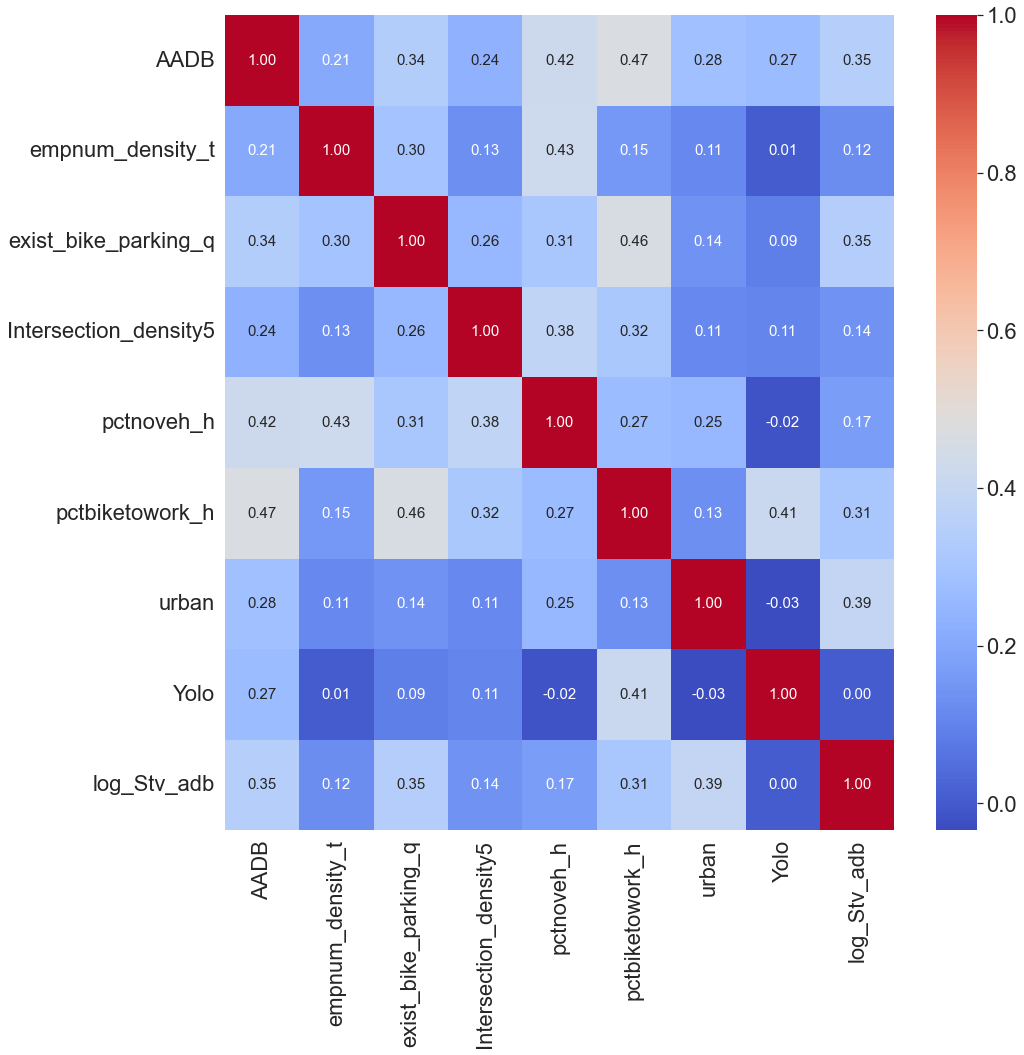

In [71]:
# Allow the mutual correlation upto 0.50
import seaborn as sb
plt.figure(figsize=(15,15))
corr = data7.corr()
sb.heatmap(corr, cmap="coolwarm", annot=True,fmt=".2f",annot_kws={"fontsize":15})

# Run the linear Regression Model

In [72]:
data7.columns

Index(['AADB', 'empnum_density_t', 'exist_bike_parking_q',
       'Intersection_density5', 'pctnoveh_h', 'pctbiketowork_h', 'urban',
       'Yolo', 'log_Stv_adb'],
      dtype='object')

In [73]:
track=data[['tdg_id','Leg','county', 'year','AADB','bike_facility_type']]
track['index']=track.index
track.head()

C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_16892\3087306744.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  track['index']=track.index


tdg_id  Leg   county  year  AADB bike_facility_type  index
0  208578  NaN  Alameda  2018    31     Others/Unknown      0
1  214389  NaN  Alameda  2017   191     Others/Unknown      1
2  214389  NaN  Alameda  2018   214     Others/Unknown      2
3  214389  NaN  Alameda  2019   210     Others/Unknown      3
4  214389  NaN  Alameda  2016   152     Others/Unknown      4

In [74]:
# Now we do 10fold cv for our NB:
LR_df=data7
num_folds = 10

kfold = KFold(n_splits=10, shuffle=True, random_state=94706)

# Now we perform KFold:

fold_num = 1
lr_MAPE_train = []
lr_MAPE_scores = []
lr_RMSE_train = []
lr_RMSE_scores = []
lr_MAE_train = []
lr_MAE_scores = []
lr_R2_train = []
lr_R2_scores = []

lr_low_MAPE_scores = []
lr_low_RMSE_scores = []
lr_low_MAE_scores = []
lr_low_R2_scores = []

lr_med_MAPE_scores = []
lr_med_RMSE_scores = []
lr_med_MAE_scores = []
lr_med_R2_scores = []

lr_high_MAPE_scores = []
lr_high_RMSE_scores = []
lr_high_MAE_scores = []
lr_high_R2_scores = []
test_pred = []

# we split the entire dataframe:
for train, test in kfold.split(LR_df):
    LR_CV_model = smf.ols(formula = 'AADB ~log_Stv_adb+exist_bike_parking_q+urban+pctnoveh_h+pctbiketowork_h+Yolo', data=LR_df.iloc[train],).fit(cov_type='HC3', use_t=True)
    train_predictions = LR_CV_model.predict(LR_df.iloc[train])
    test_predictions = LR_CV_model.predict(LR_df.iloc[test])
    predictions_lr = pd.DataFrame([LR_df.iloc[test].index,LR_CV_model.predict(LR_df.iloc[test]),LR_df.iloc[test]]).transpose()
    train_mae = mean_absolute_error(LR_df.iloc[train]['AADB'], train_predictions)
    lr_MAE_train.append(train_mae)
    test_mae = mean_absolute_error(LR_df.iloc[test]['AADB'], test_predictions)
    lr_MAE_scores.append(test_mae)
    train_rmse = math.sqrt(mean_squared_error(LR_df.iloc[train]['AADB'], train_predictions))
    lr_RMSE_train.append(train_rmse)
    test_rmse = math.sqrt(mean_squared_error(LR_df.iloc[test]['AADB'], test_predictions))
    lr_RMSE_scores.append(test_rmse)
    train_mape = mean_absolute_percentage_error(LR_df.iloc[train]['AADB'], train_predictions)
    lr_MAPE_train.append(train_mape)
    test_mape = mean_absolute_percentage_error(LR_df.iloc[test]['AADB'], test_predictions)
    lr_MAPE_scores.append(test_mape)
    train_r2 = r2_score(LR_df.iloc[train]['AADB'], train_predictions)
    lr_R2_train.append(train_r2)
    score_r2 = r2_score(LR_df.iloc[test]['AADB'], test_predictions)
    lr_R2_scores.append(score_r2)
    test_pred.append(predictions_lr)
    appended_data_lr = pd.concat(test_pred)
    
        # we split the Y[test] into 3 inclusive volumes: low (0-299), medium (300-750), high (>= 751)
    low_Y_test_mask = np.all([LR_df.iloc[test]['AADB'] >= 0, LR_df.iloc[test]['AADB'] <=100], axis=0)
    med_Y_test_mask = np.all([LR_df.iloc[test]['AADB'] >= 101, LR_df.iloc[test]['AADB'] <=300], axis=0)
    high_Y_test_mask = np.all([LR_df.iloc[test]['AADB'] >= 301],axis=0)
   
    lr_low_MAPE_scores.append(mean_absolute_percentage_error(LR_df.iloc[test]['AADB'] [low_Y_test_mask], LR_CV_model.predict(LR_df.iloc[test][low_Y_test_mask])))
    lr_low_RMSE_scores.append(math.sqrt(mean_squared_error(LR_df.iloc[test]['AADB'] [low_Y_test_mask], LR_CV_model.predict(LR_df.iloc[test][low_Y_test_mask]))))
    lr_low_MAE_scores.append(mean_absolute_error(LR_df.iloc[test]['AADB'] [low_Y_test_mask], LR_CV_model.predict(LR_df.iloc[test][low_Y_test_mask])))
    lr_low_R2_scores.append(r2_score(LR_df.iloc[test]['AADB'] [low_Y_test_mask], LR_CV_model.predict(LR_df.iloc[test][low_Y_test_mask])))

    lr_med_MAPE_scores.append(mean_absolute_percentage_error(LR_df.iloc[test]['AADB'] [med_Y_test_mask], LR_CV_model.predict(LR_df.iloc[test][med_Y_test_mask])))
    lr_med_RMSE_scores.append(math.sqrt(mean_squared_error(LR_df.iloc[test]['AADB'] [med_Y_test_mask], LR_CV_model.predict(LR_df.iloc[test][med_Y_test_mask]))))
    lr_med_MAE_scores.append(mean_absolute_error(LR_df.iloc[test]['AADB'] [med_Y_test_mask], LR_CV_model.predict(LR_df.iloc[test][med_Y_test_mask])))
    lr_med_R2_scores.append(r2_score(LR_df.iloc[test]['AADB'] [med_Y_test_mask], LR_CV_model.predict(LR_df.iloc[test][med_Y_test_mask])))

    lr_high_MAPE_scores.append(mean_absolute_percentage_error(LR_df.iloc[test]['AADB'] [high_Y_test_mask], LR_CV_model.predict(LR_df.iloc[test][high_Y_test_mask])))
    lr_high_RMSE_scores.append(math.sqrt(mean_squared_error(LR_df.iloc[test]['AADB'] [high_Y_test_mask], LR_CV_model.predict(LR_df.iloc[test][high_Y_test_mask]))))
    lr_high_MAE_scores.append(mean_absolute_error(LR_df.iloc[test]['AADB'] [high_Y_test_mask], LR_CV_model.predict(LR_df.iloc[test][high_Y_test_mask])))
    lr_high_R2_scores.append(r2_score(LR_df.iloc[test]['AADB'] [med_Y_test_mask], LR_CV_model.predict(LR_df.iloc[test][med_Y_test_mask])))
    
    print(
        f"------------------------------------------Fold {fold_num}------------------------------------------")
    print(f"\tTrain MAE: {train_mae}\tScore Loss: {test_mae}")
    print(f"\tTrain RMSE: {train_rmse}\tScore RMSE: {test_rmse}")
    print(f"\tTrain MAPE: {train_mape}\tScore MAPE: {test_mape}")
    print(f"\tTrain R2:   {train_r2}\tScore R2: {score_r2}")
    print(f"\n\t3-VOLUME SCORES: LOW (n={LR_df.iloc[test][low_Y_test_mask].shape[0]}), MED (n={LR_df.iloc[test][med_Y_test_mask].shape[0]}), HIGH (n={LR_df.iloc[test][high_Y_test_mask].shape[0]}), TOTAL IN FOLD (n={test.shape[0]})")
    print(f"\tLow Loss: {lr_low_MAE_scores[-1]}\tMed Loss: {lr_med_MAE_scores[-1]}\tHigh Loss: {lr_high_MAE_scores[-1]}")
    print(f"\tLow RMSE: {lr_low_RMSE_scores[-1]}\tMed RMSE: {lr_med_RMSE_scores[-1]}\tHigh RMSE: {lr_high_RMSE_scores[-1]}")
    print(f"\tLow MAPE: {lr_low_MAPE_scores[-1]}\tMed MAPE: {lr_med_MAPE_scores[-1]}\tHigh MAPE: {lr_high_MAPE_scores[-1]}")
    print(f"\tLow R2:   {lr_low_R2_scores[-1]}\tMed R2: {lr_med_R2_scores[-1]}\tHigh R2: {lr_high_R2_scores[-1]}")
    fold_num += 1

print(f"\n\nLow MAE Average: {np.mean(lr_low_MAE_scores)} +/- {np.std(lr_low_MAE_scores)}")
print(f"Low RMSE Average: {np.mean(lr_low_RMSE_scores)} +/- {np.std(lr_low_RMSE_scores)}")
print(f"Low MAPE Average: {np.mean(lr_low_MAPE_scores)} +/- {np.std(lr_low_MAPE_scores)}")
print(f"Low R2 Average: {np.mean(lr_low_R2_scores)} +/- {np.std(lr_low_R2_scores)}\n")

print(f"\nMed MAE Average: {np.mean(lr_med_MAE_scores)} +/- {np.std(lr_med_MAE_scores)}")
print(f"Med RMSE Average: {np.mean(lr_med_RMSE_scores)} +/- {np.std(lr_med_RMSE_scores)}")
print(f"Med MAPE Average: {np.mean(lr_med_MAPE_scores)} +/- {np.std(lr_med_MAPE_scores)}")
print(f"Med R2 Average: {np.mean(lr_med_R2_scores)} +/- {np.std(lr_med_R2_scores)}\n")

print(f"\nHigh MAE Average: {np.mean(lr_high_MAE_scores)} +/- {np.std(lr_high_MAE_scores)}")
print(f"High RMSE Average: {np.mean(lr_high_RMSE_scores)} +/- {np.std(lr_high_RMSE_scores)}")
print(f"High MAPE Average: {np.mean(lr_high_MAPE_scores)} +/- {np.std(lr_high_MAPE_scores)}")
print(f"High R2 Average: {np.mean(lr_high_R2_scores)} +/- {np.std(lr_high_R2_scores)}\n")

print(f"\n\nOverall MAE: {np.mean(lr_MAE_scores)} +/- {np.std(lr_MAE_scores)}")
print(f"Overall RMSE: {np.mean(lr_RMSE_scores)} +/- {np.std(lr_RMSE_scores)}")
print(f"Overall MAPE: {np.mean(lr_MAPE_scores)} +/- {np.std(lr_MAPE_scores)}")
print(f"Overall R2: {np.mean(lr_R2_scores)} +/- {np.std(lr_R2_scores)}\n\n")


print("Delimited table for Linear Regression 10 fold:")
print("MAPE\tRMSE\tMAE\tR2")
for i in range(0, 10):
    print("%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f" %
          (lr_MAPE_train[i], lr_MAPE_scores[i], lr_RMSE_train[i], lr_RMSE_scores[i], lr_MAE_train[i], lr_MAE_scores[i], lr_R2_train[i], lr_R2_scores[i]))
print("%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f\t<===Averages" % (np.mean(lr_MAPE_train), np.mean(lr_MAPE_scores), np.mean(lr_RMSE_train),
      np.mean(lr_RMSE_scores), np.mean(lr_MAE_train), np.mean(lr_MAE_scores), np.mean(lr_R2_train), np.mean(lr_R2_scores)))     

------------------------------------------Fold 1------------------------------------------
	Train MAE: 111.04100052470125	Score Loss: 114.05518362210707
	Train RMSE: 180.83262096807067	Score RMSE: 174.77354604111886
	Train MAPE: 210.4072490174834	Score MAPE: 188.77391786316772
	Train R2:   0.3848765061447107	Score R2: 0.36525279846276715

	3-VOLUME SCORES: LOW (n=240), MED (n=115), HIGH (n=62), TOTAL IN FOLD (n=417)
	Low Loss: 78.61647074901117	Med Loss: 105.41732223082016	High Loss: 267.25913764696213
	Low RMSE: 114.741131350008	Med RMSE: 139.4672133496397	High RMSE: 344.0975101264542
	Low MAPE: 284.7083119032529	Med MAPE: 66.73271215033957	High MAPE: 43.781725723728805
	Low R2:   -21.450766810739285	Med R2: -5.402772734561675	High R2: -5.402772734561675
------------------------------------------Fold 2------------------------------------------
	Train MAE: 110.23329866037986	Score Loss: 115.80685958600783
	Train RMSE: 176.88886455032247	Score RMSE: 207.83145671279772
	Train MAPE: 201.5

In [75]:
LR_CV_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   AADB   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     111.0
Date:                Sat, 22 Feb 2025   Prob (F-statistic):          3.50e-129
Time:                        09:55:47   Log-Likelihood:                -24770.
No. Observations:                3751   AIC:                         4.955e+04
Df Residuals:                    3744   BIC:                         4.960e+04
Df Model:                           6                                         
Covariance Type:                  HC3                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               26.7004      4.862      5.491      0.000      17.168      36.233
log_Stv_adb             15.9767      1.431     11.164      0.000      13.171      18.782
exist_bike_parking_q    32.2597      7.261      4.443      0.000      18.023      46.497
urban                   80.5813     13.806      5.837      0.000      53.514     107.649
pctnoveh_h             633.3276     47.872     13.230      0.000     539.470     727.185
pctbiketowork_h       1516.4102    167.527      9.052      0.000    1187.958    1844.862
Yolo                   303.8142     82.282      3.692      0.000     142.493     465.136
==============================================================================
Omnibus:                     2338.899   Durbin-Watson:                   1.293
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            46631.121
Skew:                           2.617   Prob(JB):                         0.00
Kurtosis:                      19.461   Cond. No.                         93.5
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

In [76]:
lr_data=appended_data_lr.rename(columns = {0:'Index_ID',1:'Predicted AADB',2:'Observed AADB'})
LR_data1=lr_data.groupby('Index_ID').mean()
graph_lr_data=pd.merge(track,LR_data1,left_on='index', right_on='Index_ID', how="inner")
# graph_data['Mean Predicted AADB in Million']=graph_data['Mean Predicted AADB']
# graph_data['Observed AADB in Million']=graph_data['Observed AADB']
graph_lr_data.head()

C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_16892\1798116082.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  LR_data1=lr_data.groupby('Index_ID').mean()


tdg_id  Leg   county  year  AADB bike_facility_type  index  Predicted AADB
0  208578  NaN  Alameda  2018    31     Others/Unknown      0      331.154489
1  214389  NaN  Alameda  2017   191     Others/Unknown      1       71.930655
2  214389  NaN  Alameda  2018   214     Others/Unknown      2       70.991685
3  214389  NaN  Alameda  2019   210     Others/Unknown      3       84.023496
4  214389  NaN  Alameda  2016   152     Others/Unknown      4       82.916657

In [77]:
graph_lr_data['Predicted AADB'].describe()

count    4167.000000
mean      159.997023
std       141.530139
min       -52.574509
25%        67.283612
50%       116.932542
75%       231.298772
max      1093.797285
Name: Predicted AADB, dtype: float64

In [78]:
graph_lr_data['AADB'].describe()

count    4167.000000
mean      160.095032
std       229.497809
min         1.000000
25%        38.000000
50%        81.000000
75%       180.000000
max      2220.000000
Name: AADB, dtype: float64

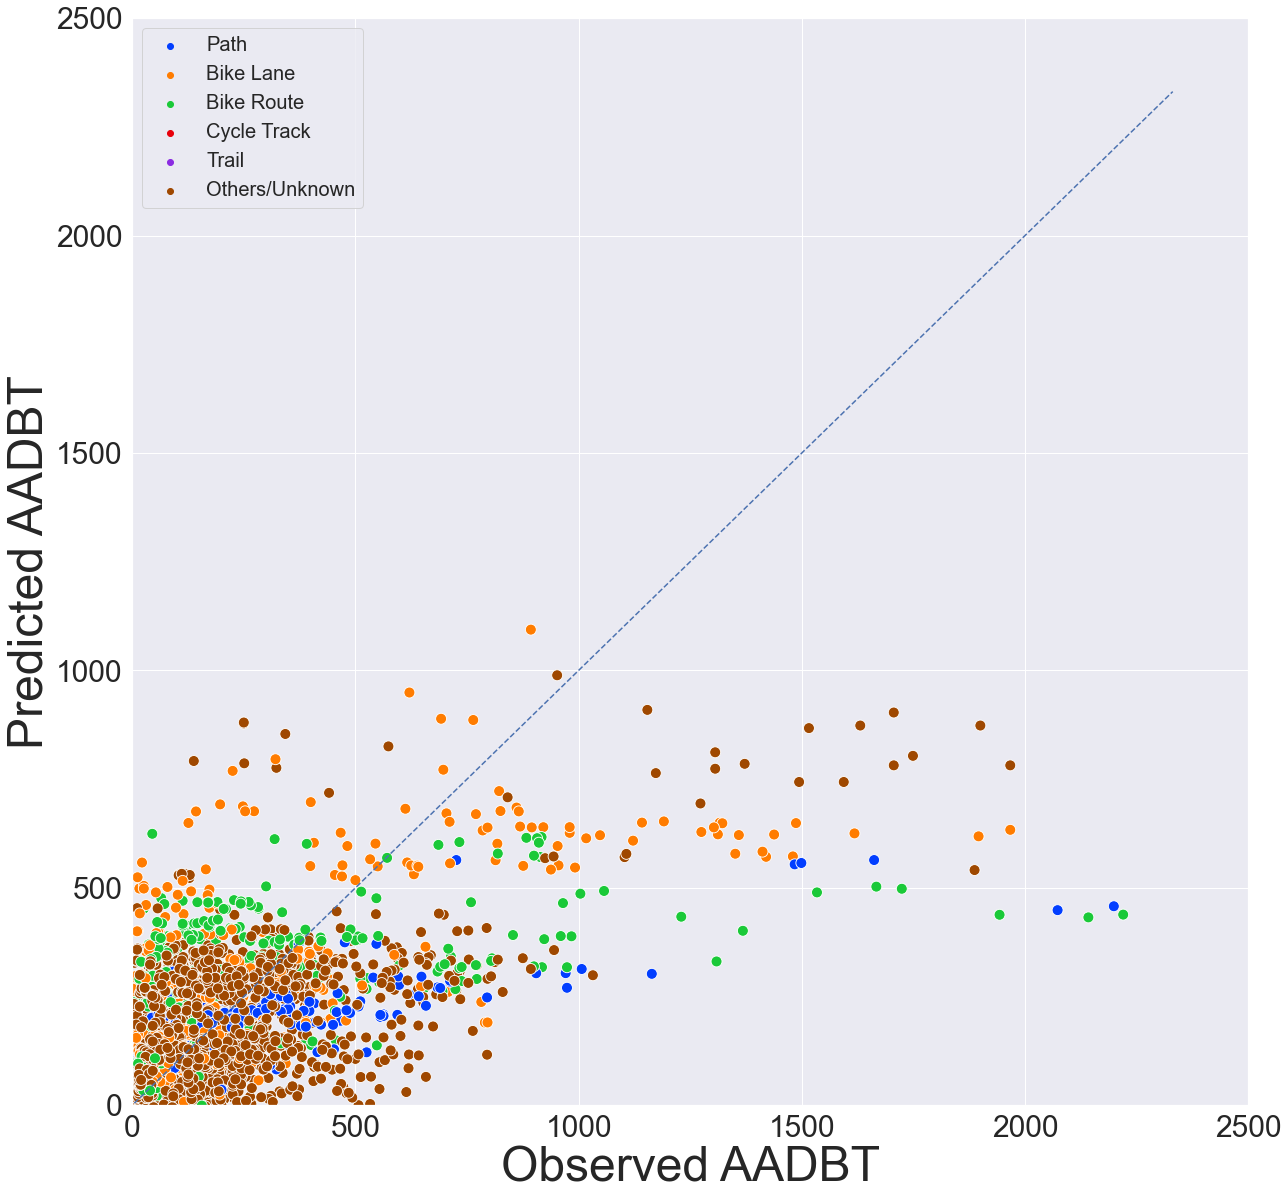

In [79]:
hue_order = ['Path','Bike Lane','Bike Route', 'Cycle Track', 'Trail','Others/Unknown']
sns.set(font_scale=4) 
plt.figure(figsize=(20,20))
g=sns.scatterplot(data=graph_lr_data, x="AADB", y="Predicted AADB", hue="bike_facility_type", palette="bright",s=120,hue_order=hue_order)
g.set(xlabel='Observed AADBT', ylabel='Predicted AADBT')
g.legend(fontsize=20)
abline(1, (0,0))
plt.xlim(0,2500)
plt.ylim(0,2500)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()

In [80]:
# Calculate the RMSPE for each different bike facilities
# Group by 'bike_facility_type' and apply the RMSPE function to each group
rmspe_by_facility = graph_lr_data.groupby('bike_facility_type').apply(
    lambda group: rmspe(group['Predicted AADB'], group['AADB'])
)
rmspe_by_facility

bike_facility_type
Bike Lane         113.961929
Bike Route        120.250719
Cycle Track       361.987383
Others/Unknown    106.620460
Path              104.251419
Trail             151.431625
dtype: float64

# Run Poisson Regression Model

In [81]:
#formula_str='AADB ~log_Stv_adb+exist_bike_parking_q+pctnoveh_h+pctbiketowork_h+Yolo'
formula_str='AADB ~log_Stv_adb+exist_bike_parking_q+pctnoveh_h+pctbiketowork_h+urban+Yolo'
#formula_str='AADB ~pctnoveh_t+urban+Yolo'

In [82]:
# track_nb=data[['tdg_id','Leg','county', 'year','AADB']]
# track_nb['index']=track_nb.index
# track_nb.head()

In [83]:
data7.head()

AADB  empnum_density_t  exist_bike_parking_q  Intersection_density5  \
0    31       9485.634608                     1              49.195096   
1   191          0.000000                     0               1.877040   
2   214          0.000000                     0               1.877040   
3   210          0.000000                     0               1.877040   
4   152          0.000000                     0               1.877040   

   pctnoveh_h  pctbiketowork_h  urban  Yolo  log_Stv_adb  
0    0.129288         0.046506      1     0     2.762028  
1    0.013903         0.000000      1     0    -2.312220  
2    0.013903         0.000000      1     0    -2.383884  
3    0.013903         0.000000      1     0    -2.245351  
4    0.013903         0.000000      1     0    -2.312220

In [84]:
data7.describe()

AADB  empnum_density_t  exist_bike_parking_q  \
count  4167.000000       4167.000000           4167.000000   
mean    160.095032      12855.258327              0.318934   
std     229.497809      32338.790359              0.466120   
min       1.000000          0.000000              0.000000   
25%      38.000000       1002.676142              0.000000   
50%      81.000000       4456.338407              0.000000   
75%     180.000000      11857.043260              1.000000   
max    2220.000000     506080.888000              1.000000   

       Intersection_density5   pctnoveh_h  pctbiketowork_h        urban  \
count            4167.000000  4167.000000      4167.000000  4167.000000   
mean               36.088168     0.108101         0.021279     0.139429   
std                41.179729     0.107281         0.032548     0.346435   
min                 0.000000     0.000000         0.000000     0.000000   
25%                 6.825148     0.039686         0.000504     0.000000   
50%                20.325772     0.072974         0.007416     0.000000   
75%                52.697271     0.135199         0.027950     0.000000   
max               240.032299     0.702395         0.283880     1.000000   

              Yolo  log_Stv_adb  
count  4167.000000  4167.000000  
mean      0.010319     0.490267  
std       0.101070     2.247918  
min       0.000000    -4.605170  
25%       0.000000    -0.889964  
50%       0.000000     0.825916  
75%       0.000000     2.084105  
max       1.000000     6.011359

In [85]:
 pd.Series(pd.qcut(data7.AADB,3).value_counts())

(0.999, 51.0]      1411
(136.0, 2220.0]    1385
(51.0, 136.0]      1371
Name: AADB, dtype: int64

In [86]:
low=data7.loc[data7['AADB']<=100]
mid=data7[(data7['AADB']>100) & (data7['AADB']<=300)]
high=data7.loc[data7['AADB']>300]
low.shape, mid.shape, high.shape

((2373, 9), (1217, 9), (577, 9))

In [87]:
data7['AADB'].describe()

count    4167.000000
mean      160.095032
std       229.497809
min         1.000000
25%        38.000000
50%        81.000000
75%       180.000000
max      2220.000000
Name: AADB, dtype: float64

In [88]:
low['AADB'].describe()

count    2373.000000
mean       46.367467
std        25.315826
min         1.000000
25%        25.000000
50%        42.000000
75%        65.000000
max       100.000000
Name: AADB, dtype: float64

In [89]:
mid['AADB'].describe()

count    1217.000000
mean      172.308956
std        54.811908
min       101.000000
25%       126.000000
50%       160.000000
75%       211.000000
max       300.000000
Name: AADB, dtype: float64

In [90]:
high['AADB'].describe()

count     577.000000
mean      602.055459
std       350.267542
min       301.000000
25%       365.000000
50%       475.000000
75%       708.000000
max      2220.000000
Name: AADB, dtype: float64

In [91]:
# Now we do 10fold cv for our PR:
PR_df=data7
num_folds = 10

kfold = KFold(n_splits=10, shuffle=True, random_state=94706)

# Now we perform KFold:

fold_num = 1
nb_MAPE_train = []
nb_MAPE_scores = []
nb_RMSE_train = []
nb_RMSE_scores = []
nb_MAE_train = []
nb_MAE_scores = []
nb_R2_train = []
nb_R2_scores = []

nb_low_MAPE_scores = []
nb_low_RMSE_scores = []
nb_low_MAE_scores = []
nb_low_R2_scores = []

nb_med_MAPE_scores = []
nb_med_RMSE_scores = []
nb_med_MAE_scores = []
nb_med_R2_scores = []

nb_high_MAPE_scores = []
nb_high_RMSE_scores = []
nb_high_MAE_scores = []
nb_high_R2_scores = []
test_pred = []

# we split the entire dataframe:
for train, test in kfold.split(PR_df):
    PR_CV_model = smf.glm(
        formula_str, data=PR_df.iloc[train], family=sm.families.Poisson()).fit(cov_type='HC3', use_t=True)

    train_predictions = PR_CV_model.predict(PR_df.iloc[train])
    test_predictions = PR_CV_model.predict(PR_df.iloc[test])
    predictions_pr = pd.DataFrame([PR_df.iloc[test].index,PR_CV_model.predict(PR_df.iloc[test]),PR_df.iloc[test]]).transpose()
    train_mae = mean_absolute_error(PR_df.iloc[train]['AADB'], train_predictions)
    nb_MAE_train.append(train_mae)
    test_mae = mean_absolute_error(PR_df.iloc[test]['AADB'], test_predictions)
    nb_MAE_scores.append(test_mae)
    train_rmse = math.sqrt(mean_squared_error(PR_df.iloc[train]['AADB'], train_predictions))
    nb_RMSE_train.append(train_rmse)
    test_rmse = math.sqrt(mean_squared_error(PR_df.iloc[test]['AADB'], test_predictions))
    nb_RMSE_scores.append(test_rmse)
    train_mape = mean_absolute_percentage_error(PR_df.iloc[train]['AADB'], train_predictions)
    nb_MAPE_train.append(train_mape)
    test_mape = mean_absolute_percentage_error(PR_df.iloc[test]['AADB'], test_predictions)
    nb_MAPE_scores.append(test_mape)
    train_r2 = r2_score(PR_df.iloc[train]['AADB'], train_predictions)
    nb_R2_train.append(train_r2)
    score_r2 = r2_score(PR_df.iloc[test]['AADB'], test_predictions)
    nb_R2_scores.append(score_r2)
    test_pred.append(predictions_pr)
    appended_data_pr = pd.concat(test_pred)
        # we split the Y[test] into 3 inclusive volumes: low (0-299), medium (300-750), high (>= 751)
    low_Y_test_mask = np.all([PR_df.iloc[test]['AADB'] >= 0, PR_df.iloc[test]['AADB'] <=100], axis=0)
    med_Y_test_mask = np.all([PR_df.iloc[test]['AADB'] >= 101, PR_df.iloc[test]['AADB'] <=300], axis=0)
    high_Y_test_mask = np.all([PR_df.iloc[test]['AADB'] >= 301],axis=0)
   
    nb_low_MAPE_scores.append(mean_absolute_percentage_error(PR_df.iloc[test]['AADB'] [low_Y_test_mask], PR_CV_model.predict(PR_df.iloc[test][low_Y_test_mask])))
    nb_low_RMSE_scores.append(math.sqrt(mean_squared_error(PR_df.iloc[test]['AADB'] [low_Y_test_mask], PR_CV_model.predict(PR_df.iloc[test][low_Y_test_mask]))))
    nb_low_MAE_scores.append(mean_absolute_error(PR_df.iloc[test]['AADB'] [low_Y_test_mask], PR_CV_model.predict(PR_df.iloc[test][low_Y_test_mask])))
    nb_low_R2_scores.append(r2_score(PR_df.iloc[test]['AADB'] [low_Y_test_mask], PR_CV_model.predict(PR_df.iloc[test][low_Y_test_mask])))

    nb_med_MAPE_scores.append(mean_absolute_percentage_error(PR_df.iloc[test]['AADB'] [med_Y_test_mask], PR_CV_model.predict(PR_df.iloc[test][med_Y_test_mask])))
    nb_med_RMSE_scores.append(math.sqrt(mean_squared_error(PR_df.iloc[test]['AADB'] [med_Y_test_mask], PR_CV_model.predict(PR_df.iloc[test][med_Y_test_mask]))))
    nb_med_MAE_scores.append(mean_absolute_error(PR_df.iloc[test]['AADB'] [med_Y_test_mask], PR_CV_model.predict(PR_df.iloc[test][med_Y_test_mask])))
    nb_med_R2_scores.append(r2_score(PR_df.iloc[test]['AADB'] [med_Y_test_mask], PR_CV_model.predict(PR_df.iloc[test][med_Y_test_mask])))

    nb_high_MAPE_scores.append(mean_absolute_percentage_error(PR_df.iloc[test]['AADB'] [high_Y_test_mask], PR_CV_model.predict(PR_df.iloc[test][high_Y_test_mask])))
    nb_high_RMSE_scores.append(math.sqrt(mean_squared_error(PR_df.iloc[test]['AADB'] [high_Y_test_mask], PR_CV_model.predict(PR_df.iloc[test][high_Y_test_mask]))))
    nb_high_MAE_scores.append(mean_absolute_error(PR_df.iloc[test]['AADB'] [high_Y_test_mask], PR_CV_model.predict(PR_df.iloc[test][high_Y_test_mask])))
    nb_high_R2_scores.append(r2_score(PR_df.iloc[test]['AADB'] [med_Y_test_mask], PR_CV_model.predict(PR_df.iloc[test][med_Y_test_mask])))
    
    print(
        f"------------------------------------------Fold {fold_num}------------------------------------------")
    print(f"\tTrain MAE: {train_mae}\tScore Loss: {test_mae}")
    print(f"\tTrain RMSE: {train_rmse}\tScore RMSE: {test_rmse}")
    print(f"\tTrain MAPE: {train_mape}\tScore MAPE: {test_mape}")
    print(f"\tTrain R2:   {train_r2}\tScore R2: {score_r2}")
    print(f"\n\t3-VOLUME SCORES: LOW (n={PR_df.iloc[test][low_Y_test_mask].shape[0]}), MED (n={PR_df.iloc[test][med_Y_test_mask].shape[0]}), HIGH (n={PR_df.iloc[test][high_Y_test_mask].shape[0]}), TOTAL IN FOLD (n={test.shape[0]})")
    print(f"\tLow Loss: {nb_low_MAE_scores[-1]}\tMed Loss: {nb_med_MAE_scores[-1]}\tHigh Loss: {nb_high_MAE_scores[-1]}")
    print(f"\tLow RMSE: {nb_low_RMSE_scores[-1]}\tMed RMSE: {nb_med_RMSE_scores[-1]}\tHigh RMSE: {nb_high_RMSE_scores[-1]}")
    print(f"\tLow MAPE: {nb_low_MAPE_scores[-1]}\tMed MAPE: {nb_med_MAPE_scores[-1]}\tHigh MAPE: {nb_high_MAPE_scores[-1]}")
    print(f"\tLow R2:   {nb_low_R2_scores[-1]}\tMed R2: {nb_med_R2_scores[-1]}\tHigh R2: {nb_high_R2_scores[-1]}")
    fold_num += 1

print(f"\n\nLow MAE Average: {np.mean(nb_low_MAE_scores)} +/- {np.std(nb_low_MAE_scores)}")
print(f"Low RMSE Average: {np.mean(nb_low_RMSE_scores)} +/- {np.std(nb_low_RMSE_scores)}")
print(f"Low MAPE Average: {np.mean(nb_low_MAPE_scores)} +/- {np.std(nb_low_MAPE_scores)}")
print(f"Low R2 Average: {np.mean(nb_low_R2_scores)} +/- {np.std(nb_low_R2_scores)}\n")

print(f"\nMed MAE Average: {np.mean(nb_med_MAE_scores)} +/- {np.std(nb_med_MAE_scores)}")
print(f"Med RMSE Average: {np.mean(nb_med_RMSE_scores)} +/- {np.std(nb_med_RMSE_scores)}")
print(f"Med MAPE Average: {np.mean(nb_med_MAPE_scores)} +/- {np.std(nb_med_MAPE_scores)}")
print(f"Med R2 Average: {np.mean(nb_med_R2_scores)} +/- {np.std(nb_med_R2_scores)}\n")

print(f"\nHigh MAE Average: {np.mean(nb_high_MAE_scores)} +/- {np.std(nb_high_MAE_scores)}")
print(f"High RMSE Average: {np.mean(nb_high_RMSE_scores)} +/- {np.std(nb_high_RMSE_scores)}")
print(f"High MAPE Average: {np.mean(nb_high_MAPE_scores)} +/- {np.std(nb_high_MAPE_scores)}")
print(f"High R2 Average: {np.mean(nb_high_R2_scores)} +/- {np.std(nb_high_R2_scores)}\n")

print(f"\n\nOverall MAE: {np.mean(nb_MAE_scores)} +/- {np.std(nb_MAE_scores)}")
print(f"Overall RMSE: {np.mean(nb_RMSE_scores)} +/- {np.std(nb_RMSE_scores)}")
print(f"Overall MAPE: {np.mean(nb_MAPE_scores)} +/- {np.std(nb_MAPE_scores)}")
print(f"Overall R2: {np.mean(nb_R2_scores)} +/- {np.std(nb_R2_scores)}\n\n")


print("Delimited table for Negative Binomial Regression 10 fold:")
print("MAPE\tRMSE\tMAE\tR2")
for i in range(0, 10):
    print("%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f" %
          (nb_MAPE_train[i], nb_MAPE_scores[i], nb_RMSE_train[i], nb_RMSE_scores[i], nb_MAE_train[i], nb_MAE_scores[i], nb_R2_train[i], nb_R2_scores[i]))
print("%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f\t<===Averages" % (np.mean(nb_MAPE_train), np.mean(nb_MAPE_scores), np.mean(nb_RMSE_train),
      np.mean(nb_RMSE_scores), np.mean(nb_MAE_train), np.mean(nb_MAE_scores), np.mean(nb_R2_train), np.mean(nb_R2_scores)))     

------------------------------------------Fold 1------------------------------------------
	Train MAE: 100.45188332237139	Score Loss: 101.98255947213269
	Train RMSE: 167.13780361672437	Score RMSE: 157.15648550377057
	Train MAPE: 181.6911023543084	Score MAPE: 165.83437465606784
	Train R2:   0.47451763938314284	Score R2: 0.48676765905935604

	3-VOLUME SCORES: LOW (n=240), MED (n=115), HIGH (n=62), TOTAL IN FOLD (n=417)
	Low Loss: 68.34409890373925	Med Loss: 84.0790089999715	High Loss: 265.4041536771805
	Low RMSE: 92.91900086381357	Med RMSE: 108.10917711100035	High RMSE: 333.1887483797576
	Low MAPE: 251.91383725441585	Med MAPE: 51.076276193165135	High MAPE: 45.481314972685475
	Low R2:   -13.723192357318197	Med R2: -2.847237198517443	High R2: -2.847237198517443
------------------------------------------Fold 2------------------------------------------
	Train MAE: 99.62978158185597	Score Loss: 106.76721238997163
	Train RMSE: 163.5428372785766	Score RMSE: 190.52599042307727
	Train MAPE: 175.2

In [92]:
PR_CV_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   AADB   No. Observations:                 3751
Model:                            GLM   Df Residuals:                     3744
Model Family:                 Poisson   Df Model:                            6
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.0617e+05
Date:                Sat, 22 Feb 2025   Deviance:                   3.8882e+05
Time:                        09:56:01   Pearson chi2:                 4.99e+05
No. Iterations:                     6   Pseudo R-squ. (CS):              1.000
Covariance Type:                  HC3                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                4.2742      0.025    169.211      0.000       4.225       4.324
log_Stv_adb              0.1576      0.013     12.048      0.000       0.132       0.183
exist_bike_parking_q     0.2059      0.040      5.198      0.000       0.128       0.284
pctnoveh_h               2.2167      0.139     15.946      0.000       1.944       2.489
pctbiketowork_h          6.5999      0.572     11.529      0.000       5.478       7.722
urban                    0.1226      0.057      2.151      0.032       0.011       0.234
Yolo                     0.5724      0.146      3.927      0.000       0.287       0.858
========================================================================================
"""

In [93]:
print(PR_CV_model.aic)

412345.41602222674


In [94]:
pr_data=appended_data_pr.rename(columns = {0:'Index_ID',1:'Predicted AADB',2:'Observed AADB'})
PR_data1=pr_data.groupby('Index_ID').mean()
graph_pr_data=pd.merge(track,PR_data1,left_on='index', right_on='Index_ID', how="inner")
# graph_data['Mean Predicted AADB in Million']=graph_data['Mean Predicted AADB']
# graph_data['Observed AADB in Million']=graph_data['Observed AADB']
graph_pr_data.head()

C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_16892\3309939307.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  PR_data1=pr_data.groupby('Index_ID').mean()


tdg_id  Leg   county  year  AADB bike_facility_type  index  Predicted AADB
0  208578  NaN  Alameda  2018    31     Others/Unknown      0      273.238460
1  214389  NaN  Alameda  2017   191     Others/Unknown      1       56.809029
2  214389  NaN  Alameda  2018   214     Others/Unknown      2       55.734215
3  214389  NaN  Alameda  2019   210     Others/Unknown      3       59.584153
4  214389  NaN  Alameda  2016   152     Others/Unknown      4       58.940998

In [95]:
graph_pr_data['Predicted AADB'].describe()

count    4167.000000
mean      159.972308
std       153.363555
min        33.065755
25%        78.147242
50%       113.154348
75%       186.083658
max      2250.642387
Name: Predicted AADB, dtype: float64

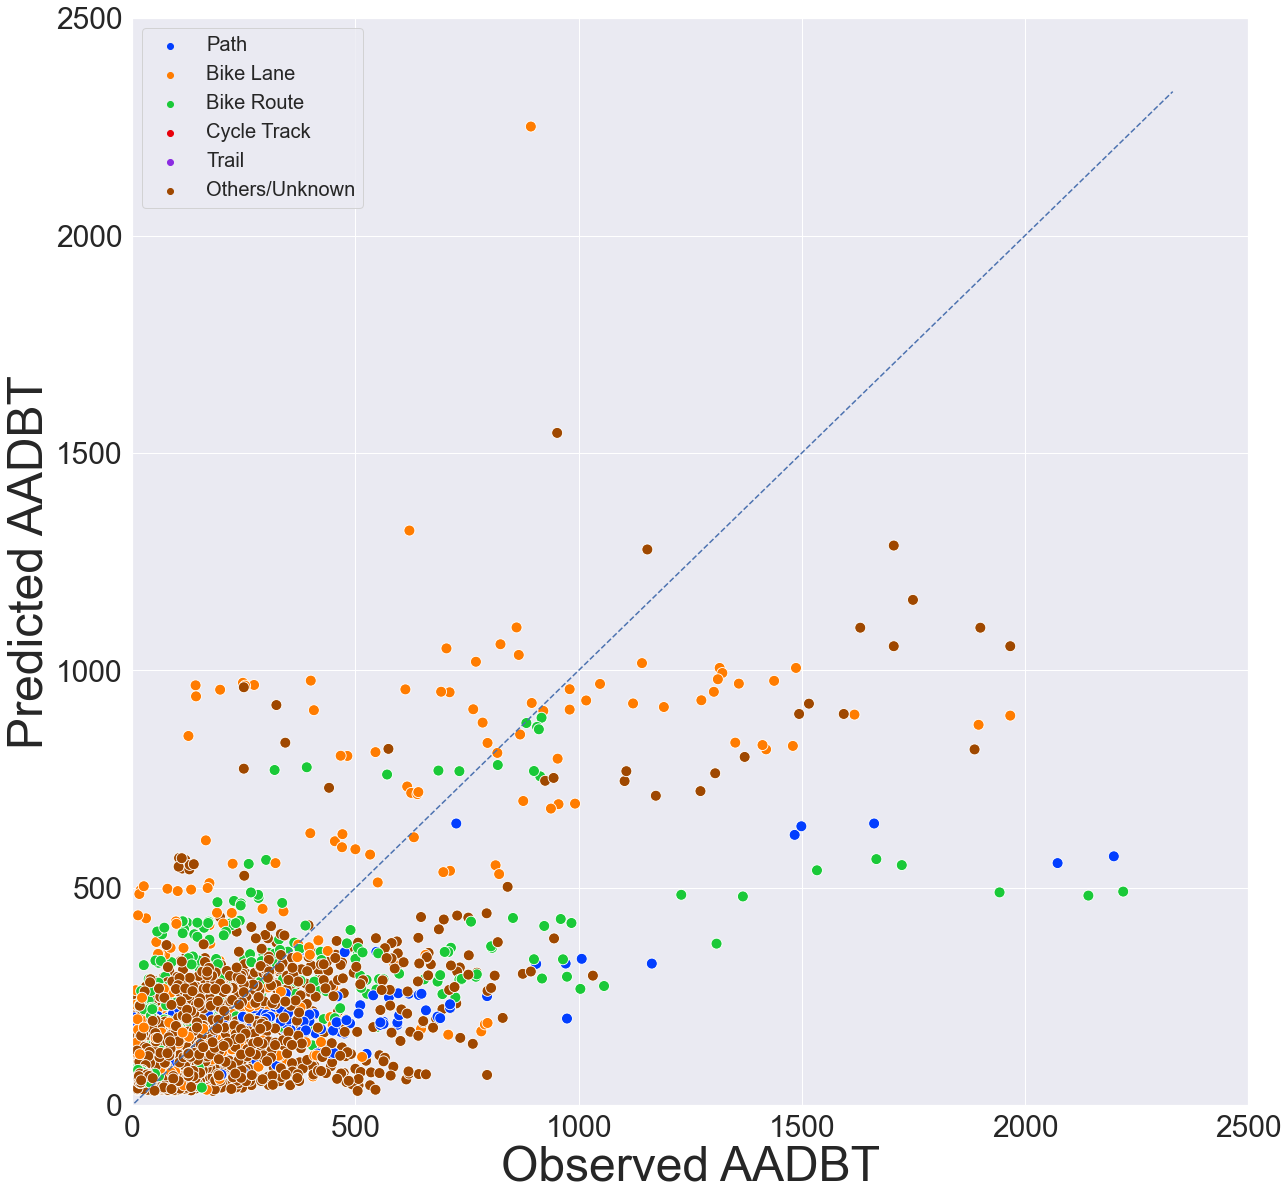

In [96]:
hue_order = ['Path','Bike Lane','Bike Route', 'Cycle Track', 'Trail','Others/Unknown']
sns.set(font_scale=4) 
plt.figure(figsize=(20,20))
g=sns.scatterplot(data=graph_pr_data, x="AADB", y="Predicted AADB", hue="bike_facility_type", palette="bright",s=120,hue_order=hue_order)
g.set(xlabel='Observed AADBT', ylabel='Predicted AADBT')
g.legend(fontsize=20)
abline(1, (0,0))
plt.xlim(0,2500)
plt.ylim(0,2500)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()

In [97]:
# Calculate the RMSPE for each different bike facilities
# Group by 'bike_facility_type' and apply the RMSPE function to each group
rmspe_by_facility = graph_pr_data.groupby('bike_facility_type').apply(
    lambda group: rmspe(group['Predicted AADB'], group['AADB'])
)
rmspe_by_facility

bike_facility_type
Bike Lane         104.035144
Bike Route        113.901058
Cycle Track       216.527503
Others/Unknown     96.132911
Path              101.014724
Trail             109.089123
dtype: float64

# Run NB Model

In [98]:
data7.columns

Index(['AADB', 'empnum_density_t', 'exist_bike_parking_q',
       'Intersection_density5', 'pctnoveh_h', 'pctbiketowork_h', 'urban',
       'Yolo', 'log_Stv_adb'],
      dtype='object')

In [99]:
formula_str='AADB ~log_Stv_adb+exist_bike_parking_q+pctnoveh_h+pctbiketowork_h+urban'

In [100]:
# Now we do 10fold cv for our NB:
NB_df=data1
num_folds = 10

kfold = KFold(n_splits=10, shuffle=True, random_state=94704)

# Now we perform KFold:

fold_num = 1
nb_MAPE_train = []
nb_MAPE_scores = []
nb_RMSE_train = []
nb_RMSE_scores = []
nb_MAE_train = []
nb_MAE_scores = []
nb_R2_train = []
nb_R2_scores = []

nb_low_MAPE_scores = []
nb_low_RMSE_scores = []
nb_low_MAE_scores = []
nb_low_R2_scores = []

nb_med_MAPE_scores = []
nb_med_RMSE_scores = []
nb_med_MAE_scores = []
nb_med_R2_scores = []

nb_high_MAPE_scores = []
nb_high_RMSE_scores = []
nb_high_MAE_scores = []
nb_high_R2_scores = []
test_pred = []

# we split the entire dataframe:
for train, test in kfold.split(NB_df):
    NB_CV_model = smf.glm(
        formula_str, data=NB_df.iloc[train], family=sm.families.NegativeBinomial()).fit(cov_type='HC3', use_t=True)

    train_predictions = NB_CV_model.predict(NB_df.iloc[train])
    test_predictions = NB_CV_model.predict(NB_df.iloc[test])
    predictions_nb = pd.DataFrame([NB_df.iloc[test].index,NB_CV_model.predict(NB_df.iloc[test]),NB_df.iloc[test]]).transpose()
    train_mae = mean_absolute_error(NB_df.iloc[train]['AADB'], train_predictions)
    nb_MAE_train.append(train_mae)
    test_mae = mean_absolute_error(NB_df.iloc[test]['AADB'], test_predictions)
    nb_MAE_scores.append(test_mae)
    train_rmse = math.sqrt(mean_squared_error(NB_df.iloc[train]['AADB'], train_predictions))
    nb_RMSE_train.append(train_rmse)
    test_rmse = math.sqrt(mean_squared_error(NB_df.iloc[test]['AADB'], test_predictions))
    nb_RMSE_scores.append(test_rmse)
    train_mape = mean_absolute_percentage_error(NB_df.iloc[train]['AADB'], train_predictions)
    nb_MAPE_train.append(train_mape)
    test_mape = mean_absolute_percentage_error(NB_df.iloc[test]['AADB'], test_predictions)
    nb_MAPE_scores.append(test_mape)
    train_r2 = r2_score(NB_df.iloc[train]['AADB'], train_predictions)
    nb_R2_train.append(train_r2)
    score_r2 = r2_score(NB_df.iloc[test]['AADB'], test_predictions)
    nb_R2_scores.append(score_r2)
    test_pred.append(predictions_nb)
    appended_data_nb = pd.concat(test_pred)
    
        # we split the Y[test] into 3 inclusive volumes: low (0-299), medium (300-750), high (>= 751)
    low_Y_test_mask = np.all([NB_df.iloc[test]['AADB'] >= 0, NB_df.iloc[test]['AADB'] <=100], axis=0)
    med_Y_test_mask = np.all([NB_df.iloc[test]['AADB'] >= 101, NB_df.iloc[test]['AADB'] <=300], axis=0)
    high_Y_test_mask = np.all([NB_df.iloc[test]['AADB'] >= 301],axis=0)
   
    nb_low_MAPE_scores.append(mean_absolute_percentage_error(NB_df.iloc[test]['AADB'] [low_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][low_Y_test_mask])))
    nb_low_RMSE_scores.append(math.sqrt(mean_squared_error(NB_df.iloc[test]['AADB'] [low_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][low_Y_test_mask]))))
    nb_low_MAE_scores.append(mean_absolute_error(NB_df.iloc[test]['AADB'] [low_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][low_Y_test_mask])))
    nb_low_R2_scores.append(r2_score(NB_df.iloc[test]['AADB'] [low_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][low_Y_test_mask])))

    nb_med_MAPE_scores.append(mean_absolute_percentage_error(NB_df.iloc[test]['AADB'] [med_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][med_Y_test_mask])))
    nb_med_RMSE_scores.append(math.sqrt(mean_squared_error(NB_df.iloc[test]['AADB'] [med_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][med_Y_test_mask]))))
    nb_med_MAE_scores.append(mean_absolute_error(NB_df.iloc[test]['AADB'] [med_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][med_Y_test_mask])))
    nb_med_R2_scores.append(r2_score(NB_df.iloc[test]['AADB'] [med_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][med_Y_test_mask])))

    nb_high_MAPE_scores.append(mean_absolute_percentage_error(NB_df.iloc[test]['AADB'] [high_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][high_Y_test_mask])))
    nb_high_RMSE_scores.append(math.sqrt(mean_squared_error(NB_df.iloc[test]['AADB'] [high_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][high_Y_test_mask]))))
    nb_high_MAE_scores.append(mean_absolute_error(NB_df.iloc[test]['AADB'] [high_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][high_Y_test_mask])))
    nb_high_R2_scores.append(r2_score(NB_df.iloc[test]['AADB'] [med_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][med_Y_test_mask])))
    
    print(
        f"------------------------------------------Fold {fold_num}------------------------------------------")
    print(f"\tTrain MAE: {train_mae}\tScore Loss: {test_mae}")
    print(f"\tTrain RMSE: {train_rmse}\tScore RMSE: {test_rmse}")
    print(f"\tTrain MAPE: {train_mape}\tScore MAPE: {test_mape}")
    print(f"\tTrain R2:   {train_r2}\tScore R2: {score_r2}")
    print(f"\n\t3-VOLUME SCORES: LOW (n={NB_df.iloc[test][low_Y_test_mask].shape[0]}), MED (n={NB_df.iloc[test][med_Y_test_mask].shape[0]}), HIGH (n={NB_df.iloc[test][high_Y_test_mask].shape[0]}), TOTAL IN FOLD (n={test.shape[0]})")
    print(f"\tLow Loss: {nb_low_MAE_scores[-1]}\tMed Loss: {nb_med_MAE_scores[-1]}\tHigh Loss: {nb_high_MAE_scores[-1]}")
    print(f"\tLow RMSE: {nb_low_RMSE_scores[-1]}\tMed RMSE: {nb_med_RMSE_scores[-1]}\tHigh RMSE: {nb_high_RMSE_scores[-1]}")
    print(f"\tLow MAPE: {nb_low_MAPE_scores[-1]}\tMed MAPE: {nb_med_MAPE_scores[-1]}\tHigh MAPE: {nb_high_MAPE_scores[-1]}")
    print(f"\tLow R2:   {nb_low_R2_scores[-1]}\tMed R2: {nb_med_R2_scores[-1]}\tHigh R2: {nb_high_R2_scores[-1]}")
    fold_num += 1

print(f"\n\nLow MAE Average: {np.mean(nb_low_MAE_scores)} +/- {np.std(nb_low_MAE_scores)}")
print(f"Low RMSE Average: {np.mean(nb_low_RMSE_scores)} +/- {np.std(nb_low_RMSE_scores)}")
print(f"Low MAPE Average: {np.mean(nb_low_MAPE_scores)} +/- {np.std(nb_low_MAPE_scores)}")
print(f"Low R2 Average: {np.mean(nb_low_R2_scores)} +/- {np.std(nb_low_R2_scores)}\n")

print(f"\nMed MAE Average: {np.mean(nb_med_MAE_scores)} +/- {np.std(nb_med_MAE_scores)}")
print(f"Med RMSE Average: {np.mean(nb_med_RMSE_scores)} +/- {np.std(nb_med_RMSE_scores)}")
print(f"Med MAPE Average: {np.mean(nb_med_MAPE_scores)} +/- {np.std(nb_med_MAPE_scores)}")
print(f"Med R2 Average: {np.mean(nb_med_R2_scores)} +/- {np.std(nb_med_R2_scores)}\n")

print(f"\nHigh MAE Average: {np.mean(nb_high_MAE_scores)} +/- {np.std(nb_high_MAE_scores)}")
print(f"High RMSE Average: {np.mean(nb_high_RMSE_scores)} +/- {np.std(nb_high_RMSE_scores)}")
print(f"High MAPE Average: {np.mean(nb_high_MAPE_scores)} +/- {np.std(nb_high_MAPE_scores)}")
print(f"High R2 Average: {np.mean(nb_high_R2_scores)} +/- {np.std(nb_high_R2_scores)}\n")

print(f"\n\nOverall MAE: {np.mean(nb_MAE_scores)} +/- {np.std(nb_MAE_scores)}")
print(f"Overall RMSE: {np.mean(nb_RMSE_scores)} +/- {np.std(nb_RMSE_scores)}")
print(f"Overall MAPE: {np.mean(nb_MAPE_scores)} +/- {np.std(nb_MAPE_scores)}")
print(f"Overall R2: {np.mean(nb_R2_scores)} +/- {np.std(nb_R2_scores)}\n\n")


print("Delimited table for Negative Binomial Regression 10 fold:")
print("MAPE\tRMSE\tMAE\tR2")
for i in range(0, 10):
    print("%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f" %
          (nb_MAPE_train[i], nb_MAPE_scores[i], nb_RMSE_train[i], nb_RMSE_scores[i], nb_MAE_train[i], nb_MAE_scores[i], nb_R2_train[i], nb_R2_scores[i]))
print("%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f\t<===Averages" % (np.mean(nb_MAPE_train), np.mean(nb_MAPE_scores), np.mean(nb_RMSE_train),
      np.mean(nb_RMSE_scores), np.mean(nb_MAE_train), np.mean(nb_MAE_scores), np.mean(nb_R2_train), np.mean(nb_R2_scores))) 

------------------------------------------Fold 1------------------------------------------
	Train MAE: 104.41940797066161	Score Loss: 98.50996875657358
	Train RMSE: 177.3128009613268	Score RMSE: 168.23503546010068
	Train MAPE: 184.621292631371	Score MAPE: 217.33338146496877
	Train R2:   0.40754246029075036	Score R2: 0.42176314782695756

	3-VOLUME SCORES: LOW (n=247), MED (n=113), HIGH (n=57), TOTAL IN FOLD (n=417)
	Low Loss: 60.51157691854998	Med Loss: 86.84811325064426	High Loss: 286.28878377695673
	Low RMSE: 78.34287968383629	Med RMSE: 135.5577739992151	High RMSE: 379.51713561642146
	Low MAPE: 332.2432449246887	Med MAPE: 51.461065626805045	High MAPE: 48.22523085376951
	Low R2:   -8.324922874993968	Med R2: -4.694761993542066	High R2: -4.694761993542066
------------------------------------------Fold 2------------------------------------------
	Train MAE: 103.3523396782292	Score Loss: 106.7357606202977
	Train RMSE: 175.367103724213	Score RMSE: 187.371950859561
	Train MAPE: 188.787680824

In [101]:
NB_CV_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   AADB   No. Observations:                 3751
Model:                            GLM   Df Residuals:                     3745
Model Family:        NegativeBinomial   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21886.
Date:                Sat, 22 Feb 2025   Deviance:                       2979.0
Time:                        09:56:08   Pearson chi2:                 3.60e+03
No. Iterations:                    11   Pseudo R-squ. (CS):             0.3718
Covariance Type:                  HC3                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                4.2667      0.024    175.179      0.000       4.219       4.314
log_Stv_adb              0.0809      0.009      9.488      0.000       0.064       0.098
exist_bike_parking_q     0.1518      0.039      3.854      0.000       0.075       0.229
pctnoveh_h               2.2322      0.139     16.073      0.000       1.960       2.504
pctbiketowork_h          9.4708      0.502     18.861      0.000       8.486      10.455
urban                    0.2721      0.059      4.578      0.000       0.156       0.389
========================================================================================
"""

In [102]:
nb_data=appended_data_nb.rename(columns = {0:'Index_ID',1:'Predicted AADB',2:'Observed AADB'})
NB_data1=nb_data.groupby('Index_ID').mean()
graph_nb_data=pd.merge(track,NB_data1,left_on='index', right_on='Index_ID', how="inner")
# graph_data['Mean Predicted AADB in Million']=graph_data['Mean Predicted AADB']
# graph_data['Observed AADB in Million']=graph_data['Observed AADB']
graph_nb_data.head()

C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_16892\4226851583.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  NB_data1=nb_data.groupby('Index_ID').mean()


tdg_id  Leg   county  year  AADB bike_facility_type  index  Predicted AADB
0  208578  NaN  Alameda  2018    31     Others/Unknown      0      291.319844
1  214389  NaN  Alameda  2017   191     Others/Unknown      1       84.601506
2  214389  NaN  Alameda  2018   214     Others/Unknown      2       84.137001
3  214389  NaN  Alameda  2019   210     Others/Unknown      3       82.660070
4  214389  NaN  Alameda  2016   152     Others/Unknown      4       86.968177

In [103]:
graph_nb_data['Predicted AADB'].describe()

count    4167.000000
mean      159.303375
std       150.896465
min        49.421558
25%        83.532090
50%       106.201837
75%       175.426581
max      2360.157495
Name: Predicted AADB, dtype: float64

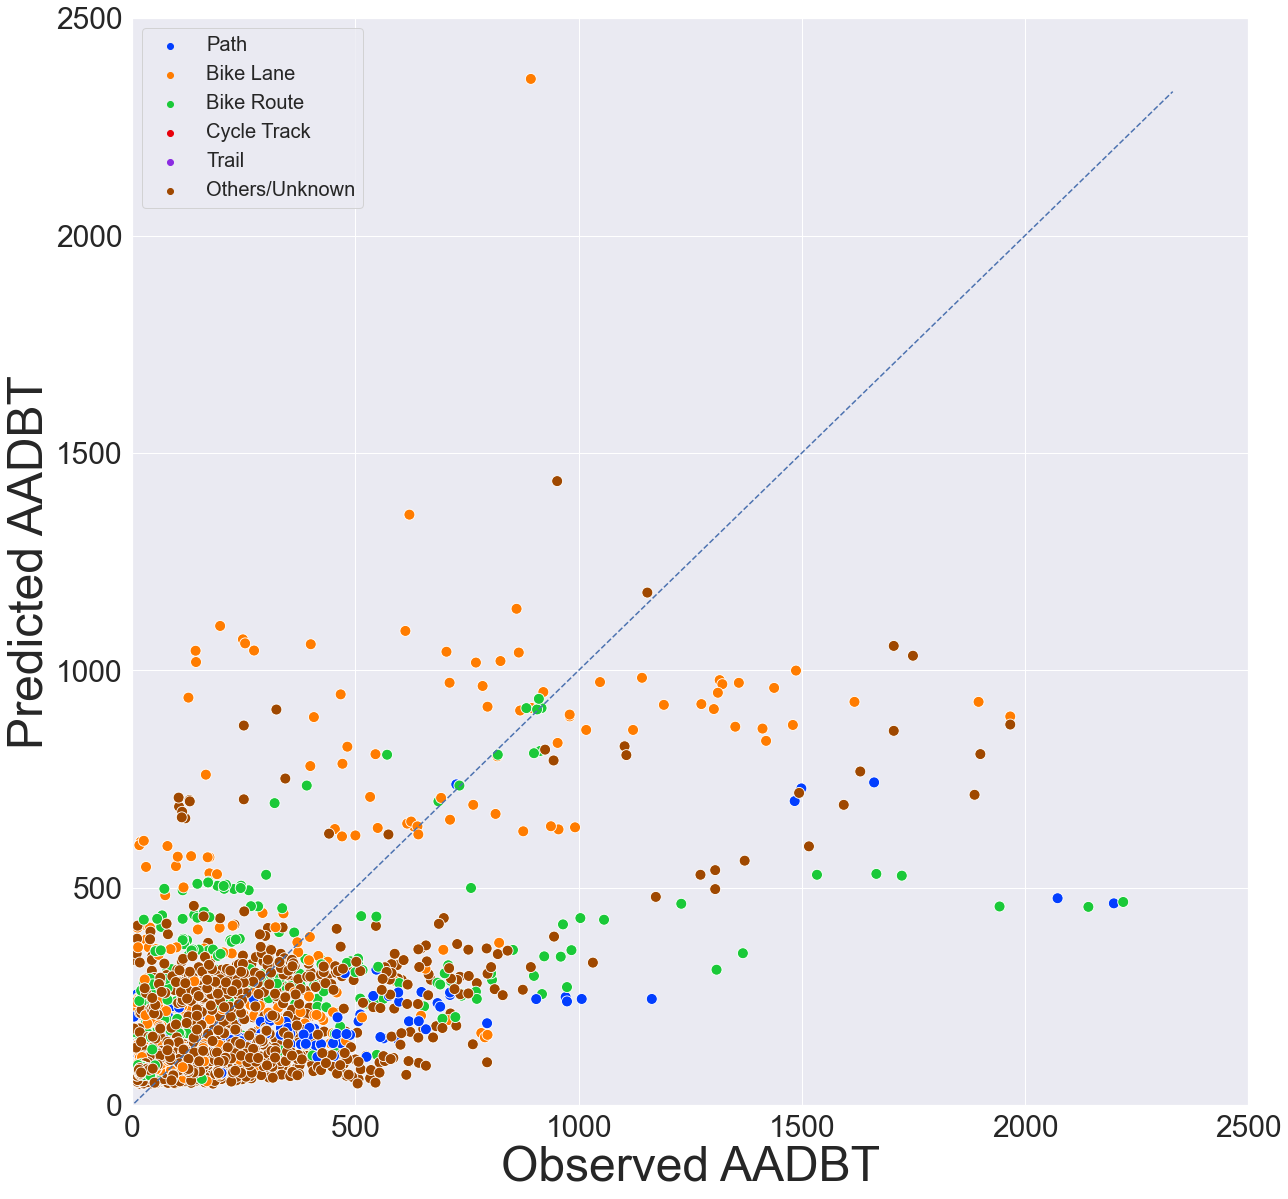

In [104]:
hue_order = ['Path','Bike Lane','Bike Route', 'Cycle Track', 'Trail','Others/Unknown']
sns.set(font_scale=4) 
plt.figure(figsize=(20,20))
g=sns.scatterplot(data=graph_nb_data, x="AADB", y="Predicted AADB", hue="bike_facility_type", palette="bright",s=120,hue_order=hue_order)
g.set(xlabel='Observed AADBT', ylabel='Predicted AADBT')
g.legend(fontsize=20)
abline(1, (0,0))
plt.xlim(0,2500)
plt.ylim(0,2500)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()

In [105]:
# Calculate the RMSPE for each different bike facilities
# Group by 'bike_facility_type' and apply the RMSPE function to each group
rmspe_by_facility = graph_nb_data.groupby('bike_facility_type').apply(
    lambda group: rmspe(group['Predicted AADB'], group['AADB'])
)
rmspe_by_facility

bike_facility_type
Bike Lane         110.327028
Bike Route        117.804468
Cycle Track       248.246104
Others/Unknown    102.643834
Path              105.015050
Trail             106.957430
dtype: float64

In [91]:
#print(NB_CV_model.aic)

# Run the Random Forest with the same set of Variables

In [106]:
model_data=data1[['AADB', 'empnum_density_t', 'exist_bike_parking_q',
       'Intersection_density5', 'pctnoveh_h', 'pctbiketowork_h', 'urban',
       'Yolo', 'log_Stv_adb']]

In [107]:
track=data[['tdg_id','Leg','county', 'year','AADB','bike_facility_type']]
track['index']=track.index
track.head()

C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_16892\3087306744.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  track['index']=track.index


tdg_id  Leg   county  year  AADB bike_facility_type  index
0  208578  NaN  Alameda  2018    31     Others/Unknown      0
1  214389  NaN  Alameda  2017   191     Others/Unknown      1
2  214389  NaN  Alameda  2018   214     Others/Unknown      2
3  214389  NaN  Alameda  2019   210     Others/Unknown      3
4  214389  NaN  Alameda  2016   152     Others/Unknown      4

In [108]:
# split data into X dataframe and Y dataframe:
X_data = model_data.drop("AADB", axis=1)
Y_data = model_data["AADB"]
print(f"X_data.shape: {X_data.shape} Y_data.shape: {Y_data.shape}")
features = model_data.drop("AADB", axis=1)
feature_list = list(features.columns)
X = np.asarray(X_data)
Y = np.asarray(Y_data)
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=94704)

X_data.shape: (4167, 8) Y_data.shape: (4167,)


In [130]:
# find best hyper parameter
from hyperopt import fmin, tpe, hp, anneal, Trials
random_state=94704
n_iter=500
num_folds=10
kf = KFold(n_splits=num_folds)

def rf_mse_cv(params, random_state=random_state, cv=kf, X=X, Y=Y):
    # the function gets a set of variable parameters in "param"
    params = {'n_estimators': int(params['n_estimators']), 
              'max_depth': int(params['max_depth']), 
             'min_samples_leaf':int(params['min_samples_leaf']),
             'min_samples_split':int(params['min_samples_split'])
             }
    
    # we use this params to create a new RF Regressor
    model = RandomForestRegressor(random_state=random_state, **params)
    score = -cross_val_score(model, X, Y, cv=cv, scoring="neg_mean_squared_error", n_jobs=-1,error_score='raise').mean()

    return score

def optimize(trial):
    params={'n_estimators':hp.uniform('n_estimators',50,2000),
           'max_depth':hp.uniform('max_depth',2,150),
           'min_samples_leaf':hp.uniform('min_samples_leaf',1,5),
           'min_samples_split':hp.uniform('min_samples_split',2,12)}
    best=fmin(fn=rf_mse_cv,space=params,algo=tpe.suggest,trials=trial,max_evals=n_iter,rstate=np.random.default_rng(random_state))
    return best

trial=Trials()
best=optimize(trial)

100%|█████████████████████████████████████████████| 500/500 [1:45:18<00:00, 12.64s/trial, best loss: 31319.75682691855]


In [131]:
print(best)

{'max_depth': 21.160541102090612, 'min_samples_leaf': 1.2723821104453585, 'min_samples_split': 11.989931797548781, 'n_estimators': 194.45992910232633}


In [132]:
TID=[t['tid'] for t in trial.trials]
Loss=[t['result']['loss'] for t in trial.trials]
maxd=[t['misc']['vals']['max_depth'][0] for t in trial.trials]
nest=[t['misc']['vals']['n_estimators'][0] for t in trial.trials]
min_ss=[t['misc']['vals']['min_samples_split'][0] for t in trial.trials]
min_sl=[t['misc']['vals']['min_samples_leaf'][0] for t in trial.trials]

hyperopt_rfr=pd.DataFrame({'tid':TID,'loss':Loss,
                          'max_depth':maxd,'n_estimators':nest,
                          'min_samples_split':min_ss, 'min_samples_leaf':min_sl})
hyperopt_rfr['RMSE']=np.sqrt(hyperopt_rfr['loss'])

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

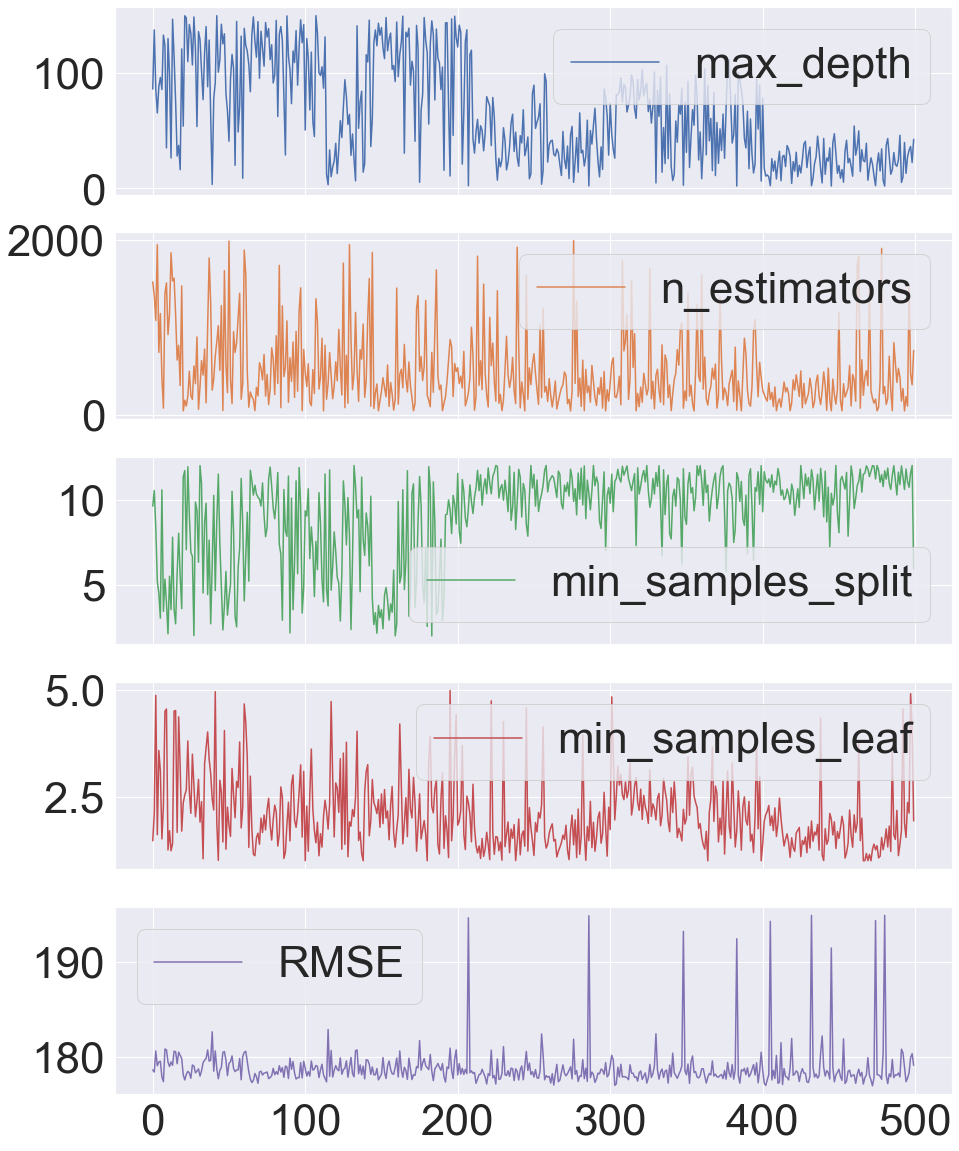

In [133]:
hyperopt_rfr[[
 'max_depth',
 'n_estimators',
 'min_samples_split',
 'min_samples_leaf',
 'RMSE']].plot(subplots=True,figsize=(15, 20))

In [109]:
import numpy as np
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import KBinsDiscretizer

class regressor_stratified_cv:
    def __init__(self,n_splits=10,n_repeats=1,group_count=10,random_state=37914,strategy='quantile'):
        self.group_count=group_count
        self.strategy=strategy
        self.cvkwargs=dict(n_splits=n_splits,n_repeats=n_repeats,random_state=random_state)
        self.cv=RepeatedStratifiedKFold(**self.cvkwargs)
        self.discretizer=KBinsDiscretizer(n_bins=self.group_count,encode='ordinal',strategy=self.strategy)  
            
    def split(self,X,y,groups=None):
        kgroups=self.discretizer.fit_transform(y[:,None])[:,0]
        return self.cv.split(X,kgroups,groups)
    
    def get_n_splits(self,X,y,groups=None):
        return self.cv.get_n_splits(X,y,groups)

In [110]:
import warnings
warnings.filterwarnings('ignore')
# Lets breakdown this results by volume bin
#https://scikit-learn.org/stable/auto_examples/preprocessing/plot_discretization_strategies.html
# Now we do 10fold cv for our NB:
#num_folds = 10
n_splits=10
n_repeats=1
group_count=10
kfold = regressor_stratified_cv(n_splits=n_splits,n_repeats=n_repeats,
        group_count=group_count,random_state=94704,strategy='quantile') #another option uniform

# Now we perform KFold:

fold_num = 1
rf_MAPE_train = []
rf_MAPE_scores = []
rf_RMSE_train = []
rf_RMSE_scores = []
rf_MAE_train = []
rf_MAE_scores = []
rf_R2_train = []
rf_R2_scores = []

rf_low_MAPE_scores = []
rf_low_RMSE_scores = []
rf_low_MAE_scores = []
rf_low_R2_scores = []

rf_med_MAPE_scores = []
rf_med_RMSE_scores = []
rf_med_MAE_scores = []
rf_med_R2_scores = []

rf_high_MAPE_scores = []
rf_high_RMSE_scores = []
rf_high_MAE_scores = []
rf_high_R2_scores = []
test_pred = []



# we split the entire dataframe:
for train, test in kfold.split(X_data, Y_data):
    rf_CV_model = RandomForestRegressor(random_state= 94704,n_estimators=194,max_depth=21,min_samples_split=12,min_samples_leaf=1,max_features='sqrt',bootstrap=False).fit(X_data.iloc[train], Y_data.iloc[train])
    train_predictions = rf_CV_model.predict(X_data.iloc[train])
    test_predictions = rf_CV_model.predict(X_data.iloc[test])
    predictions_df = pd.DataFrame([X_data.iloc[test].index,rf_CV_model.predict(X_data.iloc[test]),Y_data.iloc[test]]).transpose()
    train_mape = mean_absolute_percentage_error(Y_data.iloc[train], train_predictions)
    rf_MAPE_train.append(train_mape)
    test_mape = mean_absolute_percentage_error(Y_data.iloc[test], test_predictions)
    rf_MAPE_scores.append(test_mape)
    train_rmse = math.sqrt(mean_squared_error(Y_data.iloc[train], train_predictions))
    rf_RMSE_train.append(train_rmse)
    test_rmse = math.sqrt(mean_squared_error(Y_data.iloc[test], test_predictions))
    rf_RMSE_scores.append(test_rmse)
    train_mae = mean_absolute_error(Y_data.iloc[train], train_predictions)
    rf_MAE_train.append(train_mae)
    test_mae = mean_absolute_error(Y_data.iloc[test], test_predictions)
    rf_MAE_scores.append(test_mae)
    train_r2 = r2_score(Y_data.iloc[train], train_predictions)
    rf_R2_train.append(train_r2)
    score_r2 = r2_score(Y_data.iloc[test], test_predictions)
    rf_R2_scores.append(score_r2)
    test_pred.append(predictions_df)
    appended_data = pd.concat(test_pred)
    # we split the Y[test] into 3 inclusive volumes: low (0-51), medium (52-138), high (>= 138)
    low_Y_test_mask = np.all([Y_data.iloc[test] >= 0, Y_data.iloc[test] <=100], axis=0)
    med_Y_test_mask = np.all([Y_data.iloc[test] >= 101, Y_data.iloc[test] <=300], axis=0)
    high_Y_test_mask = np.all([Y_data.iloc[test] >= 301],axis=0)
   
    rf_low_MAPE_scores.append(mean_absolute_percentage_error(Y_data.iloc[test][low_Y_test_mask], rf_CV_model.predict(X_data.iloc[test][low_Y_test_mask])))
    rf_low_RMSE_scores.append(math.sqrt(mean_squared_error(Y_data.iloc[test][low_Y_test_mask], rf_CV_model.predict(X_data.iloc[test][low_Y_test_mask]))))
    rf_low_MAE_scores.append(mean_absolute_error(Y_data.iloc[test][low_Y_test_mask], rf_CV_model.predict(X_data.iloc[test][low_Y_test_mask])))
    rf_low_R2_scores.append(r2_score(Y_data.iloc[test][low_Y_test_mask], rf_CV_model.predict(X_data.iloc[test][low_Y_test_mask])))

    rf_med_MAPE_scores.append(mean_absolute_percentage_error(Y_data.iloc[test][med_Y_test_mask], rf_CV_model.predict(X_data.iloc[test][med_Y_test_mask])))
    rf_med_RMSE_scores.append(math.sqrt(mean_squared_error(Y_data.iloc[test][med_Y_test_mask], rf_CV_model.predict(X_data.iloc[test][med_Y_test_mask]))))
    rf_med_MAE_scores.append(mean_absolute_error(Y_data.iloc[test][med_Y_test_mask], rf_CV_model.predict(X_data.iloc[test][med_Y_test_mask])))
    rf_med_R2_scores.append(r2_score(Y_data.iloc[test][med_Y_test_mask], rf_CV_model.predict(X_data.iloc[test][med_Y_test_mask])))

    rf_high_MAPE_scores.append(mean_absolute_percentage_error(Y_data.iloc[test][high_Y_test_mask], rf_CV_model.predict(X_data.iloc[test][high_Y_test_mask])))
    rf_high_RMSE_scores.append(math.sqrt(mean_squared_error(Y_data.iloc[test][high_Y_test_mask], rf_CV_model.predict(X_data.iloc[test][high_Y_test_mask]))))
    rf_high_MAE_scores.append(mean_absolute_error(Y_data.iloc[test][high_Y_test_mask], rf_CV_model.predict(X_data.iloc[test][high_Y_test_mask])))
    rf_high_R2_scores.append(r2_score(Y_data.iloc[test][med_Y_test_mask], rf_CV_model.predict(X_data.iloc[test][med_Y_test_mask])))

    
    print(
        f"------------------------------------------Fold {fold_num}------------------------------------------")
    print(f"\tTrain MAE: {train_mae}\tScore Loss: {test_mae}")
    print(f"\tTrain RMSE: {train_rmse}\tScore RMSE: {test_rmse}")
    print(f"\tTrain MAPE: {train_mape}\tScore MAPE: {test_mape}")
    print(f"\tTrain R2:   {train_r2}\tScore R2: {score_r2}")
    print(f"\n\t3-VOLUME SCORES: LOW (n={Y[test][low_Y_test_mask].shape[0]}), MED (n={Y[test][med_Y_test_mask].shape[0]}), HIGH (n={Y[test][high_Y_test_mask].shape[0]}), TOTAL IN FOLD (n={test.shape[0]})")
    print(f"\tLow Loss: {rf_low_MAE_scores[-1]}\tMed Loss: {rf_med_MAE_scores[-1]}\tHigh Loss: {rf_high_MAE_scores[-1]}")
    print(f"\tLow RMSE: {rf_low_RMSE_scores[-1]}\tMed RMSE: {rf_med_RMSE_scores[-1]}\tHigh RMSE: {rf_high_RMSE_scores[-1]}")
    print(f"\tLow MAPE: {rf_low_MAPE_scores[-1]}\tMed MAPE: {rf_med_MAPE_scores[-1]}\tHigh MAPE: {rf_high_MAPE_scores[-1]}")
    print(f"\tLow R2:   {rf_low_R2_scores[-1]}\tMed R2: {rf_med_R2_scores[-1]}\tHigh R2: {rf_high_R2_scores[-1]}")
    fold_num += 1

print(f"\n\nLow MAE Average: {np.mean(rf_low_MAE_scores)} +/- {np.std(rf_low_MAE_scores)}")
print(f"Low RMSE Average: {np.mean(rf_low_RMSE_scores)} +/- {np.std(rf_low_RMSE_scores)}")
print(f"Low MAPE Average: {np.mean(rf_low_MAPE_scores)} +/- {np.std(rf_low_MAPE_scores)}")
print(f"Low R2 Average: {np.mean(rf_low_R2_scores)} +/- {np.std(rf_low_R2_scores)}\n")

print(f"\nMed MAE Average: {np.mean(rf_med_MAE_scores)} +/- {np.std(rf_med_MAE_scores)}")
print(f"Med RMSE Average: {np.mean(rf_med_RMSE_scores)} +/- {np.std(rf_med_RMSE_scores)}")
print(f"Med MAPE Average: {np.mean(rf_med_MAPE_scores)} +/- {np.std(rf_med_MAPE_scores)}")
print(f"Med R2 Average: {np.mean(rf_med_R2_scores)} +/- {np.std(rf_med_R2_scores)}\n")

print(f"\nHigh MAE Average: {np.mean(rf_high_MAE_scores)} +/- {np.std(rf_high_MAE_scores)}")
print(f"High RMSE Average: {np.mean(rf_high_RMSE_scores)} +/- {np.std(rf_high_RMSE_scores)}")
print(f"High MAPE Average: {np.mean(rf_high_MAPE_scores)} +/- {np.std(rf_high_MAPE_scores)}")
print(f"High R2 Average: {np.mean(rf_high_R2_scores)} +/- {np.std(rf_high_R2_scores)}\n")

print(f"\n\nOverall MAE: {np.mean(rf_MAE_scores)} +/- {np.std(rf_MAE_scores)}")
print(f"Overall RMSE: {np.mean(rf_RMSE_scores)} +/- {np.std(rf_RMSE_scores)}")
print(f"Overall MAPE: {np.mean(rf_MAPE_scores)} +/- {np.std(rf_MAPE_scores)}")
print(f"Overall R2: {np.mean(rf_R2_scores)} +/- {np.std(rf_R2_scores)}\n\n")


print("Delimited table for linear Regression 10 fold:")
print("MAPE\tRMSE\tMAE\tR2")
for i in range(0, 10):
    print("%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f" %
          (rf_MAPE_train[i], rf_MAPE_scores[i], rf_RMSE_train[i], rf_RMSE_scores[i], rf_MAE_train[i], rf_MAE_scores[i], rf_R2_train[i], rf_R2_scores[i]))
print("%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f\t<===Averages" % (np.mean(rf_MAPE_train), np.mean(rf_MAPE_scores), np.mean(rf_RMSE_train),
      np.mean(rf_RMSE_scores), np.mean(rf_MAE_train), np.mean(rf_MAE_scores), np.mean(rf_R2_train), np.mean(rf_R2_scores)))     

------------------------------------------Fold 1------------------------------------------
	Train MAE: 40.732217652879996	Score Loss: 63.68536331252641
	Train RMSE: 69.58129217322845	Score RMSE: 111.98377893881707
	Train MAPE: 64.0571011905858	Score MAPE: 95.92174568165522
	Train R2:   0.9093576786099383	Score R2: 0.7263253467494508

	3-VOLUME SCORES: LOW (n=236), MED (n=123), HIGH (n=58), TOTAL IN FOLD (n=417)
	Low Loss: 39.57629512423531	Med Loss: 50.50723515776763	High Loss: 189.73105047583735
	Low RMSE: 53.46459399439249	Med RMSE: 65.30459621156724	High RMSE: 263.60167194491476
	Low MAPE: 145.1245050301814	Med MAPE: 30.673575488388643	High MAPE: 34.08853408716572
	Low R2:   -3.5786360551971175	Med R2: -0.4246578935831524	High R2: -0.4246578935831524
------------------------------------------Fold 2------------------------------------------
	Train MAE: 40.93728442017518	Score Loss: 66.08938293518906
	Train RMSE: 70.38312923785365	Score RMSE: 109.34728067371589
	Train MAPE: 63.5312861

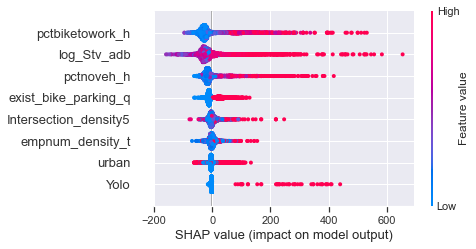

In [118]:
# Calculate the shape value for the RF model

shap_values_list = []
explainer_list = []

# Perform KFold Cross-Validation
for train_idx, test_idx in kfold.split(X_data, Y_data):
    # Train Random Forest Model
    rf_CV_model = RandomForestRegressor(
        random_state=94704, n_estimators=194, max_depth=21,
        min_samples_split=12, min_samples_leaf=1, max_features='sqrt',
        bootstrap=False
    ).fit(X_data.iloc[train_idx], Y_data.iloc[train_idx])

    # Compute SHAP values
    explainer = shap.TreeExplainer(rf_CV_model)  # Initialize SHAP explainer
    shap_values = explainer.shap_values(X_data.iloc[test_idx])  # Compute SHAP values

    # Store SHAP values for later use
    shap_values_list.append(shap_values)
    explainer_list.append(explainer)

# Convert stored SHAP values into a single array
shap_values_all = np.vstack(shap_values_list)  # Stack all SHAP values

# Concatenate all test sets for reference
X_test_all = pd.concat([X_data.iloc[test_idx] for _, test_idx in kfold.split(X_data, Y_data)])

# Compute mean absolute SHAP values per feature
shap_importance = np.abs(shap_values_all).mean(axis=0)

# Convert to DataFrame for easy visualization
shap_importance_df = pd.DataFrame({'Feature': X_test_all.columns, 'Mean |SHAP|': shap_importance})
shap_importance_df = shap_importance_df.sort_values(by="Mean |SHAP|", ascending=False)

# Visualize averaged SHAP importance
shap.summary_plot(shap_values_all, X_test_all)


In [129]:
X_test_all1=X_test_all.rename(columns={'empnum_density_t': 'Employment density_t','exist_bike_parking_q':'Existing bike parking_q','Intersection_density5':'Intersection density (#/sqm)','pctnoveh_h':'Proportion of persons with no vehicle_h','pctbiketowork_h':'Proportion of persons that bike to work_h','urban':'Urban(binary)','Yolo':'Yolo(binary)','log_Stv_adb':'Log (Crowdsource AADBT)'})
X_test_all1

Employment density_t  Existing bike parking_q  \
19              159.154943                        0   
25            14069.296970                        1   
30             1305.070533                        0   
44             2387.324146                        1   
49             2864.788976                        1   
...                    ...                      ...   
4125            159.154943                        1   
4127          19098.593170                        0   
4167          21804.227200                        0   
4173              0.000000                        0   
4176           2578.310078                        0   

      Intersection density (#/sqm)  Proportion of persons with no vehicle_h  \
19                       17.864347                                 0.058744   
25                       16.618758                                 0.218641   
30                       73.572450                                 0.118631   
44                       52.697271                                 0.288220   
49                      175.528804                                 0.262794   
...                            ...                                      ...   
4125                     88.311273                                 0.096673   
4127                    160.206875                                 0.136154   
4167                    103.740497                                 0.132705   
4173                     78.453508                                 0.140959   
4176                      0.239178                                 0.009008   

      Proportion of persons that bike to work_h  Urban(binary)  Yolo(binary)  \
19                                 5.321900e-03              0             0   
25                                 3.265073e-02              1             0   
30                                 6.307852e-02              0             0   
44                                 5.139544e-02              0             0   
49                                 3.775261e-02              0             0   
...                                         ...            ...           ...   
4125                               1.568353e-01              0             1   
4127                               0.000000e+00              0             0   
4167                               0.000000e+00              0             0   
4173                               6.360000e-07              0             0   
4176                               0.000000e+00              0             0   

      Log (Crowdsource AADBT)  
19                   2.104351  
25                   0.567258  
30                   2.289111  
44                   2.967763  
49                   0.649253  
...                       ...  
4125                -0.660004  
4127                -3.742338  
4167                -3.742338  
4173                -1.917416  
4176                -4.605170  

[4167 rows x 8 columns]

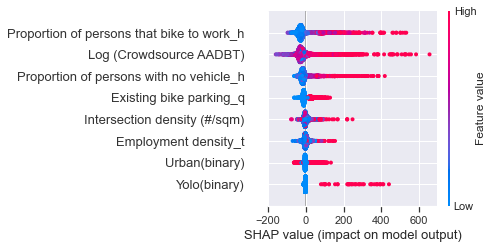

In [139]:
import shap
import matplotlib.pyplot as plt

# Adjusting matplotlib figure size using rcParams
plt.rcParams["figure.figsize"] = (30, 20)

# Generate the SHAP summary plot
shap.summary_plot(shap_values_all, X_test_all1)

# Show the plot
plt.show()


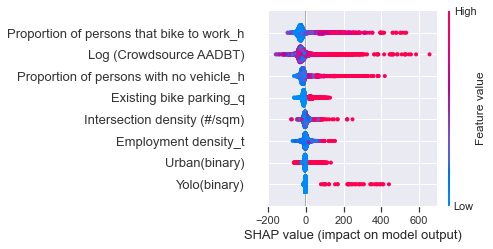

<Figure size 2160x1440 with 0 Axes>

In [141]:
import shap
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(40, 40))

# Generate the SHAP summary plot
shap.summary_plot(shap_values_all, X_test_all1)

# Save the plot to a file
plt.savefig('shap_summary_plot.png', bbox_inches='tight')  # or save as .svg for better quality

# Optionally, display the plot
plt.show()


In [223]:
appended_data1=appended_data.rename(columns = {0:'Index_ID',1:'Predicted AADB',2:'Observed AADB'})
appended_data2=appended_data1.groupby('Index_ID').mean()
graph_data=pd.merge(track,appended_data2,left_on='index', right_on='Index_ID', how="inner")
# graph_data['Mean Predicted AADB in Million']=graph_data['Mean Predicted AADB']
# graph_data['Observed AADB in Million']=graph_data['Observed AADB']
graph_data.head()

tdg_id  Leg   county  year  AADB bike_facility_type  index  Predicted AADB  \
0  208578  NaN  Alameda  2018    31     Others/Unknown      0      279.788445   
1  214389  NaN  Alameda  2017   191     Others/Unknown      1      200.016763   
2  214389  NaN  Alameda  2018   214     Others/Unknown      2      176.755979   
3  214389  NaN  Alameda  2019   210     Others/Unknown      3      187.030274   
4  214389  NaN  Alameda  2016   152     Others/Unknown      4      200.016763   

   Observed AADB  
0           31.0  
1          191.0  
2          214.0  
3          210.0  
4          152.0

In [221]:
graph_data['Observed AADB'].max(), graph_data['Predicted AADB'].max()

(2220.0, 1681.5441405959452)

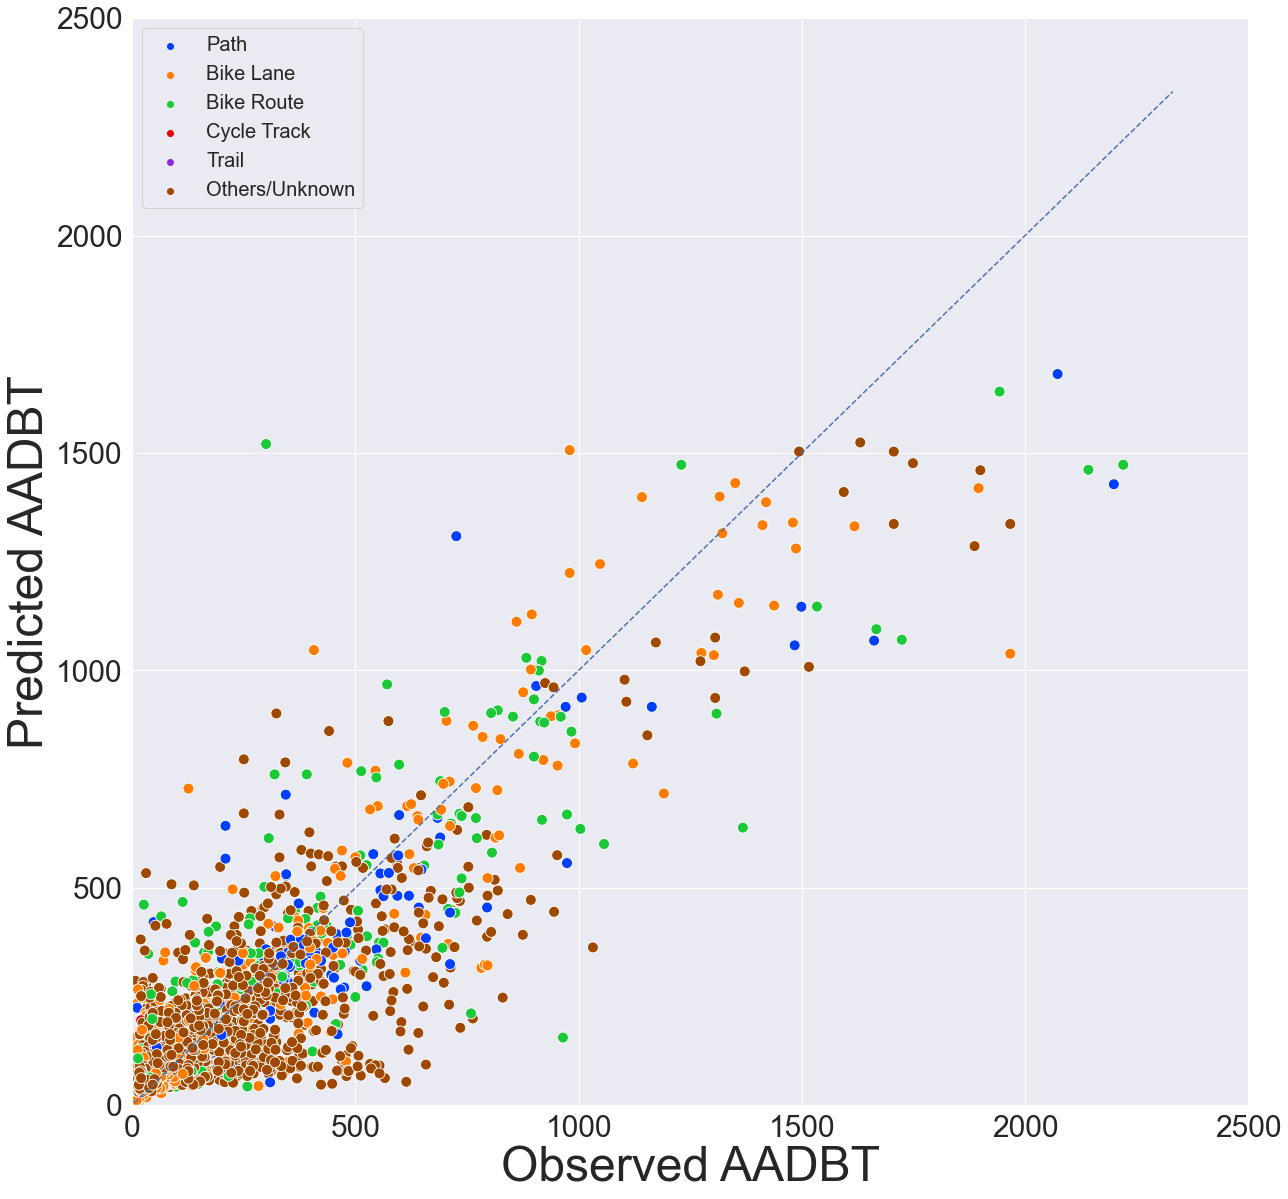

In [227]:
# Define the desired order of legend
hue_order = ['Path','Bike Lane','Bike Route', 'Cycle Track', 'Trail','Others/Unknown']
sns.set(font_scale=4) 
plt.figure(figsize=(20,20))
g=sns.scatterplot(data=graph_data, x="Observed AADB", y="Predicted AADB", hue="bike_facility_type", palette="bright",s=120,hue_order=hue_order)
g.set(xlabel='Observed AADBT', ylabel='Predicted AADBT')
g.legend(fontsize=20)
abline(1, (0,0))
plt.xlim(0,2500)
plt.ylim(0,2500)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()

In [238]:
# Calculate the RMSPE for each different bike facilities
# Group by 'bike_facility_type' and apply the RMSPE function to each group
rmspe_by_facility = graph_data.groupby('bike_facility_type').apply(
    lambda group: rmspe(group['Predicted AADB'], group['AADB'])
)
rmspe_by_facility

bike_facility_type
Bike Lane          58.914527
Bike Route         67.468159
Cycle Track       341.926504
Others/Unknown     75.361845
Path               52.755270
Trail              39.023525
dtype: float64

In [239]:
graph_data.groupby(['bike_facility_type'])['tdg_id'].count()

bike_facility_type
Bike Lane          740
Bike Route         477
Cycle Track          5
Others/Unknown    2716
Path               225
Trail                4
Name: tdg_id, dtype: int64

In [139]:
importances = list(rf_CV_model.feature_importances_)# List of tuples with variable and importance 
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(feature_list, importances)]# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)# Print out the feature and importances 
#[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];
feature_importances

[('log_Stv_adb', 0.2607),
 ('pctbiketowork_h', 0.258),
 ('pctnoveh_h', 0.1889),
 ('Intersection_density5', 0.0866),
 ('empnum_density_t', 0.0747),
 ('Yolo', 0.0542),
 ('exist_bike_parking_q', 0.0424),
 ('urban', 0.0344)]

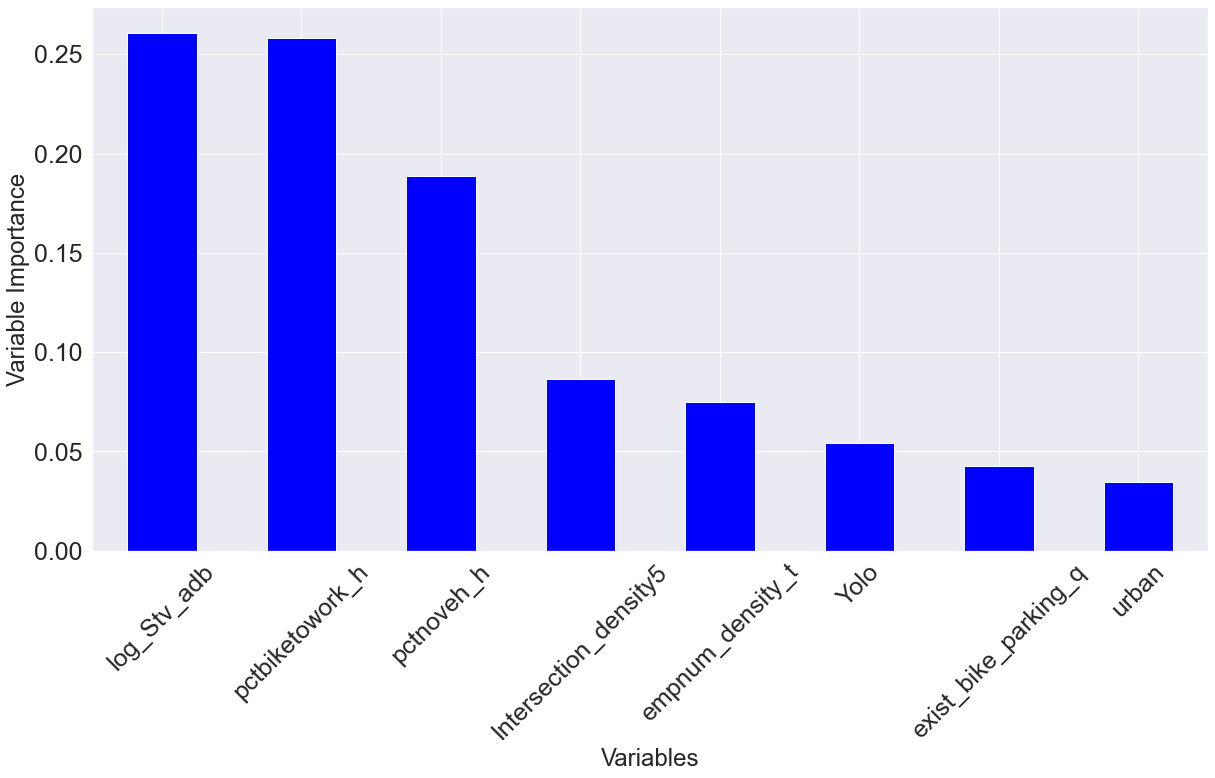

In [140]:
plt.rcParams.update({'font.size': 22})
feature_importances_df = pd.DataFrame(rf_CV_model.feature_importances_, index=X_data.columns, columns=[
                                      'Importance']).sort_values('Importance', ascending=False)
feature_importances_df.plot(kind='bar', figsize=(20, 10), fontsize=25, legend=False,
                          ylabel="Importance", xlabel="Variable",color="blue")
plt.xticks(rotation=45)
plt.xlabel('Variables', fontsize=24)
plt.ylabel('Variable Importance', fontsize=24)
plt.show()
#style='fivethirtyeight'

In [141]:
feature_importances_df

Importance
log_Stv_adb              0.260746
pctbiketowork_h          0.257997
pctnoveh_h               0.188942
Intersection_density5    0.086611
empnum_density_t         0.074681
Yolo                     0.054215
exist_bike_parking_q     0.042431
urban                    0.034375

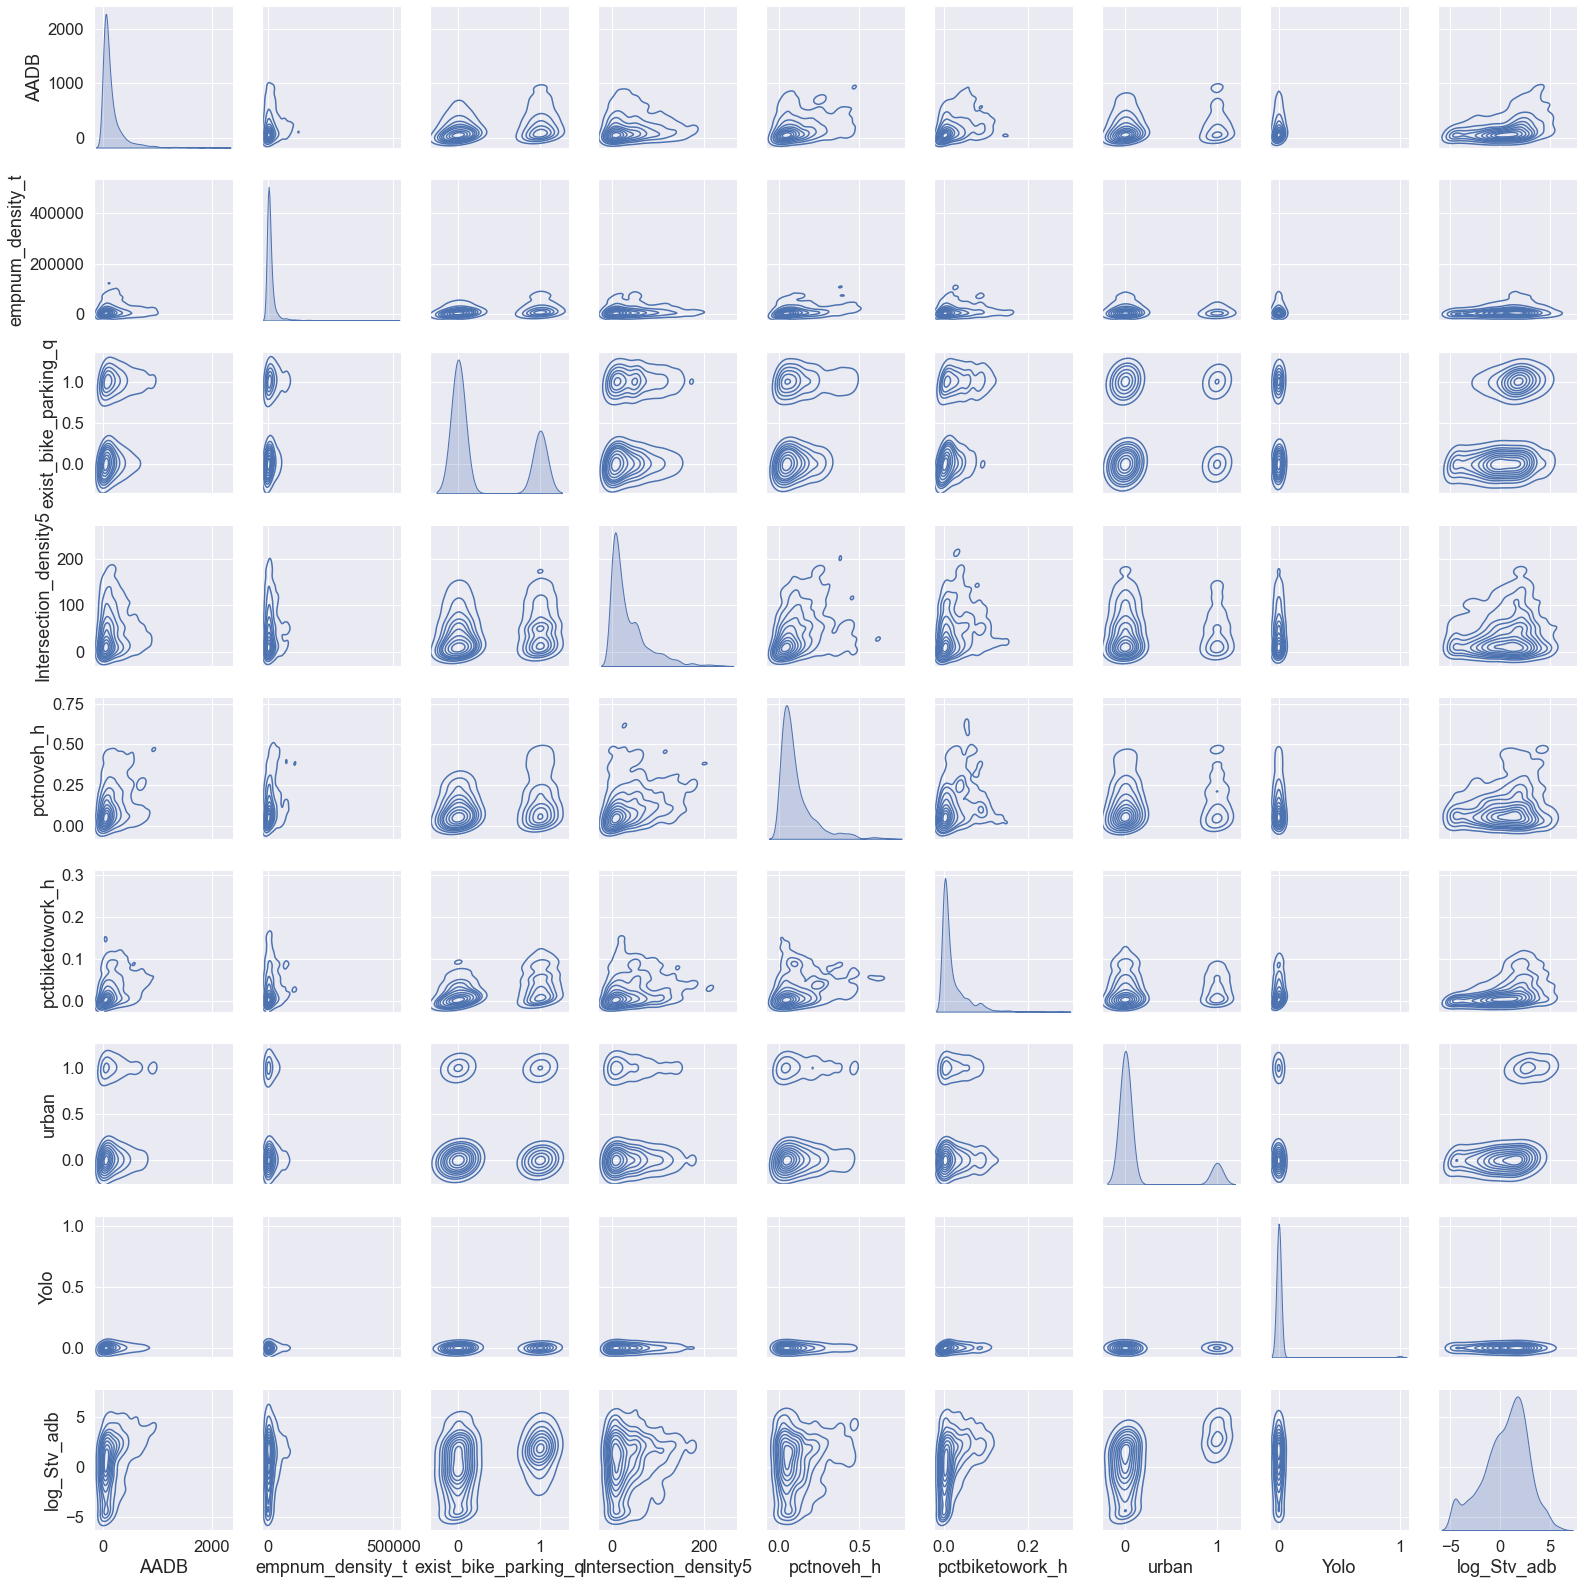

In [142]:
sns.set(font_scale=1.5) 
sns.pairplot(model_data,kind="kde")
#sns.pairplot(df4, kind="kde")

In [143]:
#residual_df['y_pred'] = best_model.predict(X_train)
graph_data['AADB_resid'] = graph_data['Observed AADB'] - graph_data['Mean Predicted AADB']
graph_data['AADB_resid_pct'] = graph_data['AADB_resid'] / graph_data['Mean Predicted AADB']
graph_data['abs_AADB_resid'] = graph_data['AADB_resid'].abs()

<Figure size 1440x1440 with 0 Axes>

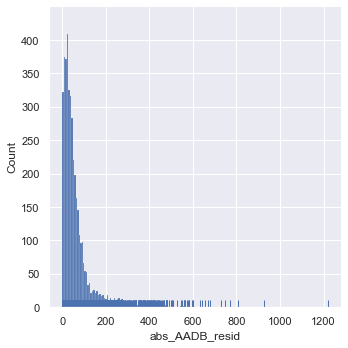

In [144]:
sns.set(font_scale=1) 
plt.figure(figsize=(20,20))
sns.displot(graph_data.abs_AADB_resid, rug=True,alpha=0.99,palette="Blues")

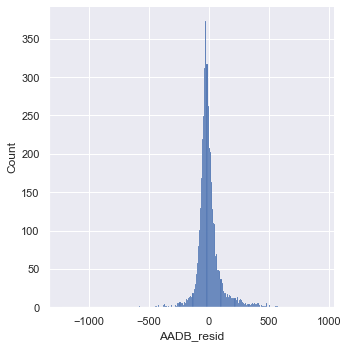

In [145]:
#sns.set_palette("Paired")
#sns.set_palette("pastel")
sns.displot(graph_data.AADB_resid,alpha=0.99,palette="Blues")

### Application of Random Forest Model

In [146]:
shs=pd.read_csv(f'{file_path}/SHS_application_data_july12.csv')
shs=shs.fillna(0)
shs.rename(columns={'d3bpo4':'Intersection_density5'},inplace=True)
#shs['urban']=np.where(shs['location']=='urban',1,0)
shs['Yolo']=np.where(shs['county']=='Yolo',1,0)
shs['Stv_adb']=shs['Stv_leisure_adb']+shs['Stv_commute_adb']
shs['log_Stv_adb']=np.log(shs['Stv_adb']+0.01)

In [147]:
# read the SHS geometry 
geo=gpd.read_file(f'{file_path}/RF Model_SHS_estimate_July24/SHS_AADBT_Estimate.shp')
# take the 
geo1=geo.drop(['county', 'year', 'Field1', 'AADBT', 'index',
       'tdg_id_1', 'county_1'],axis=1)
gdf = geo1.to_crs(epsg=4269)
gdf.head()

tdg_id    Length                                           geometry
0  8523.0  0.297113  LINESTRING (-120.74504 38.73376, -120.74547 38...
1  8530.0  0.308137  LINESTRING (-120.83852 38.75700, -120.83888 38...
2  8534.0  0.047312  LINESTRING (-120.83284 38.68772, -120.83291 38...
3  8535.0  0.401485  LINESTRING (-121.01515 38.84100, -121.01518 38...
4  8536.0  0.346249  LINESTRING (-120.91529 38.81439, -120.91472 38...

In [148]:
# read the urban area shape file
ua=gpd.read_file(f'{file_path}/Urban Area_shape file/data/2010_adjusted_urban_area.shp')
ua.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [149]:
# do the spatial join with eco valid counters
urban=gpd.sjoin(gdf,ua)
urban=urban.drop(['UACE10','NAME10','UATYP10','INTPTLAT10','INTPTLON10'],axis=1)
urban['location']='urban'
urban.head()

tdg_id    Length                                           geometry  \
0   8523.0  0.297113  LINESTRING (-120.74504 38.73376, -120.74547 38...   
2   8534.0  0.047312  LINESTRING (-120.83284 38.68772, -120.83291 38...   
13  8580.0  0.026694  LINESTRING (-120.81802 38.69385, -120.81779 38...   
14  8581.0  0.021401  LINESTRING (-120.80807 38.72849, -120.80769 38...   
16  8587.0  0.235887  LINESTRING (-120.82351 38.69290, -120.82361 38...   

    index_right location  
0           105    urban  
2           105    urban  
13          105    urban  
14          105    urban  
16          105    urban

In [150]:
# get the counters in rural area
rural = gdf.merge(urban, indicator=True, how='outer').query('_merge != "both"').drop('_merge', 1)
rural['location']='rural'
rural.head()

tdg_id    Length                                           geometry  \
1  8530.0  0.308137  LINESTRING (-120.83852 38.75700, -120.83888 38...   
3  8535.0  0.401485  LINESTRING (-121.01515 38.84100, -121.01518 38...   
4  8536.0  0.346249  LINESTRING (-120.91529 38.81439, -120.91472 38...   
5  8545.0  0.046007  LINESTRING (-120.83056 38.75465, -120.83086 38...   
6  8547.0  0.446214  LINESTRING (-120.84813 38.75651, -120.84753 38...   

   index_right location  
1          NaN    rural  
3          NaN    rural  
4          NaN    rural  
5          NaN    rural  
6          NaN    rural

In [151]:
# Now combine rural and urban 
ru=pd.concat([urban,rural],axis=0)
ru1=ru.drop_duplicates(subset=['tdg_id'], keep='first')
ru1['urban']=np.where(ru1['location']=='urban',1,0)
ru1.shape

(87539, 6)

In [152]:
# now combine with others data
app_data=pd.merge(shs, ru1, on=['tdg_id'], how='inner')
app_data.shape

(87539, 206)

In [153]:
app_data.columns

Index(['Unnamed: 0', 'segment_id', 'street_name', 'county', 'tdg_id',
       'lrs_cal_id', 'bikes_proh', 'bike_facs', 'int_tdg_id', 'loc_id',
       ...
       'Minor_Collector', 'Local', 'Yolo', 'Stv_adb', 'log_Stv_adb', 'Length',
       'geometry', 'index_right', 'location', 'urban'],
      dtype='object', length=206)

In [154]:
# Now filter the SHS link only based data provided by John on November 30, 2023
filtered_shs=pd.read_csv(f'{file_path}/smart4_final_output_Dec8_2023.csv')
filtered_shs1=filtered_shs[['tdg_id','shs_status']]
# now we will drop ramp, likely ramp and also all non-statehigh, while we will keep all state hight, local roads that intersect highway and ramp
filtered_shs2=filtered_shs1[(filtered_shs1.shs_status!='RAMP') & (filtered_shs1.shs_status!='LIKELY RAMP')]
filtered_shs3= filtered_shs2[filtered_shs2['shs_status'].notna()]
filtered_shs3.head()

tdg_id shs_status
0  122410        SHS
1  122430        SHS
2  122447        SHS
3  122468        SHS
4  122475        SHS

In [155]:
filtered_shs1.shape, filtered_shs2.shape,filtered_shs3.shape

((87539, 2), (80184, 2), (49902, 2))

In [156]:
filtered_shs1['shs_status'].unique()

array(['SHS', 'XSTREET_SHS', nan, 'RAMP', 'XSTREET_RAMP', 'LIKELY RAMP'],
      dtype=object)

In [157]:
filtered_shs3['shs_status'].unique()

array(['SHS', 'XSTREET_SHS', 'XSTREET_RAMP'], dtype=object)

In [158]:
application_data=pd.merge(app_data,filtered_shs3, on=['tdg_id'], how='inner')
application_data.shape

(49902, 207)

In [159]:
application_data.columns

Index(['Unnamed: 0', 'segment_id', 'street_name', 'county', 'tdg_id',
       'lrs_cal_id', 'bikes_proh', 'bike_facs', 'int_tdg_id', 'loc_id',
       ...
       'Local', 'Yolo', 'Stv_adb', 'log_Stv_adb', 'Length', 'geometry',
       'index_right', 'location', 'urban', 'shs_status'],
      dtype='object', length=207)

In [160]:
# prepare the model data
app_data1=application_data[['tdg_id','shs_status','street_name','county','empnum_density_t', 'exist_bike_parking_q',
       'Intersection_density5', 'pctnoveh_h', 'pctbiketowork_h', 'urban',
       'Yolo', 'log_Stv_adb']]

In [161]:
# prepare the model data
rf_app_model_data=app_data1[['empnum_density_t', 'exist_bike_parking_q',
       'Intersection_density5', 'pctnoveh_h', 'pctbiketowork_h', 'urban',
       'Yolo', 'log_Stv_adb']]

In [162]:
rf_app_model_data.shape,app_data1.shape

((49902, 8), (49902, 12))

In [163]:
shs_track=app_data1[['tdg_id','county','street_name','shs_status']].reset_index()
shs_track['index']=shs_track.index
shs_track.head()

index  tdg_id     county       street_name   shs_status
0      0  6496.0  Del Norte  SR-101-DEL NORTE          SHS
1      1  6497.0  Del Norte  SR-101-DEL NORTE          SHS
2      2  6498.0  Del Norte  SR-101-DEL NORTE          SHS
3      3  6500.0  Del Norte  SR-101-DEL NORTE          SHS
4      4  6507.0  Del Norte           NO NAME  XSTREET_SHS

In [164]:
shs_track.shape

(49902, 5)

In [165]:
# now apply RF model
shs_pred = np.asarray(rf_app_model_data)

In [166]:
shs_predictions = rf_CV_model.predict(shs_pred)
shs_predictions_df = pd.DataFrame(shs_predictions,columns=['AADBT'])
shs_predictions_df['index']=shs_predictions_df.index
shs_prediction=pd.merge(shs_predictions_df,shs_track,on=['index'], how='inner')
shs_prediction.head()

AADBT  index  tdg_id     county       street_name   shs_status
0  116.284206      0  6496.0  Del Norte  SR-101-DEL NORTE          SHS
1   78.742170      1  6497.0  Del Norte  SR-101-DEL NORTE          SHS
2  116.284206      2  6498.0  Del Norte  SR-101-DEL NORTE          SHS
3   77.765924      3  6500.0  Del Norte  SR-101-DEL NORTE          SHS
4  115.281698      4  6507.0  Del Norte           NO NAME  XSTREET_SHS

In [167]:
shs_prediction['AADBT'].describe()

count    49902.000000
mean       121.452081
std         62.009089
min         20.352032
25%         78.240174
50%        108.309464
75%        153.207241
max       1400.885270
Name: AADBT, dtype: float64

In [168]:
# now bring the geometry and length back
#geo2=geo.drop(['county', 'year', 'Field1', 'AADBT', 'index',
#       'tdg_id_1', 'county_1'],axis=1)
shs_pred=pd.merge(shs_prediction, gdf, on=['tdg_id'], how='inner')
#pr_gdf =shs_pred.to_crs(epsg=4269, geometry='geometry')
shs_pred.head()

AADBT  index  tdg_id     county       street_name   shs_status  \
0  116.284206      0  6496.0  Del Norte  SR-101-DEL NORTE          SHS   
1   78.742170      1  6497.0  Del Norte  SR-101-DEL NORTE          SHS   
2  116.284206      2  6498.0  Del Norte  SR-101-DEL NORTE          SHS   
3   77.765924      3  6500.0  Del Norte  SR-101-DEL NORTE          SHS   
4  115.281698      4  6507.0  Del Norte           NO NAME  XSTREET_SHS   

     Length                                           geometry  
0  0.016049  LINESTRING (-124.20812 41.99626, -124.20811 41...  
1  0.036890  LINESTRING (-124.20811 41.99602, -124.20808 41...  
2  0.016515  LINESTRING (-124.20780 41.99624, -124.20812 41...  
3  0.199039  LINESTRING (-124.20789 41.99231, -124.20783 41...  
4  0.189292  LINESTRING (-124.20789 41.99231, -124.20809 41...

In [169]:
# Assign the catagory of the volume
def vol_bin(AADBT):
    if AADBT<=100:
        return 'low'
    elif ((AADBT>100) & (AADBT<=300)):
        return 'mid'
    else:
        return 'high'
shs_pred['class']=shs_pred.apply(lambda row:vol_bin(row['AADBT']),axis=1)  
#shs_pred = shs_pred.rename(columns={'street_name': 'street_name'})
shs_pred.head()

AADBT  index  tdg_id     county       street_name   shs_status  \
0  116.284206      0  6496.0  Del Norte  SR-101-DEL NORTE          SHS   
1   78.742170      1  6497.0  Del Norte  SR-101-DEL NORTE          SHS   
2  116.284206      2  6498.0  Del Norte  SR-101-DEL NORTE          SHS   
3   77.765924      3  6500.0  Del Norte  SR-101-DEL NORTE          SHS   
4  115.281698      4  6507.0  Del Norte           NO NAME  XSTREET_SHS   

     Length                                           geometry class  
0  0.016049  LINESTRING (-124.20812 41.99626, -124.20811 41...   mid  
1  0.036890  LINESTRING (-124.20811 41.99602, -124.20808 41...   low  
2  0.016515  LINESTRING (-124.20780 41.99624, -124.20812 41...   mid  
3  0.199039  LINESTRING (-124.20789 41.99231, -124.20783 41...   low  
4  0.189292  LINESTRING (-124.20789 41.99231, -124.20809 41...   mid

In [170]:
app_data2=app_data[['tdg_id','Stv_adb','empnum_density_t', 'exist_bike_parking_q',
       'Intersection_density5', 'pctnoveh_h', 'pctbiketowork_h', 'urban',
       'Yolo', 'log_Stv_adb']]

In [171]:
app_data2.shape

(87539, 10)

In [172]:
# Include the app data with the prediction
shs_pred1=pd.merge(shs_pred,app_data2, on=['tdg_id'], how='inner')
shs_pred2=shs_pred1.drop_duplicates(subset=['tdg_id'], keep='first')
shs_pred2.shape

(49902, 18)

In [175]:
shs_pred2.groupby(['class'])['Length'].sum()

class
high      129.513189
low     11875.131931
mid      9556.519522
Name: Length, dtype: float64

In [174]:
# Import json file for visualization
crs = {'init': 'epsg:4269'}
shs_rf_pred = gpd.GeoDataFrame(shs_pred2, crs=crs, geometry = 'geometry')
shs_rf_pred.to_file(f'{file_path}/SHS_AADBT_Prediction_Uisng_RF_Model_Dec21_2023.json', driver="GeoJSON")

# Application of Poisson Regression Model in SHS

In [176]:
# end of the Analysis
#AADB ~log_Stv_adb+exist_bike_parking_q+pctnoveh_h+pctbiketowork_h+Intersection_density5+Yolo'
PR_app_data=app_data1[['log_Stv_adb','exist_bike_parking_q','pctnoveh_h','pctbiketowork_h','urban','Yolo']]

In [177]:
PR_app_data.shape

(49902, 6)

In [178]:
# Apply the PR model to state highways system
pr_shs_predictions = PR_CV_model.predict(PR_app_data)
pr_shs_predictions_df = pd.DataFrame(pr_shs_predictions,columns=['AADBT'])
pr_shs_predictions_df['index']=pr_shs_predictions_df.index
pr_shs_prediction1=pd.merge(pr_shs_predictions_df,shs_track,on=['index'], how='inner')
pr_shs_prediction1.head()

AADBT  index  tdg_id     county       street_name   shs_status
0  36.923849      0  6496.0  Del Norte  SR-101-DEL NORTE          SHS
1  85.956132      1  6497.0  Del Norte  SR-101-DEL NORTE          SHS
2  36.923849      2  6498.0  Del Norte  SR-101-DEL NORTE          SHS
3  86.129133      3  6500.0  Del Norte  SR-101-DEL NORTE          SHS
4  45.453235      4  6507.0  Del Norte           NO NAME  XSTREET_SHS

In [179]:
pr_shs_prediction1.shape

(49902, 6)

In [180]:
pr_shs_predictions_df.head()

AADBT  index
0  36.923849      0
1  85.956132      1
2  36.923849      2
3  86.129133      3
4  45.453235      4

In [181]:
pr_shs_prediction1['AADBT'].describe()

count    49902.000000
mean        83.738908
std         63.138483
min         34.765383
25%         49.538678
50%         69.930843
75%        100.420047
max       4269.374185
Name: AADBT, dtype: float64

In [182]:
# now bring the geometry and length back
# geo2=geo.drop(['county', 'year', 'Field1', 'AADBT', 'index',
#        'tdg_id_1', 'county_1'],axis=1)
pr_shs_pred=pd.merge(pr_shs_prediction1, gdf, on=['tdg_id'], how='inner')
pr_shs_pred.head()

AADBT  index  tdg_id     county       street_name   shs_status  \
0  36.923849      0  6496.0  Del Norte  SR-101-DEL NORTE          SHS   
1  85.956132      1  6497.0  Del Norte  SR-101-DEL NORTE          SHS   
2  36.923849      2  6498.0  Del Norte  SR-101-DEL NORTE          SHS   
3  86.129133      3  6500.0  Del Norte  SR-101-DEL NORTE          SHS   
4  45.453235      4  6507.0  Del Norte           NO NAME  XSTREET_SHS   

     Length                                           geometry  
0  0.016049  LINESTRING (-124.20812 41.99626, -124.20811 41...  
1  0.036890  LINESTRING (-124.20811 41.99602, -124.20808 41...  
2  0.016515  LINESTRING (-124.20780 41.99624, -124.20812 41...  
3  0.199039  LINESTRING (-124.20789 41.99231, -124.20783 41...  
4  0.189292  LINESTRING (-124.20789 41.99231, -124.20809 41...

In [183]:
# Classify the millage
pr_shs_pred['class']=pr_shs_pred.apply(lambda row:vol_bin(row['AADBT']),axis=1)   
pr_shs_pred.head()

AADBT  index  tdg_id     county       street_name   shs_status  \
0  36.923849      0  6496.0  Del Norte  SR-101-DEL NORTE          SHS   
1  85.956132      1  6497.0  Del Norte  SR-101-DEL NORTE          SHS   
2  36.923849      2  6498.0  Del Norte  SR-101-DEL NORTE          SHS   
3  86.129133      3  6500.0  Del Norte  SR-101-DEL NORTE          SHS   
4  45.453235      4  6507.0  Del Norte           NO NAME  XSTREET_SHS   

     Length                                           geometry class  
0  0.016049  LINESTRING (-124.20812 41.99626, -124.20811 41...   low  
1  0.036890  LINESTRING (-124.20811 41.99602, -124.20808 41...   low  
2  0.016515  LINESTRING (-124.20780 41.99624, -124.20812 41...   low  
3  0.199039  LINESTRING (-124.20789 41.99231, -124.20783 41...   low  
4  0.189292  LINESTRING (-124.20789 41.99231, -124.20809 41...   low

In [184]:
pr_shs_pred.shape

(49906, 9)

In [185]:
pr_shs_pred.groupby(['class'])['Length'].sum()

class
high       43.316158
low     18619.445029
mid      2901.670436
Name: Length, dtype: float64

In [186]:
pr_shs_pred.groupby(['class'])['class'].count()

class
high      442
low     37308
mid     12156
Name: class, dtype: int64

In [187]:
# Include the app data with the prediction
pr_d1=pd.merge(pr_shs_pred,app_data2, on=['tdg_id'], how='inner')
pr_d2=pr_d1.drop_duplicates(subset=['tdg_id'], keep='first')
#pr_d2 = pr_d2.rename(columns={'street_name_y': 'street_name'})
pr_d2.head()

AADBT  index  tdg_id     county       street_name   shs_status  \
0  36.923849      0  6496.0  Del Norte  SR-101-DEL NORTE          SHS   
1  85.956132      1  6497.0  Del Norte  SR-101-DEL NORTE          SHS   
2  36.923849      2  6498.0  Del Norte  SR-101-DEL NORTE          SHS   
3  86.129133      3  6500.0  Del Norte  SR-101-DEL NORTE          SHS   
4  45.453235      4  6507.0  Del Norte           NO NAME  XSTREET_SHS   

     Length                                           geometry class  \
0  0.016049  LINESTRING (-124.20812 41.99626, -124.20811 41...   low   
1  0.036890  LINESTRING (-124.20811 41.99602, -124.20808 41...   low   
2  0.016515  LINESTRING (-124.20780 41.99624, -124.20812 41...   low   
3  0.199039  LINESTRING (-124.20789 41.99231, -124.20783 41...   low   
4  0.189292  LINESTRING (-124.20789 41.99231, -124.20809 41...   low   

    Stv_adb  empnum_density_t  exist_bike_parking_q  Intersection_density5  \
0  0.000000          0.000000                   0.0                    0.0   
1  2.123288          0.000000                   0.0                    0.0   
2  0.000000          0.000000                   0.0                    0.0   
3  2.150685        159.154943                   0.0                    0.0   
4  0.027397        159.154943                   0.0                    0.0   

   pctnoveh_h  pctbiketowork_h  urban  Yolo  log_Stv_adb  
0    0.027174              0.0      0     0    -4.605170  
1    0.027174              0.0      0     0     0.757664  
2    0.027174              0.0      0     0    -4.605170  
3    0.027174              0.0      0     0     0.770425  
4    0.027174              0.0      0     0    -3.286158

In [188]:
pr_d2['AADBT'].describe()

count    49902.000000
mean        83.738908
std         63.138483
min         34.765383
25%         49.538678
50%         69.930843
75%        100.420047
max       4269.374185
Name: AADBT, dtype: float64

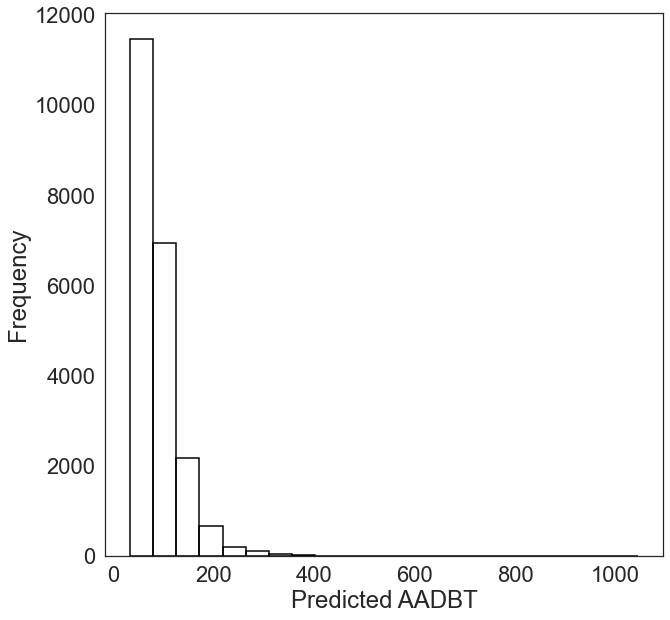

In [189]:
# Bar density plot for permanent counters AADBT

plt.figure(figsize=(10,10))
sns.set_theme(style='white',font_scale=2)
g=sns.histplot(data=pr_d2.loc[pr_d2['shs_status']=='SHS'], x="AADBT",  fill=False,bins=22,color = 'Black')
g.set(xlabel='Predicted AADBT')
g.set(ylabel='Frequency')
plt.show()


In [190]:
pr_d2['shs_status'].unique()

array(['SHS', 'XSTREET_SHS', 'XSTREET_RAMP'], dtype=object)

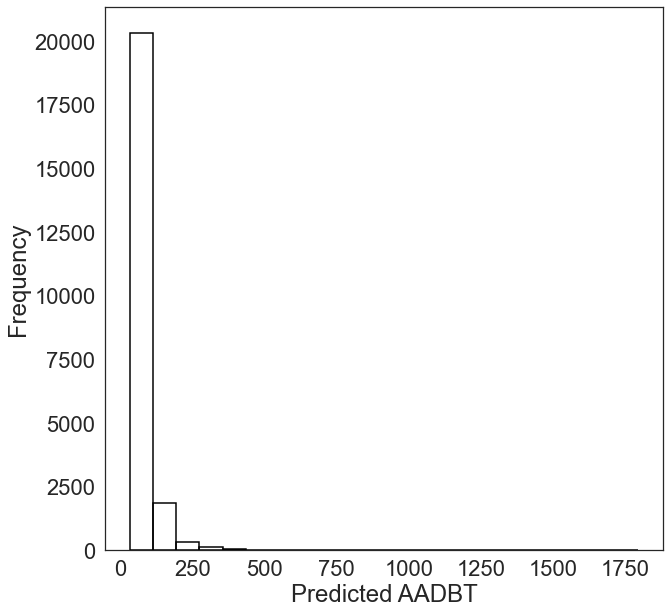

In [191]:
plt.figure(figsize=(10,10))
sns.set_theme(style='white',font_scale=2)
g=sns.histplot(data=pr_d2.loc[pr_d2['shs_status']=='XSTREET_SHS'], x="AADBT",  fill=False,bins=22,color = 'Black')
g.set(xlabel='Predicted AADBT')
g.set(ylabel='Frequency')
plt.show()

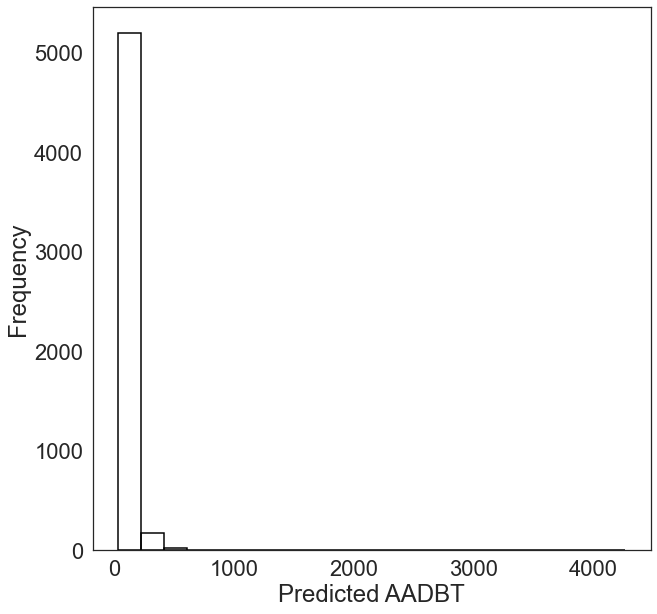

In [192]:
plt.figure(figsize=(10,10))
sns.set_theme(style='white',font_scale=2)
g=sns.histplot(data=pr_d2.loc[pr_d2['shs_status']=='XSTREET_RAMP'], x="AADBT",  fill=False,bins=22,color = 'Black')
g.set(xlabel='Predicted AADBT')
g.set(ylabel='Frequency')
plt.show()

In [193]:
# Lets export Poisson regression estimated to set in excel
excel_data=pr_d2[['tdg_id','street_name','Stv_adb','log_Stv_adb','exist_bike_parking_q','pctnoveh_h','pctbiketowork_h','urban','Yolo','AADBT']]
excel_data.to_csv(f'{file_path}/PR_excel_Prediction_data.csv')

In [194]:
excel_data.head()

tdg_id       street_name   Stv_adb  log_Stv_adb  exist_bike_parking_q  \
0  6496.0  SR-101-DEL NORTE  0.000000    -4.605170                   0.0   
1  6497.0  SR-101-DEL NORTE  2.123288     0.757664                   0.0   
2  6498.0  SR-101-DEL NORTE  0.000000    -4.605170                   0.0   
3  6500.0  SR-101-DEL NORTE  2.150685     0.770425                   0.0   
4  6507.0           NO NAME  0.027397    -3.286158                   0.0   

   pctnoveh_h  pctbiketowork_h  urban  Yolo      AADBT  
0    0.027174              0.0      0     0  36.923849  
1    0.027174              0.0      0     0  85.956132  
2    0.027174              0.0      0     0  36.923849  
3    0.027174              0.0      0     0  86.129133  
4    0.027174              0.0      0     0  45.453235

In [195]:
# Import json file for visualization
crs = {'init': 'epsg:4269'}
pr_shs_pred1= gpd.GeoDataFrame(pr_d2, crs=crs, geometry = 'geometry')
pr_shs_pred1.to_file(f'{file_path}/SHS_AADBT_Prediction_Uisng_PR_Model_Dec21_2023.json', driver="GeoJSON")

# import the ground truth data with geometry for visualization purposes

In [196]:
gdf = gpd.GeoDataFrame(
    data1, geometry=gpd.points_from_xy(data1.Long, data1.Lat), crs="EPSG:4326"
)
gdf.head()

Unnamed: 0   county    X       ID location        Lat       Long  year  \
0           1  Alameda  122   8578.0    urban  37.849934 -122.28885  2018   
1           4  Alameda  128  14389.0    urban  37.533787 -122.07950  2017   
2           5  Alameda  129  14389.0    urban  37.533787 -122.07950  2018   
3           6  Alameda  130  14389.0    urban  37.533787 -122.07950  2019   
4           7  Alameda  127  14389.0    urban  37.533787 -122.07950  2016   

     ATT  no_of_months_data_collected  ... Los_Angeles  San_Diego  Yolo  \
0  11376                          1.0  ...           0          0     0   
1  69539                         12.0  ...           0          0     0   
2  77973                         12.0  ...           0          0     0   
3  76522                         12.0  ...           0          0     0   
4  55379                          9.0  ...           0          0     0   

   Orange  log_Stv_commute_adb log_Stv_leisure_adb    Stv_adb  log_Stv_adb  \
0       0             2.268773            1.820409  15.821918     2.762028   
1       0            -2.974051           -2.848257   0.089041    -2.312220   
2       0            -3.286158           -2.736534   0.082192    -2.383884   
3       0            -2.736534           -2.974051   0.095890    -2.245351   
4       0            -2.974051           -2.848257   0.089041    -2.312220   

   log_slope                     geometry  
0  -3.822693  POINT (-122.28885 37.84993)  
1  -4.588440  POINT (-122.07950 37.53379)  
2  -4.588440  POINT (-122.07950 37.53379)  
3  -4.588440  POINT (-122.07950 37.53379)  
4  -4.588440  POINT (-122.07950 37.53379)  

[5 rows x 215 columns]

In [197]:
list(gdf.columns)

['Unnamed: 0',
 'county',
 'X',
 'ID',
 'location',
 'Lat',
 'Long',
 'year',
 'ATT',
 'no_of_months_data_collected',
 'type',
 'AADB',
 'ATT.in.Million',
 'matched_seg_id',
 'segment_id',
 'street_name',
 'tdg_id',
 'lrs_cal_id',
 'bikes_proh',
 'int_tdg_id',
 'loc_id',
 'seg_counter',
 'fclass',
 'tasas_ids',
 'ataip_ids',
 'fc_draft',
 'speed',
 'slope',
 'empnum_density_t',
 'geom_length',
 'access_code',
 'adt_amt',
 'truck_adt_amt',
 'rt_lanes_amt',
 'lt_lanes_amt',
 'rt_trav_way_width',
 'rt_i_shd_tot_width',
 'rt_o_shd_tot_width',
 'lt_trav_way_width',
 'lt_i_shd_tot_width',
 'lt_o_shd_tot_width',
 'near_strava_id',
 'empnum_density_q',
 'empnum_density_h',
 'near_univ_miles',
 'near_large_univ_miles',
 'eco_type',
 'forward_trip_count',
 'reverse_trip_count',
 'forward_commute_trip_count',
 'reverse_commute_trip_count',
 'forward_leisure_trip_count',
 'reverse_leisure_trip_count',
 'forward_average_speed',
 'reverse_average_speed',
 'index',
 'Leg',
 'ATT.in.Thousands',
 'rowI

In [198]:
gr_data_vis=gdf[['tdg_id','ID','street_name','type','AADB','year','Lat', 'Long','geometry']]
gr_data_vis=gr_data_vis.loc[gr_data_vis['year']==2019]
gr_data_vis.head(10)

tdg_id       ID               street_name           type  AADB  year  \
3     214389  14389.0                     SR-84  eco_permanent   210  2019   
8     221803  21803.0              Adams Street  eco_permanent   351  2019   
26    247049  47049.0           Harrison Street  eco_permanent   458  2019   
27    251474  51474.0  MacArthur Bike Boulevard  eco_permanent     7  2019   
265   207080   7080.0         Alamo Canal Trail  eco_permanent   125  2019   
269   212243  12243.0          Iron Horse Trail  eco_permanent   122  2019   
273   212244  12244.0          Iron Horse Trail  eco_permanent    84  2019   
280   239406  39406.0           Creekview Drive  eco_permanent    35  2019   
283   239409  39409.0          Iron Horse Trail  eco_permanent   212  2019   
1211    1605      0.0           East 9th Street     short_term    43  2019   

            Lat        Long                     geometry  
3     37.533787 -122.079500  POINT (-122.07950 37.53379)  
8     37.814124 -122.255859  POINT (-122.25586 37.81412)  
26    37.808444 -122.263378  POINT (-122.26338 37.80844)  
27    37.784776 -122.189094  POINT (-122.18909 37.78478)  
265   37.702540 -121.919760  POINT (-121.91976 37.70254)  
269   37.690407 -121.882410  POINT (-121.88241 37.69041)  
273   37.699400 -121.895010  POINT (-121.89501 37.69940)  
280   37.713730 -121.876040  POINT (-121.87604 37.71373)  
283   37.703522 -121.900696  POINT (-121.90070 37.70352)  
1211  39.726460 -121.833480  POINT (-121.83348 39.72646)

In [199]:
gr_data_vis.shape

(450, 9)

In [200]:
# Import json file for visualization
crs = {'init': 'epsg:4269'}
gr_vis= gpd.GeoDataFrame(gr_data_vis, crs=crs, geometry = 'geometry')
gr_vis.to_file(f'{file_path}/Eco_short_Ground_truth_2019.json', driver="GeoJSON")

# end of the code